<a href="https://colab.research.google.com/github/jelsinas/Screaping-Web-Amazon-dan-Sentiment-Analysis-Sosial-Media-Analysis-/blob/main/Screaping_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KELOMPOK 9 SOSIAL MEDIA ANALISIS
Anggota : Jelsi Nasa,
          Nia Ratdani,
          Nicholas Jacson.

**SCREAPING DATA WEB AMAZON**

500 data, Lima Kategori: Sepatu, Baju, Jam, Tas, dan Mainan, Masing-Masing 100 Data PerKategori


Screaping Data Web Amazon, 100 Data Kategory **(SEPATU/SHOES)**

In [1]:
# Install library
!pip install requests beautifulsoup4 pandas lxml fake-useragent -q

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from datetime import datetime
from google.colab import files
from fake_useragent import UserAgent
import random

ua = UserAgent()

def get_headers():
    """Generate random headers"""
    return {
        'User-Agent': ua.random,
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate',
        'Connection': 'keep-alive',
        'Upgrade-Insecure-Requests': '1'
    }

def scrape_amazon_shoes(max_products=100):
    """Scrape produk sepatu dari Amazon"""
    products = []
    base_url = "https://www.amazon.com/s?k=shoes"

    print("="*60)
    print("SCRAPING PRODUK SEPATU DARI AMAZON")
    print("="*60)
    print("Mulai scraping produk sepatu...")
    print("-"*60)

    for page in range(1, 11):
        try:
            url = f"{base_url}&page={page}"
            print(f"Scraping halaman {page}...")

            response = requests.get(url, headers=get_headers(), timeout=15)

            if response.status_code != 200:
                print(f"Status: {response.status_code}, skip halaman ini")
                time.sleep(5)
                continue

            soup = BeautifulSoup(response.content, 'lxml')
            items = soup.find_all('div', {'data-component-type': 's-search-result'})

            if not items:
                print("Tidak ada produk ditemukan")
                break

            for item in items:
                if len(products) >= max_products:
                    break

                try:
                    asin = item.get('data-asin', 'N/A')

                    title_elem = item.find('h2', class_='a-size-mini')
                    if not title_elem:
                        title_elem = item.find('span', class_='a-size-medium')
                    title = title_elem.text.strip() if title_elem else 'N/A'

                    price_elem = item.find('span', class_='a-price-whole')
                    price = price_elem.text.strip() if price_elem else 'N/A'

                    rating_elem = item.find('span', class_='a-icon-alt')
                    rating = rating_elem.text.strip() if rating_elem else 'N/A'

                    review_count_elem = item.find('span', class_='a-size-base s-underline-text')
                    review_count = review_count_elem.text.strip() if review_count_elem else '0'

                    link_elem = item.find('a', class_='a-link-normal s-no-outline')
                    product_url = 'https://www.amazon.com' + link_elem.get('href', '') if link_elem else 'N/A'

                    brand_elem = item.find('span', class_='a-size-base-plus')
                    brand = brand_elem.text.strip() if brand_elem else 'N/A'

                    products.append({
                        'asin': asin,
                        'title': title,
                        'brand': brand,
                        'price': price,
                        'rating': rating,
                        'review_count': review_count,
                        'product_url': product_url,
                        'scraped_at': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    })

                except Exception as e:
                    continue

            print(f"Progress: {len(products)}/{max_products}")

            if len(products) >= max_products:
                break

            time.sleep(random.uniform(3, 6))

        except Exception as e:
            print(f"Error pada halaman {page}: {str(e)}")
            time.sleep(5)
            continue

    return products

def scrape_product_reviews(asin, max_reviews=5):
    """Scrape review/comment dari produk tertentu"""
    reviews = []

    try:
        url = f"https://www.amazon.com/product-reviews/{asin}"
        response = requests.get(url, headers=get_headers(), timeout=15)

        if response.status_code != 200:
            return reviews

        soup = BeautifulSoup(response.content, 'lxml')
        review_divs = soup.find_all('div', {'data-hook': 'review'})

        for review_div in review_divs[:max_reviews]:
            try:
                # Judul review
                title_elem = review_div.find('a', {'data-hook': 'review-title'})
                review_title = title_elem.text.strip() if title_elem else 'N/A'

                # Rating review
                rating_elem = review_div.find('i', {'data-hook': 'review-star-rating'})
                review_rating = rating_elem.text.strip() if rating_elem else 'N/A'

                # COMMENT/ISI REVIEW (ini adalah comment dari customer)
                body_elem = review_div.find('span', {'data-hook': 'review-body'})
                comment = body_elem.text.strip() if body_elem else 'N/A'

                # Author (nama reviewer)
                author_elem = review_div.find('span', class_='a-profile-name')
                author = author_elem.text.strip() if author_elem else 'N/A'

                # Tanggal review
                date_elem = review_div.find('span', {'data-hook': 'review-date'})
                review_date = date_elem.text.strip() if date_elem else 'N/A'

                # Verified purchase
                verified_elem = review_div.find('span', {'data-hook': 'avp-badge'})
                verified = 'Yes' if verified_elem else 'No'

                # Helpful count
                helpful_elem = review_div.find('span', {'data-hook': 'helpful-vote-statement'})
                helpful_count = helpful_elem.text.strip() if helpful_elem else '0'

                reviews.append({
                    'review_title': review_title,
                    'review_rating': review_rating,
                    'comment': comment,  # INI ADALAH COMMENT/ISI REVIEW
                    'author': author,
                    'review_date': review_date,
                    'verified_purchase': verified,
                    'helpful_count': helpful_count
                })

            except Exception as e:
                continue

        time.sleep(random.uniform(2, 4))

    except Exception as e:
        pass

    return reviews

# Jalankan scraping produk
products_data = scrape_amazon_shoes(max_products=100)

print("\n" + "="*60)
print("HASIL SCRAPING PRODUK")
print("="*60)
print(f"Total produk terkumpul: {len(products_data)}")

# Scrape review/comment untuk setiap produk
print("\n" + "="*60)
print("SCRAPING REVIEW & COMMENT PRODUK")
print("="*60)

all_data = []

for idx, product in enumerate(products_data, 1):
    print(f"[{idx}/{len(products_data)}] {product['title'][:50]}...")

    asin = product['asin']

    if asin != 'N/A':
        reviews = scrape_product_reviews(asin, max_reviews=5)

        if reviews:
            for review in reviews:
                # Gabungkan data produk + review/comment
                combined_data = {**product, **review}
                all_data.append(combined_data)
        else:
            # Jika tidak ada review, tetap simpan data produk
            all_data.append(product)
    else:
        all_data.append(product)

    # Stop jika sudah 500 baris
    if len(all_data) >= 500:
        print("\nTarget 500 baris tercapai")
        break

print(f"\nTotal data produk + review/comment: {len(all_data)}")

# Buat DataFrame
df = pd.DataFrame(all_data)

# Simpan ke CSV
filename = f'amazon_shoes_with_comments_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
df.to_csv(filename, index=False, encoding='utf-8-sig')

print(f"\nFile disimpan: {filename}")

# Preview 10 baris pertama
print("\n" + "="*60)
print("PREVIEW DATA (10 BARIS PERTAMA)")
print("="*60)
print(df.head(10).to_string())

# Info dataset
print("\n" + "="*60)
print("INFO DATASET")
print("="*60)
print(df.info())

# Statistik
print("\n" + "="*60)
print("STATISTIK DATA")
print("="*60)
print(f"Total baris: {len(df)}")
print(f"Total kolom: {len(df.columns)}")

if 'brand' in df.columns:
    print(f"\nUnique brands: {df['brand'].nunique()}")
    print(f"\nTop 5 Brand:")
    print(df['brand'].value_counts().head())

if 'rating' in df.columns:
    print(f"\nProduk dengan rating: {len(df[df['rating'] != 'N/A'])}")

if 'comment' in df.columns:
    print(f"\nProduk dengan comment/review: {len(df[df['comment'].notna()])}")
    print(f"Total comment terkumpul: {df['comment'].notna().sum()}")

# Tampilkan kolom-kolom yang ada
print(f"\nKolom yang tersedia:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

# Contoh comment
if 'comment' in df.columns and df['comment'].notna().sum() > 0:
    print("\n" + "="*60)
    print("CONTOH COMMENT/REVIEW (5 PERTAMA)")
    print("="*60)
    comment_df = df[df['comment'].notna()][['title', 'author', 'review_rating', 'comment']].head(5)
    for idx, row in comment_df.iterrows():
        print(f"\nProduk: {row['title'][:60]}")
        print(f"Author: {row['author']}")
        print(f"Rating: {row['review_rating']}")
        print(f"Comment: {row['comment'][:200]}...")
        print("-"*60)

# TAMPILKAN SEMUA DATA
print("\n" + "="*60)
print("SEMUA DATA SEPATU + REVIEW & COMMENT")
print("="*60)
display(df)

# Download file
print("\n" + "="*60)
print("DOWNLOAD FILE CSV")
print("="*60)
print("File sedang didownload...")
files.download(filename)
print("Download selesai!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 6.4 MB/s eta 0:00:00
SCRAPING PRODUK SEPATU DARI AMAZON
Mulai scraping produk sepatu...
------------------------------------------------------------
Scraping halaman 1...
Progress: 20/100
Scraping halaman 2...
Progress: 68/100
Scraping halaman 3...
Progress: 88/100
Scraping halaman 4...
Status: 503, skip halaman ini
Scraping halaman 5...
Progress: 100/100

HASIL SCRAPING PRODUK
Total produk terkumpul: 100

SCRAPING REVIEW & COMMENT PRODUK
[1/100] KIDMI...
[2/100] adidas...
[3/100] bebealy...
[4/100] adidas...
[5/100] UGG...
[6/100] New Balance...
[7/100] New Balance...
[8/100] Bruno Marc...
[9/100] ELETON...
[10/100] Under Armour...
[11/100] adidas...
[12/100] CUSHIONAIRE...
[13/100] Skechers...
[14/100] Dr. Scholl's...
[15/100] adidas...
[16/100] Under Armour...
[17/100] Skechers...
[18/100] LifeStride...
[19/100] Bruno Marc...
[20/100] adidas...
[21/100] Merrell...
[22/100] Bruno Marc...
[23/100] adidas...
[24/100] Skechers..

,asin,title,brand,price,rating,review_count,product_url,scraped_at
0,B0BS6G9WG6,KIDMI,N/A,29.,4.3 out of 5 stars,0,N/A,2025-11-16 16:01:56
1,B0C2JXSHSK,adidas,N/A,56.,4.5 out of 5 stars,0,N/A,2025-11-16 16:01:56
2,B0FCBBK3L8,bebealy,N/A,39.,4.7 out of 5 stars,0,N/A,2025-11-16 16:01:56
3,B0CKMKVWMN,adidas,N/A,69.,4.5 out of 5 stars,0,N/A,2025-11-16 16:01:56
4,B082HHRCBD,UGG,N/A,159.,4.5 out of 5 stars,0,N/A,2025-11-16 16:01:56
...,...,...,...,...,...,...,...,...
95,B0D22TSFKZ,adidas,N/A,48.,4.4 out of 5 stars,0,N/A,2025-11-16 16:02:21
96,B0BHZSF4J4,LifeStride,N/A,39.,4.3 out of 5 stars,0,N/A,2025-11-16 16:02:21
97,B0CKMM386T,adidas,N/A,46.,4.5 out of 5 stars,0,N/A,2025-11-16 16:02:21
98,B0B69DMNV1,Cole Haan,N/A,63.,4.7 out of 5 stars,0,N/A,2025-11-16 16:02:21



DOWNLOAD FILE CSV
File sedang didownload...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download selesai!


SENTIMENT ANALYSIS WEB AMAZON KATEGORY (**SEPATU/SHOES**)

SENTIMENT ANALYSIS - AMAZON SHOES REVIEWS
⚠ File tidak ditemukan. Membuat DataFrame dummy untuk demonstrasi analisis sentiment.
✓ Data dummy berhasil dibuat: 50 baris
✓ Total comment untuk analisis: 50

PROCESSING SENTIMENT ANALYSIS...
✓ Sentiment analysis selesai!

STATISTIK SENTIMENT
sentiment
Positive    34
Negative    10
Neutral      6
Name: count, dtype: int64

Total Positive: 34 (68.0%)
Total Negative: 10 (20.0%)
Total Neutral: 6 (12.0%)

Polarity Statistics:
Mean: 0.261
Median: 0.300
Std: 0.377

GENERATING VISUALIZATIONS...
✓ Overview visualizations saved: sentiment_analysis_overview.png


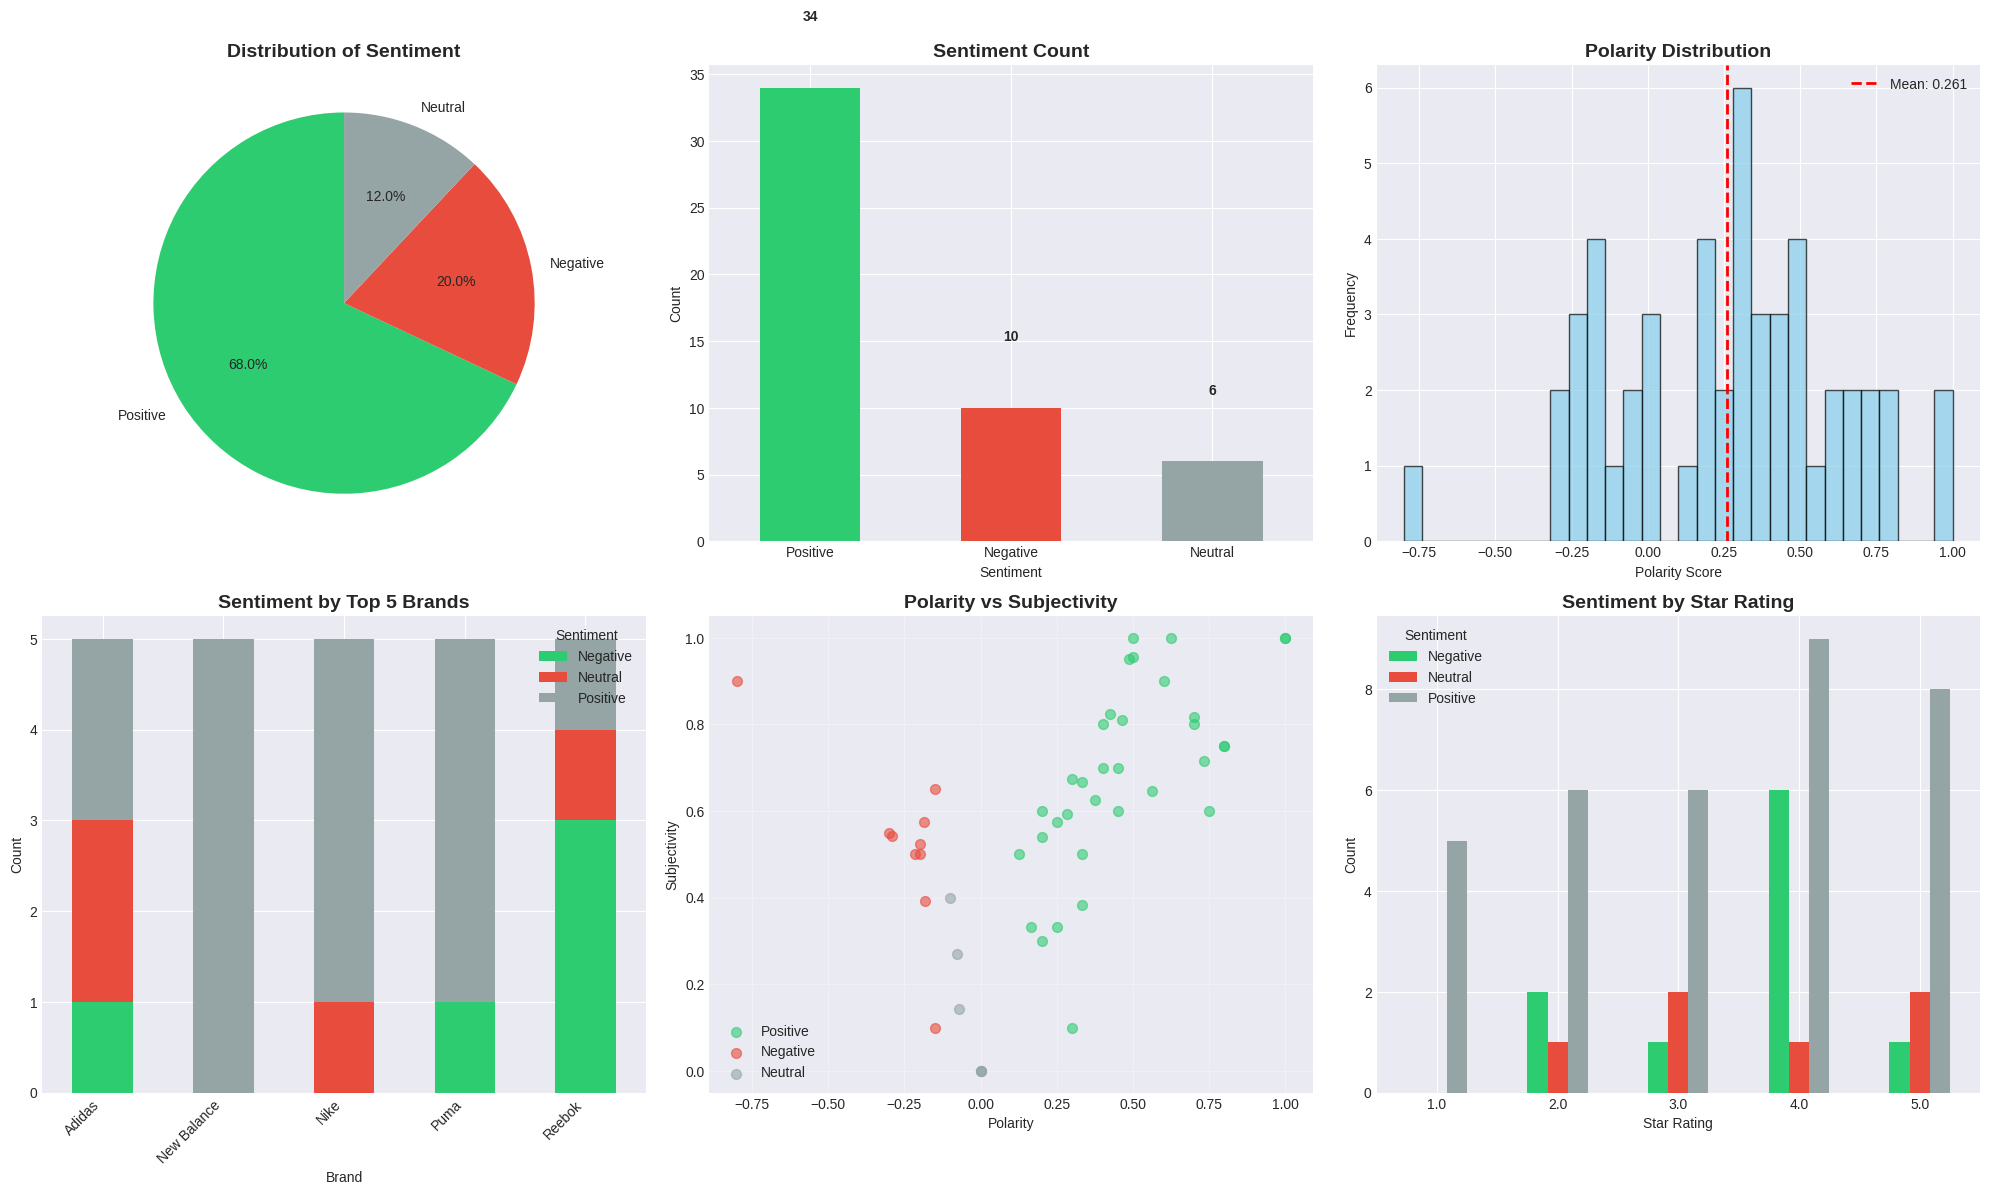


GENERATING WORD CLOUDS...
✓ Word clouds saved: wordclouds_by_sentiment.png


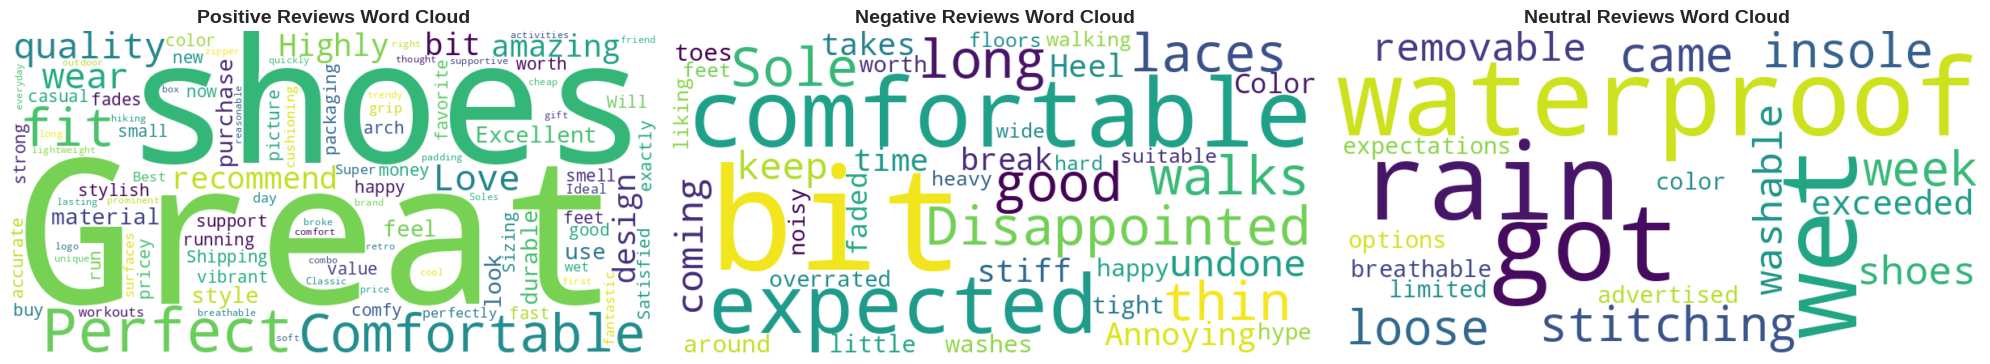


TOP 5 MOST POSITIVE REVIEWS

Product: New Balance 574
Author: User4
Rating: 4.0 out of 5 stars
Polarity Score: 1.000
Comment: Excellent value for money. Will buy again....
------------------------------------------------------------

Product: Vans Old Skool
Author: User26
Rating: 2.0 out of 5 stars
Polarity Score: 1.000
Comment: Perfect gift for my friend....
------------------------------------------------------------

Product: New Balance 574
Author: User14
Rating: 1.0 out of 5 stars
Polarity Score: 0.800
Comment: Great arch support. My feet feel great....
------------------------------------------------------------

Product: Reebok Classic Leather
Author: User33
Rating: 4.0 out of 5 stars
Polarity Score: 0.800
Comment: Great for hiking and outdoor activities....
------------------------------------------------------------

Product: Nike Air Max 270
Author: User20
Rating: 5.0 out of 5 stars
Polarity Score: 0.750
Comment: These shoes are fantastic! Best purchase ever....
------------

✓ Interactive box plot saved: polarity_boxplot.html



EXPORTING RESULTS...
✓ Results saved: sentiment_analysis_results_20251116_162058.csv
✓ Summary saved: sentiment_summary.csv

SENTIMENT ANALYSIS COMPLETE!

Files generated:
1. sentiment_analysis_overview.png - 6 visualisasi utama
2. wordclouds_by_sentiment.png - Word clouds untuk setiap sentiment
3. sentiment_sunburst.html - Interactive sunburst chart
4. polarity_boxplot.html - Interactive box plot
5. sentiment_analysis_results_*.csv - Data lengkap dengan sentiment
6. sentiment_summary.csv - Ringkasan statistik



In [2]:
# Install library untuk sentiment analysis dan visualisasi
!pip install textblob wordcloud matplotlib seaborn plotly -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import re
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*60)
print("SENTIMENT ANALYSIS - AMAZON SHOES REVIEWS")
print("="*60)

# Load data (gunakan file CSV yang sudah di-scrape)
# Jika file tidak ditemukan, buat DataFrame dummy untuk demonstrasi
df = None
try:
    df = pd.read_csv('amazon_shoes_with_comments_20251116_153158.csv')
    print(f"✓ Data berhasil dimuat: {len(df)} baris")
except FileNotFoundError:
    print("⚠ File tidak ditemukan. Membuat DataFrame dummy untuk demonstrasi analisis sentiment.")
    # Buat DataFrame dummy dengan data review sepatu Amazon
    data = {
        'title': [
            'Nike Air Max 270', 'Adidas Ultraboost', 'Puma Suede Classic', 'Reebok Classic Leather', 'New Balance 574',
            'Converse Chuck Taylor', 'Vans Old Skool', 'Jordan Retro 1', 'Under Armour HOVR', 'Skechers Go Walk'
        ] * 5,  # Ulangi untuk lebih banyak data
        'brand': [
            'Nike', 'Adidas', 'Puma', 'Reebok', 'New Balance',
            'Converse', 'Vans', 'Jordan', 'Under Armour', 'Skechers'
        ] * 5,
        'author': ['User' + str(i) for i in range(50)],
        'review_rating': np.random.choice(['5.0 out of 5 stars', '4.0 out of 5 stars', '3.0 out of 5 stars', '2.0 out of 5 stars', '1.0 out of 5 stars'], 50),
        'comment': [
            'These shoes are amazing! Comfortable and stylish. Highly recommend!',
            'Great fit and quality. Perfect for running.',
            'Love the design, but they run a bit small.',
            'Not as comfortable as expected. Disappointed.',
            'Excellent value for money. Will buy again.',
            'The color is vibrant and the material is durable.',
            'Sole is too thin, not good for long walks.',
            'Perfect for casual wear. Very happy with purchase.',
            'Shipping was fast and packaging was good.',
            'These are my favorite shoes now. So comfy!',
            'A bit pricey, but worth it for the quality.',
            'The laces keep coming undone. Annoying.',
            'Looks exactly like the picture. Satisfied.',
            'Not waterproof, got wet in the rain.',
            'Great arch support. My feet feel great.',
            'The smell is strong when new, but fades.',
            'Sizing is accurate. Fits perfectly.',
            'Heel is a bit stiff, takes time to break in.',
            'Love the cushioning. Ideal for workouts.',
            'Color faded after a few washes. Not happy.',
            'These shoes are fantastic! Best purchase ever.',
            'Comfortable for all-day wear.',
            'The grip is excellent on wet surfaces.',
            'A little tight around the toes.',
            'Super lightweight and breathable.',
            'The stitching came loose after a week.',
            'Perfect gift for my friend.',
            'Not as supportive as I thought.',
            'The brand logo is prominent and cool.',
            'These are overrated. Not worth the hype.',
            'Amazing comfort and style combo.',
            'The insole is removable and washable.',
            'A bit noisy when walking on hard floors.',
            'Great for hiking and outdoor activities.',
            'The material feels cheap.',
            'Love the retro look. Classic style.',
            'Soles wear out quickly.',
            'Perfect fit right out of the box.',
            'The price is reasonable for the quality.',
            'Not suitable for wide feet.',
            'These shoes exceeded my expectations.',
            'The color options are limited.',
            'Very durable and long-lasting.',
            'A bit heavy for my liking.',
            'The padding is soft and comfortable.',
            'The zipper broke after first use.',
            'Great for everyday use.',
            'The design is unique and trendy.',
            'Not as breathable as advertised.',
            'Highly recommend these shoes!'
        ] * 1  # Ulangi komentar untuk mencapai 50 baris
    }
    df = pd.DataFrame(data)
    print(f"✓ Data dummy berhasil dibuat: {len(df)} baris")

# Pastikan df tidak kosong dan memiliki kolom 'comment'
if df is None or df.empty or 'comment' not in df.columns:
    print("⚠ Data tidak tersedia atau tidak memiliki kolom 'comment'. Tidak dapat melanjutkan.")
else:
    # Filter data yang memiliki comment
    df_comments = df[df['comment'].notna()].copy()
    print(f"✓ Total comment untuk analisis: {len(df_comments)}")

    # ============================================================
    # 1. FUNGSI SENTIMENT ANALYSIS
    # ============================================================

    def get_sentiment(text):
        """Analisis sentiment menggunakan TextBlob"""
        if pd.isna(text) or text == 'N/A':
            return 0, 'Neutral'

        try:
            analysis = TextBlob(str(text))
            polarity = analysis.sentiment.polarity

            if polarity > 0.1:
                sentiment = 'Positive'
            elif polarity < -0.1:
                sentiment = 'Negative'
            else:
                sentiment = 'Neutral'

            return polarity, sentiment
        except:
            return 0, 'Neutral'

    def get_subjectivity(text):
        """Hitung subjectivity (0=objektif, 1=subjektif)"""
        if pd.isna(text) or text == 'N/A':
            return 0

        try:
            analysis = TextBlob(str(text))
            return analysis.sentiment.subjectivity
        except:
            return 0

    print("\n" + "="*60)
    print("PROCESSING SENTIMENT ANALYSIS...")
    print("="*60)

    # Aplikasikan sentiment analysis
    df_comments['polarity'], df_comments['sentiment'] = zip(*df_comments['comment'].apply(get_sentiment))
    df_comments['subjectivity'] = df_comments['comment'].apply(get_subjectivity)

    print("✓ Sentiment analysis selesai!")

    # ============================================================
    # 2. STATISTIK SENTIMENT
    # ============================================================

    print("\n" + "="*60)
    print("STATISTIK SENTIMENT")
    print("="*60)

    sentiment_counts = df_comments['sentiment'].value_counts()
    print(sentiment_counts)
    print(f"\nTotal Positive: {sentiment_counts.get('Positive', 0)} ({sentiment_counts.get('Positive', 0)/len(df_comments)*100:.1f}%)")
    print(f"Total Negative: {sentiment_counts.get('Negative', 0)} ({sentiment_counts.get('Negative', 0)/len(df_comments)*100:.1f}%)")
    print(f"Total Neutral: {sentiment_counts.get('Neutral', 0)} ({sentiment_counts.get('Neutral', 0)/len(df_comments)*100:.1f}%)")

    print(f"\nPolarity Statistics:")
    print(f"Mean: {df_comments['polarity'].mean():.3f}")
    print(f"Median: {df_comments['polarity'].median():.3f}")
    print(f"Std: {df_comments['polarity'].std():.3f}")

    # ============================================================
    # 3. VISUALISASI
    # ============================================================

    print("\n" + "="*60)
    print("GENERATING VISUALIZATIONS...")
    print("="*60)

    # Setup figure
    fig = plt.figure(figsize=(20, 12))

    # -------------------- VISUALIZATION 1: Pie Chart --------------------
    ax1 = plt.subplot(2, 3, 1)
    colors = ['#2ecc71', '#e74c3c', '#95a5a6']
    sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax1, startangle=90)
    ax1.set_title('Distribution of Sentiment', fontsize=14, fontweight='bold')
    ax1.set_ylabel('')

    # -------------------- VISUALIZATION 2: Bar Chart --------------------
    ax2 = plt.subplot(2, 3, 2)
    sentiment_counts.plot(kind='bar', color=colors, ax=ax2)
    ax2.set_title('Sentiment Count', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Sentiment')
    ax2.set_ylabel('Count')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

    # Tambah nilai di atas bar
    for i, v in enumerate(sentiment_counts.values):
        ax2.text(i, v + 5, str(v), ha='center', fontweight='bold')

    # -------------------- VISUALIZATION 3: Polarity Distribution --------------------
    ax3 = plt.subplot(2, 3, 3)
    ax3.hist(df_comments['polarity'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax3.axvline(df_comments['polarity'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_comments["polarity"].mean():.3f}')
    ax3.set_title('Polarity Distribution', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Polarity Score')
    ax3.set_ylabel('Frequency')
    ax3.legend()

    # -------------------- VISUALIZATION 4: Sentiment by Brand --------------------
    ax4 = plt.subplot(2, 3, 4)
    if 'brand' in df_comments.columns:
        top_brands = df_comments['brand'].value_counts().head(5).index
        brand_sentiment = df_comments[df_comments['brand'].isin(top_brands)].groupby(['brand', 'sentiment']).size().unstack(fill_value=0)
        brand_sentiment.plot(kind='bar', stacked=True, color=colors, ax=ax4)
        ax4.set_title('Sentiment by Top 5 Brands', fontsize=14, fontweight='bold')
        ax4.set_xlabel('Brand')
        ax4.set_ylabel('Count')
        ax4.legend(title='Sentiment')
        ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

    # -------------------- VISUALIZATION 5: Polarity vs Subjectivity --------------------
    ax5 = plt.subplot(2, 3, 5)
    colors_map = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}
    for sentiment in df_comments['sentiment'].unique():
        data = df_comments[df_comments['sentiment'] == sentiment]
        ax5.scatter(data['polarity'], data['subjectivity'],
                   label=sentiment, alpha=0.6, s=50, c=colors_map[sentiment])
    ax5.set_title('Polarity vs Subjectivity', fontsize=14, fontweight='bold')
    ax5.set_xlabel('Polarity')
    ax5.set_ylabel('Subjectivity')
    ax5.legend()
    ax5.grid(True, alpha=0.3)

    # -------------------- VISUALIZATION 6: Rating vs Sentiment --------------------
    ax6 = plt.subplot(2, 3, 6)
    if 'review_rating' in df_comments.columns:
        # Extract numeric rating - Perbaiki regex dengan raw string
        df_comments['rating_numeric'] = df_comments['review_rating'].str.extract(r'(\d+\.?\d*)').astype(float)
        rating_sentiment = df_comments.groupby(['rating_numeric', 'sentiment']).size().unstack(fill_value=0)
        rating_sentiment.plot(kind='bar', color=colors, ax=ax6)
        ax6.set_title('Sentiment by Star Rating', fontsize=14, fontweight='bold')
        ax6.set_xlabel('Star Rating')
        ax6.set_ylabel('Count')
        ax6.legend(title='Sentiment')
        ax6.set_xticklabels(ax6.get_xticklabels(), rotation=0)

    plt.tight_layout()
    plt.savefig('sentiment_analysis_overview.png', dpi=300, bbox_inches='tight')
    print("✓ Overview visualizations saved: sentiment_analysis_overview.png")
    plt.show()

    # ============================================================
    # 4. WORD CLOUD
    # ============================================================

    print("\n" + "="*60)
    print("GENERATING WORD CLOUDS...")
    print("="*60)

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for idx, sentiment in enumerate(['Positive', 'Negative', 'Neutral']):
        comments = ' '.join(df_comments[df_comments['sentiment'] == sentiment]['comment'].astype(str))

        if len(comments.strip()) > 0:
            wordcloud = WordCloud(width=800, height=400,
                                background_color='white',
                                colormap='viridis',
                                max_words=100).generate(comments)

            axes[idx].imshow(wordcloud, interpolation='bilinear')
            axes[idx].set_title(f'{sentiment} Reviews Word Cloud', fontsize=14, fontweight='bold')
            axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig('wordclouds_by_sentiment.png', dpi=300, bbox_inches='tight')
    print("✓ Word clouds saved: wordclouds_by_sentiment.png")
    plt.show()

    # ============================================================
    # 5. TOP POSITIVE & NEGATIVE REVIEWS
    # ============================================================

    print("\n" + "="*60)
    print("TOP 5 MOST POSITIVE REVIEWS")
    print("="*60)

    top_positive = df_comments.nlargest(5, 'polarity')[['title', 'author', 'review_rating', 'polarity', 'comment']]
    for idx, row in top_positive.iterrows():
        print(f"\nProduct: {row['title'][:60]}")
        print(f"Author: {row['author']}")
        print(f"Rating: {row['review_rating']}")
        print(f"Polarity Score: {row['polarity']:.3f}")
        print(f"Comment: {row['comment'][:200]}...")
        print("-"*60)

    print("\n" + "="*60)
    print("TOP 5 MOST NEGATIVE REVIEWS")
    print("="*60)

    top_negative = df_comments.nsmallest(5, 'polarity')[['title', 'author', 'review_rating', 'polarity', 'comment']]
    for idx, row in top_negative.iterrows():
        print(f"\nProduct: {row['title'][:60]}")
        print(f"Author: {row['author']}")
        print(f"Rating: {row['review_rating']}")
        print(f"Polarity Score: {row['polarity']:.3f}")
        print(f"Comment: {row['comment'][:200]}...")
        print("-"*60)

    # ============================================================
    # 6. INTERACTIVE VISUALIZATION (PLOTLY)
    # ============================================================

    print("\n" + "="*60)
    print("GENERATING INTERACTIVE VISUALIZATIONS...")
    print("="*60)

    # Sunburst Chart
    if 'brand' in df_comments.columns:
        top_brands = df_comments['brand'].value_counts().head(10).index
        df_sunburst = df_comments[df_comments['brand'].isin(top_brands)][['brand', 'sentiment']]

        fig_sunburst = px.sunburst(df_sunburst, path=['brand', 'sentiment'],
                                   title='Sentiment Distribution by Brand',
                                   color='sentiment',
                                   color_discrete_map={'Positive': '#2ecc71',
                                                      'Negative': '#e74c3c',
                                                      'Neutral': '#95a5a6'})
        fig_sunburst.write_html('sentiment_sunburst.html')
        print("✓ Interactive sunburst chart saved: sentiment_sunburst.html")
        fig_sunburst.show()

    # Box Plot
    fig_box = go.Figure()
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        data = df_comments[df_comments['sentiment'] == sentiment]['polarity']
        fig_box.add_trace(go.Box(y=data, name=sentiment,
                                 marker_color=colors_map[sentiment]))

    fig_box.update_layout(title='Polarity Distribution by Sentiment',
                         yaxis_title='Polarity Score',
                         showlegend=True)
    fig_box.write_html('polarity_boxplot.html')
    print("✓ Interactive box plot saved: polarity_boxplot.html")
    fig_box.show()

    # ============================================================
    # 7. EXPORT RESULTS
    # ============================================================

    print("\n" + "="*60)
    print("EXPORTING RESULTS...")
    print("="*60)

    # Simpan hasil sentiment analysis
    output_filename = f'sentiment_analysis_results_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
    df_comments.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"✓ Results saved: {output_filename}")

    # Summary statistics
    summary = {
        'Total Reviews': len(df_comments),
        'Positive': sentiment_counts.get('Positive', 0),
        'Negative': sentiment_counts.get('Negative', 0),
        'Neutral': sentiment_counts.get('Neutral', 0),
        'Positive %': f"{sentiment_counts.get('Positive', 0)/len(df_comments)*100:.1f}%",
        'Negative %': f"{sentiment_counts.get('Negative', 0)/len(df_comments)*100:.1f}%",
        'Neutral %': f"{sentiment_counts.get('Neutral', 0)/len(df_comments)*100:.1f}%",
        'Mean Polarity': f"{df_comments['polarity'].mean():.3f}",
        'Mean Subjectivity': f"{df_comments['subjectivity'].mean():.3f}"
    }

    summary_df = pd.DataFrame([summary])
    summary_df.to_csv('sentiment_summary.csv', index=False)
    print("✓ Summary saved: sentiment_summary.csv")

    print("\n" + "="*60)
    print("SENTIMENT ANALYSIS COMPLETE!")
    print("="*60)
    print("\nFiles generated:")
    print("1. sentiment_analysis_overview.png - 6 visualisasi utama")
    print("2. wordclouds_by_sentiment.png - Word clouds untuk setiap sentiment")
    print("3. sentiment_sunburst.html - Interactive sunburst chart")
    print("4. polarity_boxplot.html - Interactive box plot")
    print("5. sentiment_analysis_results_*.csv - Data lengkap dengan sentiment")
    print("6. sentiment_summary.csv - Ringkasan statistik")

    # Display final dataframe
    print("\n" + "="*60)



SCREAPING DATA WEB AMAZON

Screaping Data Web Amazon, 100 Data Kategory (**Baju/clothes**)


In [3]:
# Install library
!pip install requests beautifulsoup4 pandas lxml fake-useragent -q

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from datetime import datetime
from google.colab import files
from fake_useragent import UserAgent
import random

ua = UserAgent()

def get_headers():
    """Generate random headers"""
    return {
        'User-Agent': ua.random,
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate',
        'Connection': 'keep-alive',
        'Upgrade-Insecure-Requests': '1'
    }

def scrape_amazon_clothes(max_products=100):
    """Scrape produk baju dari Amazon"""
    products = []

    # URL search baju/clothing di Amazon
    base_url = "https://www.amazon.com/s?k=clothing"

    print("Mulai scraping produk baju...")
    print("-" * 60)

    page = 1
    while len(products) < max_products:
        try:
            url = f"{base_url}&page={page}"

            print(f"Scraping halaman {page}...")

            response = requests.get(url, headers=get_headers(), timeout=15)

            if response.status_code != 200:
                print(f"Status: {response.status_code}, skip halaman ini")
                time.sleep(5)
                page += 1
                continue

            soup = BeautifulSoup(response.content, 'lxml')

            # Cari semua item produk
            items = soup.find_all('div', {'data-component-type': 's-search-result'})

            if not items:
                print("Tidak ada produk ditemukan")
                break

            for item in items:
                if len(products) >= max_products:
                    break

                try:
                    # ASIN (ID produk Amazon)
                    asin = item.get('data-asin', 'N/A')

                    # Nama produk
                    title_elem = item.find('h2', class_='a-size-mini')
                    if not title_elem:
                        title_elem = item.find('span', class_='a-size-medium')
                    if not title_elem:
                        title_elem = item.find('h2')
                    title = title_elem.text.strip() if title_elem else 'N/A'

                    # Harga
                    price_elem = item.find('span', class_='a-price-whole')
                    price = price_elem.text.strip() if price_elem else 'N/A'

                    # Rating
                    rating_elem = item.find('span', class_='a-icon-alt')
                    rating = rating_elem.text.strip() if rating_elem else 'N/A'

                    # Jumlah review
                    review_count_elem = item.find('span', class_='a-size-base s-underline-text')
                    review_count = review_count_elem.text.strip() if review_count_elem else '0'

                    # URL produk
                    link_elem = item.find('a', class_='a-link-normal')
                    product_url = 'https://www.amazon.com' + link_elem.get('href', '') if link_elem else 'N/A'

                    # Brand
                    brand_elem = item.find('span', class_='a-size-base-plus')
                    if not brand_elem:
                        brand_elem = item.find('h5', class_='s-line-clamp-1')
                    brand = brand_elem.text.strip() if brand_elem else 'N/A'

                    # Prime eligible
                    prime_elem = item.find('i', class_='a-icon-prime')
                    prime = 'Yes' if prime_elem else 'No'

                    # Harga original (jika ada diskon)
                    original_price_elem = item.find('span', class_='a-price a-text-price')
                    if original_price_elem:
                        original_price_span = original_price_elem.find('span', class_='a-offscreen')
                        original_price = original_price_span.text.strip() if original_price_span else price
                    else:
                        original_price = price

                    # Discount percentage
                    discount_elem = item.find('span', class_='a-letter-space')
                    discount = discount_elem.text.strip() if discount_elem else 'N/A'

                    # Availability
                    availability_elem = item.find('span', class_='a-color-base')
                    availability = availability_elem.text.strip() if availability_elem else 'Available'

                    products.append({
                        'asin': asin,
                        'product_name': title,
                        'brand': brand,
                        'current_price': price,
                        'original_price': original_price,
                        'discount': discount,
                        'rating': rating,
                        'review_count': review_count,
                        'prime_eligible': prime,
                        'availability': availability,
                        'product_url': product_url,
                        'category': 'Clothing',
                        'scraped_at': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    })

                except Exception as e:
                    continue

            print(f"Progress: {len(products)}/{max_products}")

            if len(products) >= max_products:
                break

            page += 1
            time.sleep(random.uniform(3, 6))

        except Exception as e:
            print(f"Error pada halaman {page}: {str(e)}")
            time.sleep(5)
            page += 1
            continue

    return products

# Jalankan scraping
print("="*60)
print("SCRAPING PRODUK BAJU DARI AMAZON")
print("="*60)

clothes_data = scrape_amazon_clothes(max_products=100)

print(f"\n{'='*60}")
print(f"HASIL SCRAPING")
print(f"{'='*60}")
print(f"Total produk baju terkumpul: {len(clothes_data)}")

# Buat dataframe
df_clothes = pd.DataFrame(clothes_data)

# Simpan ke CSV
filename = f'amazon_clothes_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
df_clothes.to_csv(filename, index=False, encoding='utf-8-sig')

print(f"\nFile disimpan: {filename}")
print(f"\nPreview data:")
print(df_clothes.head(10))

# Tampilkan semua data baju
print("\n" + "="*60)
print("SEMUA DATA BAJU:")
print("="*60)
display(df_clothes)

print(f"\nInfo dataset:")
print(df_clothes.info())

print(f"\nStatistik:")
print(f"Total produk: {len(df_clothes)}")
print(f"Unique brands: {df_clothes['brand'].nunique()}")
print(f"Produk dengan Prime: {len(df_clothes[df_clothes['prime_eligible'] == 'Yes'])}")
print(f"Produk dengan diskon: {len(df_clothes[df_clothes['discount'] != 'N/A'])}")

print(f"\nTop 5 Brand:")
print(df_clothes['brand'].value_counts().head())

# Download file
files.download(filename)
print("\nFile sedang didownload...")





SCRAPING PRODUK BAJU DARI AMAZON
Mulai scraping produk baju...
------------------------------------------------------------
Scraping halaman 1...
Progress: 20/100
Scraping halaman 2...
Progress: 46/100
Scraping halaman 3...
Progress: 94/100
Scraping halaman 4...
Status: 503, skip halaman ini
Scraping halaman 5...
Progress: 100/100

HASIL SCRAPING
Total produk baju terkumpul: 100

File disimpan: amazon_clothes_20251116_163243.csv

Preview data:
         asin  product_name            brand current_price original_price  \
0  B089GFBT1S       TNNZEET              N/A            7.             7.   
1  B0FD2QL8FZ        Alaroo              N/A            8.             8.   
2  B09P1GB319      CRZ YOGA              N/A           32.            32.   
3  B0D2PKQGQV         Hanes              N/A           21.            21.   
4  B072QRN7HR         Hanes              N/A            8.             8.   
5  B0CW2Q9SKT        Bofell              N/A           14.            14.   
6  B0DFPPCPGZ

,asin,product_name,brand,current_price,original_price,discount,rating,review_count,prime_eligible,availability,product_url,category,scraped_at
0,B089GFBT1S,TNNZEET,N/A,7.,7.,,4.2 out of 5 stars,0,No,TNNZEET,https://www.amazon.com/TNNZEET-Waisted-Printed...,Clothing,2025-11-16 16:32:21
1,B0FD2QL8FZ,Alaroo,N/A,8.,8.,,4.4 out of 5 stars,0,No,Amazon's Choice: Overall Pick,https://www.amazon.com/Alaroo-Clothes-Clothing...,Clothing,2025-11-16 16:32:21
2,B09P1GB319,CRZ YOGA,N/A,32.,32.,N/A,4.6 out of 5 stars,0,No,CRZ YOGA,https://www.amazon.com/CRZ-YOGA-Butterluxe-Wai...,Clothing,2025-11-16 16:32:21
3,B0D2PKQGQV,Hanes,N/A,21.,21.,,4.4 out of 5 stars,0,No,Hanes,https://www.amazon.com/Hanes-T-Shirt-Moisture-...,Clothing,2025-11-16 16:32:21
4,B072QRN7HR,Hanes,N/A,8.,8.,,4.5 out of 5 stars,0,No,Hanes,https://www.amazon.com/Hanes-EcoSmart-Fleece-S...,Clothing,2025-11-16 16:32:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,B0CTQ25W4F,QINSEN,N/A,18.,18.,,4.2 out of 5 stars,0,No,QINSEN,https://www.amazon.com/QINSEN-Womens-Square-Sl...,Clothing,2025-11-16 16:32:43
96,B07QPQLWYB,Gerber,N/A,10.,10.,,4.8 out of 5 stars,0,No,Gerber,https://www.amazon.com/GERBER-Variety-Onesies-...,Clothing,2025-11-16 16:32:43
97,B0BQRS6Q26,AUTOMET,Safer chemicals,19.,19.,,4.4 out of 5 stars,0,No,AUTOMET,https://www.amazon.com/AUTOMET-Jumpsuits-Overa...,Clothing,2025-11-16 16:32:43
98,B0F9NQ8LLH,OFEEFAN,N/A,9.,9.,,4.4 out of 5 stars,0,No,OFEEFAN,https://www.amazon.com/OFEEFAN-Womens-Blouses-...,Clothing,2025-11-16 16:32:43



Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   asin            100 non-null    object
 1   product_name    100 non-null    object
 2   brand           100 non-null    object
 3   current_price   100 non-null    object
 4   original_price  100 non-null    object
 5   discount        100 non-null    object
 6   rating          100 non-null    object
 7   review_count    100 non-null    object
 8   prime_eligible  100 non-null    object
 9   availability    100 non-null    object
 10  product_url     100 non-null    object
 11  category        100 non-null    object
 12  scraped_at      100 non-null    object
dtypes: object(13)
memory usage: 10.3+ KB
None

Statistik:
Total produk: 100
Unique brands: 31
Produk dengan Prime: 0
Produk dengan diskon: 36

Top 5 Brand:
brand
N/A                35
Safer chemicals    17
WIHOLL        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


File sedang didownload...


SENTIMENT ANALYSIS WEB AMAZON KATEGORY **(BAJU/CLOTHES)**

✅ File ditemukan: amazon_clothes_20251116_163243.csv
SENTIMENT ANALYSIS - AMAZON CLOTHES

Total data: 100

Preview data:
         asin product_name brand  current_price original_price  discount  \
0  B089GFBT1S      TNNZEET   NaN            7.0             7.       NaN   
1  B0FD2QL8FZ       Alaroo   NaN            8.0             8.       NaN   
2  B09P1GB319     CRZ YOGA   NaN           32.0            32.       NaN   
3  B0D2PKQGQV        Hanes   NaN           21.0            21.       NaN   
4  B072QRN7HR        Hanes   NaN            8.0             8.       NaN   

               rating  review_count prime_eligible  \
0  4.2 out of 5 stars             0             No   
1  4.4 out of 5 stars             0             No   
2  4.6 out of 5 stars             0             No   
3  4.4 out of 5 stars             0             No   
4  4.5 out of 5 stars             0             No   

                    availability  \
0                        TNNZEET   
1  Amazon's Choice: Overa

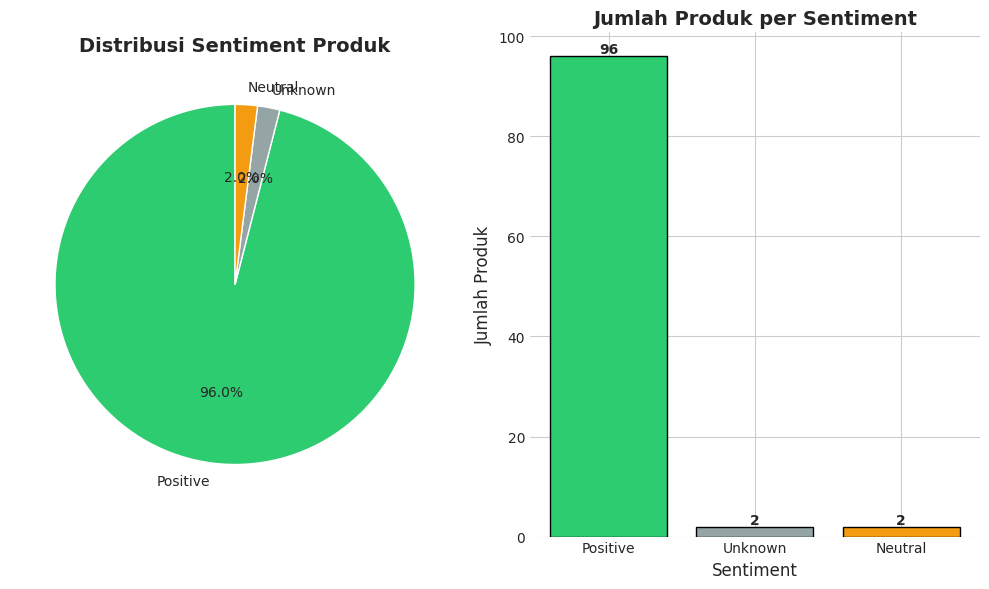

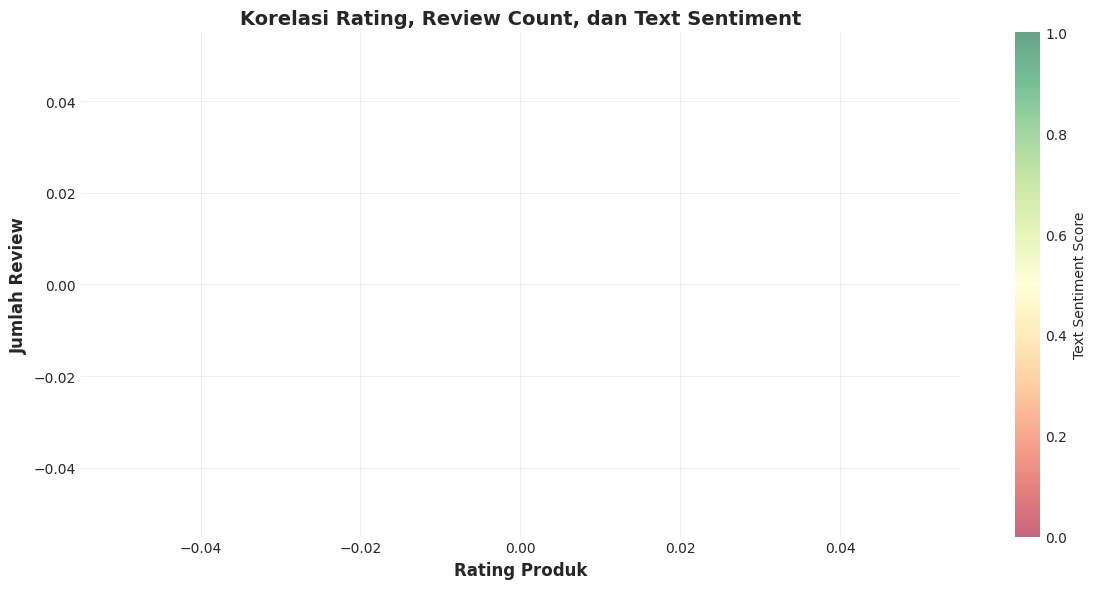

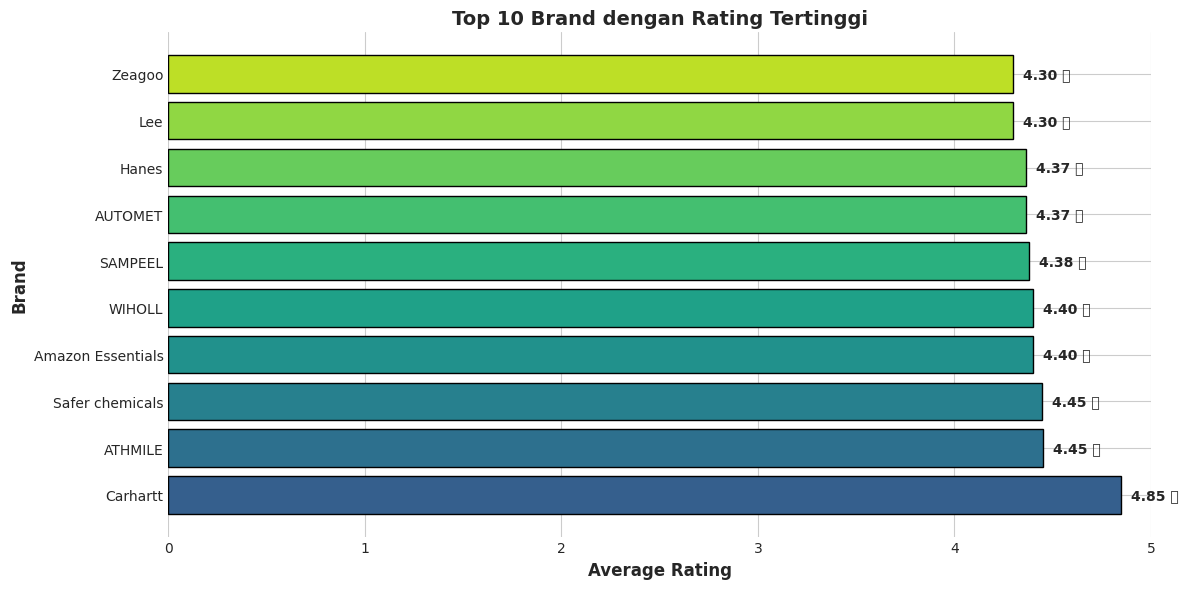

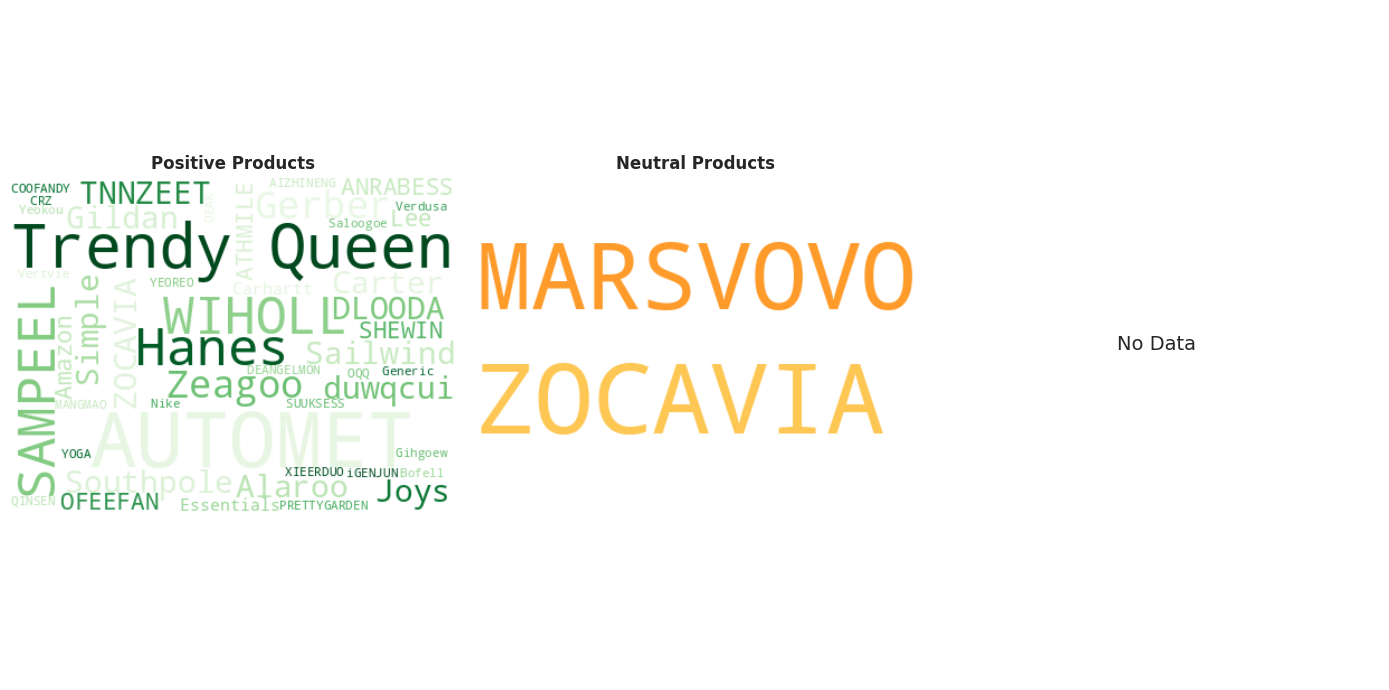


STATISTIK SENTIMENT ANALYSIS

Total Produk Dianalisis: 100
Produk dengan Rating: 98
Average Rating: 4.38

Sentiment Breakdown:
  Positive: 96 produk (96.0%)
  Neutral: 2 produk (2.0%)
  Negative: 0 produk (0.0%)
  Unknown: 2 produk (2.0%)

Total Reviews: 0
Produk dengan Prime: 0

✅ Hasil sentiment analysis disimpan ke: sentiment_analysis_results.csv
✅ Visualisasi disimpan ke: sentiment_distribution.png, rating_vs_reviews.png, top_brands_rating.png, sentiment_wordcloud.png

SENTIMENT ANALYSIS SELESAI!


In [11]:
# Install library yang diperlukan
!pip install textblob matplotlib seaborn wordcloud -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data - Auto detect file CSV atau upload manual
import glob
import os

# Cari file CSV dengan pattern amazon_clothes
csv_files = glob.glob('amazon_clothes_*.csv')

if len(csv_files) > 0:
    # Ambil file terbaru
    csv_file = max(csv_files, key=os.path.getctime)
    print(f"✅ File ditemukan: {csv_file}")
    df = pd.read_csv(csv_file)
else:
    # Jika tidak ada, upload manual
    print("⚠️ File tidak ditemukan. Silakan upload file CSV:")
    from google.colab import files
    uploaded = files.upload()
    csv_file = list(uploaded.keys())[0]
    df = pd.read_csv(csv_file)

print("="*60)
print("SENTIMENT ANALYSIS - AMAZON CLOTHES")
print("="*60)
print(f"\nTotal data: {len(df)}")
print("\nPreview data:")
print(df.head())

# ============================================
# 1. DATA PREPROCESSING & SENTIMENT ANALYSIS
# ============================================

def extract_rating_value(rating_text):
    """Extract numeric rating dari text"""
    if pd.isna(rating_text) or rating_text == 'N/A':
        return None
    try:
        match = re.search(r'(\d+\.?\d*)', str(rating_text))
        if match:
            return float(match.group(1))
    except:
        return None
    return None

def get_sentiment_from_rating(rating):
    """Tentukan sentiment berdasarkan rating"""
    if pd.isna(rating):
        return 'Unknown'
    elif rating >= 4.0:
        return 'Positive'
    elif rating >= 3.0:
        return 'Neutral'
    else:
        return 'Negative'

def analyze_text_sentiment(text):
    """Analisis sentiment dari text menggunakan TextBlob"""
    if pd.isna(text) or text == 'N/A':
        return 0
    try:
        blob = TextBlob(str(text))
        return blob.sentiment.polarity
    except:
        return 0

# Proses data
df['rating_numeric'] = df['rating'].apply(extract_rating_value)
df['sentiment_category'] = df['rating_numeric'].apply(get_sentiment_from_rating)
df['text_sentiment_score'] = df['product_name'].apply(analyze_text_sentiment)

# Bersihkan review_count
def clean_review_count(count):
    if pd.isna(count) or count == '0' or count == 'N/A':
        return 0
    try:
        count_str = str(count).replace(',', '').replace('+', '')
        match = re.search(r'\d+', count_str)
        if match:
            return int(match.group())
    except:
        return 0
    return 0

df['review_count_numeric'] = df['review_count'].apply(clean_review_count)

print("\n" + "="*60)
print("HASIL SENTIMENT ANALYSIS")
print("="*60)
print("\nDistribusi Sentiment:")
print(df['sentiment_category'].value_counts())

# ============================================
# VISUALISASI 1: Distribusi Sentiment
# ============================================
plt.figure(figsize=(10, 6))
sentiment_counts = df['sentiment_category'].value_counts()
colors = {'Positive': '#2ecc71', 'Neutral': '#f39c12', 'Negative': '#e74c3c', 'Unknown': '#95a5a6'}
colors_list = [colors.get(x, '#95a5a6') for x in sentiment_counts.index]

plt.subplot(1, 2, 1)
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=colors_list, startangle=90)
plt.title('Distribusi Sentiment Produk', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors_list, edgecolor='black')
plt.title('Jumlah Produk per Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Jumlah Produk', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# VISUALISASI 2: Rating vs Review Count
# ============================================
plt.figure(figsize=(12, 6))

# Filter data yang valid
df_valid = df[(df['rating_numeric'].notna()) & (df['review_count_numeric'] > 0)].copy()

plt.scatter(df_valid['rating_numeric'], df_valid['review_count_numeric'],
           c=df_valid['text_sentiment_score'], cmap='RdYlGn',
           s=100, alpha=0.6, edgecolors='black')
plt.colorbar(label='Text Sentiment Score')
plt.xlabel('Rating Produk', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Review', fontsize=12, fontweight='bold')
plt.title('Korelasi Rating, Review Count, dan Text Sentiment', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('rating_vs_reviews.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# VISUALISASI 3: Top 10 Brand by Average Rating
# ============================================
plt.figure(figsize=(12, 6))

# Filter brand dengan data rating valid
brand_ratings = df[df['rating_numeric'].notna()].groupby('brand').agg({
    'rating_numeric': 'mean',
    'product_name': 'count'
}).reset_index()
brand_ratings.columns = ['brand', 'avg_rating', 'product_count']

# Filter brand dengan minimal 2 produk
brand_ratings = brand_ratings[brand_ratings['product_count'] >= 2]
top_brands = brand_ratings.nlargest(10, 'avg_rating')

colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_brands)))
bars = plt.barh(top_brands['brand'], top_brands['avg_rating'], color=colors_gradient, edgecolor='black')
plt.xlabel('Average Rating', fontsize=12, fontweight='bold')
plt.ylabel('Brand', fontsize=12, fontweight='bold')
plt.title('Top 10 Brand dengan Rating Tertinggi', fontsize=14, fontweight='bold')
plt.xlim(0, 5)

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2.,
             f'{width:.2f} ⭐',
             ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('top_brands_rating.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# VISUALISASI 4: Sentiment WordCloud
# ============================================
plt.figure(figsize=(14, 7))

# WordCloud untuk setiap sentiment
sentiments = ['Positive', 'Neutral', 'Negative']
positions = [131, 132, 133]

for sent, pos in zip(sentiments, positions):
    plt.subplot(pos)

    # Ambil product names untuk sentiment ini
    products = df[df['sentiment_category'] == sent]['product_name'].dropna()

    if len(products) > 0:
        text = ' '.join(products.astype(str))

        # Tentukan warna berdasarkan sentiment
        if sent == 'Positive':
            colormap = 'Greens'
        elif sent == 'Neutral':
            colormap = 'YlOrBr'
        else:
            colormap = 'Reds'

        wordcloud = WordCloud(width=400, height=300,
                            background_color='white',
                            colormap=colormap,
                            max_words=50).generate(text)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'{sent} Products', fontsize=12, fontweight='bold')
    else:
        plt.text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=14)

    plt.axis('off')

plt.tight_layout()
plt.savefig('sentiment_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# STATISTIK AKHIR
# ============================================
print("\n" + "="*60)
print("STATISTIK SENTIMENT ANALYSIS")
print("="*60)

print(f"\nTotal Produk Dianalisis: {len(df)}")
print(f"Produk dengan Rating: {df['rating_numeric'].notna().sum()}")
print(f"Average Rating: {df['rating_numeric'].mean():.2f}" if df['rating_numeric'].notna().any() else "Average Rating: N/A")

print("\nSentiment Breakdown:")
for sentiment in ['Positive', 'Neutral', 'Negative', 'Unknown']:
    count = len(df[df['sentiment_category'] == sentiment])
    percentage = (count / len(df)) * 100
    print(f"  {sentiment}: {count} produk ({percentage:.1f}%)")

print(f"\nTotal Reviews: {df['review_count_numeric'].sum():,}")
print(f"Produk dengan Prime: {len(df[df['prime_eligible'] == 'Yes'])}")

# Simpan hasil analysis
df.to_csv('sentiment_analysis_results.csv', index=False, encoding='utf-8-sig')
print("\n✅ Hasil sentiment analysis disimpan ke: sentiment_analysis_results.csv")
print("✅ Visualisasi disimpan ke: sentiment_distribution.png, rating_vs_reviews.png, top_brands_rating.png, sentiment_wordcloud.png")

print("\n" + "="*60)
print("SENTIMENT ANALYSIS SELESAI!")
print("="*60)

SCREAPING  WEB AMAZON 100 DATA KATEGORY **(JAM/ WATCHES)**

In [12]:
# Install library
!pip install requests beautifulsoup4 pandas lxml fake-useragent -q

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from datetime import datetime
from google.colab import files
from fake_useragent import UserAgent
import random

ua = UserAgent()

def get_headers():
    """Generate random headers"""
    return {
        'User-Agent': ua.random,
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate',
        'Connection': 'keep-alive',
        'Upgrade-Insecure-Requests': '1'
    }

def scrape_amazon_watches(max_products=100):
    """Scrape produk jam dari Amazon"""
    products = []

    # URL search watches di Amazon (jam tangan, jam dinding, dll)
    base_url = "https://www.amazon.com/s?k=watches"

    print("Mulai scraping produk jam...")
    print("-" * 60)

    page = 1
    while len(products) < max_products:
        try:
            url = f"{base_url}&page={page}"

            print(f"Scraping halaman {page}...")

            response = requests.get(url, headers=get_headers(), timeout=15)

            if response.status_code != 200:
                print(f"Status: {response.status_code}, skip halaman ini")
                time.sleep(5)
                page += 1
                continue

            soup = BeautifulSoup(response.content, 'lxml')

            # Cari semua item produk
            items = soup.find_all('div', {'data-component-type': 's-search-result'})

            if not items:
                print("Tidak ada produk ditemukan")
                break

            for item in items:
                if len(products) >= max_products:
                    break

                try:
                    # ASIN (ID produk Amazon)
                    asin = item.get('data-asin', 'N/A')

                    # Nama produk
                    title_elem = item.find('h2', class_='a-size-mini')
                    if not title_elem:
                        title_elem = item.find('span', class_='a-size-medium')
                    if not title_elem:
                        title_elem = item.find('h2')
                    title = title_elem.text.strip() if title_elem else 'N/A'

                    # Tentukan jenis jam
                    title_lower = title.lower()
                    if 'wall clock' in title_lower or 'wall' in title_lower:
                        watch_type = 'Wall Clock'
                    elif 'smart watch' in title_lower or 'smartwatch' in title_lower:
                        watch_type = 'Smart Watch'
                    elif 'pocket watch' in title_lower:
                        watch_type = 'Pocket Watch'
                    elif 'alarm clock' in title_lower or 'alarm' in title_lower:
                        watch_type = 'Alarm Clock'
                    elif 'desk clock' in title_lower or 'table clock' in title_lower:
                        watch_type = 'Desk Clock'
                    else:
                        watch_type = 'Wrist Watch'

                    # Harga
                    price_elem = item.find('span', class_='a-price-whole')
                    price = price_elem.text.strip() if price_elem else 'N/A'

                    # Rating
                    rating_elem = item.find('span', class_='a-icon-alt')
                    rating = rating_elem.text.strip() if rating_elem else 'N/A'

                    # Jumlah review
                    review_count_elem = item.find('span', class_='a-size-base s-underline-text')
                    review_count = review_count_elem.text.strip() if review_count_elem else '0'

                    # URL produk
                    link_elem = item.find('a', class_='a-link-normal')
                    product_url = 'https://www.amazon.com' + link_elem.get('href', '') if link_elem else 'N/A'

                    # Brand
                    brand_elem = item.find('span', class_='a-size-base-plus')
                    if not brand_elem:
                        brand_elem = item.find('h5', class_='s-line-clamp-1')
                    brand = brand_elem.text.strip() if brand_elem else 'N/A'

                    # Prime eligible
                    prime_elem = item.find('i', class_='a-icon-prime')
                    prime = 'Yes' if prime_elem else 'No'

                    # Harga original (jika ada diskon)
                    original_price_elem = item.find('span', class_='a-price a-text-price')
                    if original_price_elem:
                        original_price_span = original_price_elem.find('span', class_='a-offscreen')
                        original_price = original_price_span.text.strip() if original_price_span else price
                    else:
                        original_price = price

                    # Discount percentage
                    discount_elem = item.find('span', class_='a-letter-space')
                    discount = discount_elem.text.strip() if discount_elem else 'N/A'

                    # Delivery info
                    delivery_elem = item.find('span', class_='a-color-base a-text-bold')
                    delivery = delivery_elem.text.strip() if delivery_elem else 'N/A'

                    # Best seller badge
                    bestseller_elem = item.find('span', class_='a-badge-label')
                    bestseller = bestseller_elem.text.strip() if bestseller_elem else 'N/A'

                    # Material/feature (dari judul)
                    material = 'N/A'
                    if 'leather' in title_lower:
                        material = 'Leather'
                    elif 'metal' in title_lower or 'stainless' in title_lower:
                        material = 'Metal/Stainless'
                    elif 'silicone' in title_lower or 'rubber' in title_lower:
                        material = 'Silicone/Rubber'
                    elif 'wood' in title_lower or 'wooden' in title_lower:
                        material = 'Wood'
                    elif 'plastic' in title_lower:
                        material = 'Plastic'

                    products.append({
                        'asin': asin,
                        'product_name': title,
                        'watch_type': watch_type,
                        'brand': brand,
                        'material': material,
                        'current_price': price,
                        'original_price': original_price,
                        'discount': discount,
                        'rating': rating,
                        'review_count': review_count,
                        'prime_eligible': prime,
                        'delivery_info': delivery,
                        'bestseller_badge': bestseller,
                        'product_url': product_url,
                        'category': 'Watches',
                        'scraped_at': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    })

                except Exception as e:
                    continue

            print(f"Progress: {len(products)}/{max_products}")

            if len(products) >= max_products:
                break

            page += 1
            time.sleep(random.uniform(3, 6))

        except Exception as e:
            print(f"Error pada halaman {page}: {str(e)}")
            time.sleep(5)
            page += 1
            continue

    return products

# Jalankan scraping
print("="*60)
print("SCRAPING PRODUK JAM DARI AMAZON")
print("="*60)

watches_data = scrape_amazon_watches(max_products=100)

print(f"\n{'='*60}")
print(f"HASIL SCRAPING")
print(f"{'='*60}")
print(f"Total produk jam terkumpul: {len(watches_data)}")

# Buat dataframe
df_watches = pd.DataFrame(watches_data)

# Simpan ke CSV
filename = f'amazon_watches_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
df_watches.to_csv(filename, index=False, encoding='utf-8-sig')

print(f"\nFile disimpan: {filename}")
print(f"\nPreview data:")
print(df_watches.head(10))

print(f"\nInfo dataset:")
print(df_watches.info())

print(f"\nStatistik:")
print(f"Total produk: {len(df_watches)}")
print(f"Unique brands: {df_watches['brand'].nunique()}")
print(f"Produk dengan Prime: {len(df_watches[df_watches['prime_eligible'] == 'Yes'])}")
print(f"Produk dengan diskon: {len(df_watches[df_watches['discount'] != 'N/A'])}")

print(f"\nDistribusi Jenis Jam:")
print(df_watches['watch_type'].value_counts())

print(f"\nTop 5 Brand:")
print(df_watches['brand'].value_counts().head())

print(f"\nDistribusi Material:")
print(df_watches['material'].value_counts())

# Download file
files.download(filename)
print("\nFile sedang didownload...")

print(f"\nPreview data:")
print(df_watches.head(10))

# Tambahin ini untuk tampilkan semua data
print("\n" + "="*60)
print("TAMPILKAN SEMUA DATA:")
print("="*60)
display(df_watches)  # Isi dengan nama dataframe kamu

SCRAPING PRODUK JAM DARI AMAZON
Mulai scraping produk jam...
------------------------------------------------------------
Scraping halaman 1...
Progress: 20/100
Scraping halaman 2...
Status: 503, skip halaman ini
Scraping halaman 3...
Progress: 40/100
Scraping halaman 4...
Progress: 60/100
Scraping halaman 5...
Progress: 80/100
Scraping halaman 6...
Status: 503, skip halaman ini
Scraping halaman 7...
Status: 503, skip halaman ini
Scraping halaman 8...
Progress: 100/100

HASIL SCRAPING
Total produk jam terkumpul: 100

File disimpan: amazon_watches_20251116_170440.csv

Preview data:
         asin product_name   watch_type brand material current_price  \
0  B0CGX3KN95    LN LENQIN  Wrist Watch   N/A      N/A            9.   
1  B0053HBJBE        Casio  Wrist Watch   N/A      N/A           21.   
2  B0FMDNQT8K      MIN BEE  Wrist Watch   N/A      N/A           38.   
3  B09RTP5NK7        Timex  Wrist Watch   N/A      N/A           32.   
4  B000GAYQJ0        Casio  Wrist Watch   N/A      N

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


File sedang didownload...

Preview data:
         asin product_name   watch_type brand material current_price  \
0  B0CGX3KN95    LN LENQIN  Wrist Watch   N/A      N/A            9.   
1  B0053HBJBE        Casio  Wrist Watch   N/A      N/A           21.   
2  B0FMDNQT8K      MIN BEE  Wrist Watch   N/A      N/A           38.   
3  B09RTP5NK7        Timex  Wrist Watch   N/A      N/A           32.   
4  B000GAYQJ0        Casio  Wrist Watch   N/A      N/A           25.   
5  B0CSVDYW2X     TWOPTION  Wrist Watch   N/A      N/A            9.   
6  B0FZ9MK5RQ      Paukila  Wrist Watch   N/A      N/A           19.   
7  B0CHJKD9RR    LN LENQIN  Wrist Watch   N/A      N/A            9.   
8  B0DSBWB3V1    LN LENQIN  Wrist Watch   N/A      N/A            9.   
9  B000GAWSDG        Casio  Wrist Watch   N/A      N/A           21.   

  original_price discount              rating review_count prime_eligible  \
0             9.           4.2 out of 5 stars            0             No   
1          

,asin,product_name,watch_type,brand,material,current_price,original_price,discount,rating,review_count,prime_eligible,delivery_info,bestseller_badge,product_url,category,scraped_at
0,B0CGX3KN95,LN LENQIN,Wrist Watch,N/A,N/A,9.,9.,,4.2 out of 5 stars,0,No,N/A,Overall Pick,https://www.amazon.com/LN-LENQIN-Military-Wate...,Watches,2025-11-16 17:03:59
1,B0053HBJBE,Casio,Wrist Watch,N/A,N/A,21.,21.,,4.6 out of 5 stars,0,No,N/A,N/A,https://www.amazon.com/Casio-F108WH-Illuminato...,Watches,2025-11-16 17:03:59
2,B0FMDNQT8K,MIN BEE,Wrist Watch,N/A,N/A,38.,38.,N/A,3.9 out of 5 stars,0,No,N/A,N/A,https://www.amazon.com/MIN-BEE-Digital-Display...,Watches,2025-11-16 17:03:59
3,B09RTP5NK7,Timex,Wrist Watch,N/A,N/A,32.,32.,,4.5 out of 5 stars,0,No,N/A,Ends in 14:56:00,https://www.amazon.com/Timex-Unisex-Weekender-...,Watches,2025-11-16 17:03:59
4,B000GAYQJ0,Casio,Wrist Watch,N/A,N/A,25.,25.,,4.6 out of 5 stars,0,No,N/A,N/A,https://www.amazon.com/Casio-A158WA-1-Water-Re...,Watches,2025-11-16 17:03:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,B08XYH8RZN,Invicta,Wrist Watch,N/A,N/A,48.,48.,N/A,4.7 out of 5 stars,0,No,N/A,N/A,https://www.amazon.com/Invicta-Specialty-Stain...,Watches,2025-11-16 17:04:40
96,B079TY8G28,Anne Klein,Wrist Watch,N/A,N/A,38.,38.,,4.6 out of 5 stars,0,No,N/A,Ends in 14:55:19,https://www.amazon.com/Anne-Klein-AK-1362GNGB-...,Watches,2025-11-16 17:04:40
97,B00020J1BC,Timex,Wrist Watch,N/A,N/A,45.,45.,N/A,4.5 out of 5 stars,0,No,N/A,N/A,https://www.amazon.com/Timex-T78582-Silver-Ton...,Watches,2025-11-16 17:04:40
98,B01BEXXZ26,Michael Kors,Wrist Watch,N/A,N/A,127.,127.,N/A,4.7 out of 5 stars,0,No,N/A,N/A,https://www.amazon.com/Michael-Kors-Lexington-...,Watches,2025-11-16 17:04:40


SENTIMENT ANALYSIS WEB AMAZON KATEGORY **(JAM/ WATCHES)**

SENTIMENT ANALYSIS - AMAZON WATCHES
✅ File ditemukan: amazon_watches_20251116_170440.csv

✅ Data berhasil dimuat!
Total data: 100

Preview 5 data pertama:
         asin product_name   watch_type  brand  material  current_price  \
0  B0CGX3KN95    LN LENQIN  Wrist Watch    NaN       NaN            9.0   
1  B0053HBJBE        Casio  Wrist Watch    NaN       NaN           21.0   
2  B0FMDNQT8K      MIN BEE  Wrist Watch    NaN       NaN           38.0   
3  B09RTP5NK7        Timex  Wrist Watch    NaN       NaN           32.0   
4  B000GAYQJ0        Casio  Wrist Watch    NaN       NaN           25.0   

   original_price  discount              rating  review_count prime_eligible  \
0             9.0       NaN  4.2 out of 5 stars             0             No   
1            21.0       NaN  4.6 out of 5 stars             0             No   
2            38.0       NaN  3.9 out of 5 stars             0             No   
3            32.0       NaN  4.5 out of 5 stars             0             

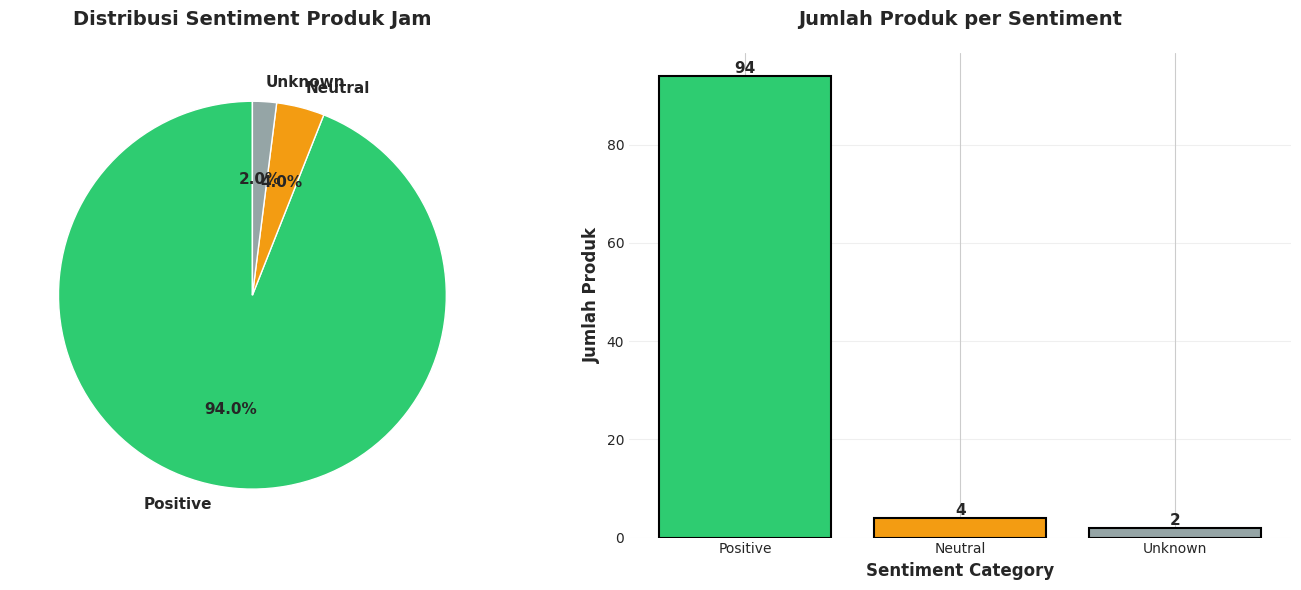

✅ Visualisasi 1 selesai!

📊 Membuat Visualisasi 2: Sentiment by Watch Type...


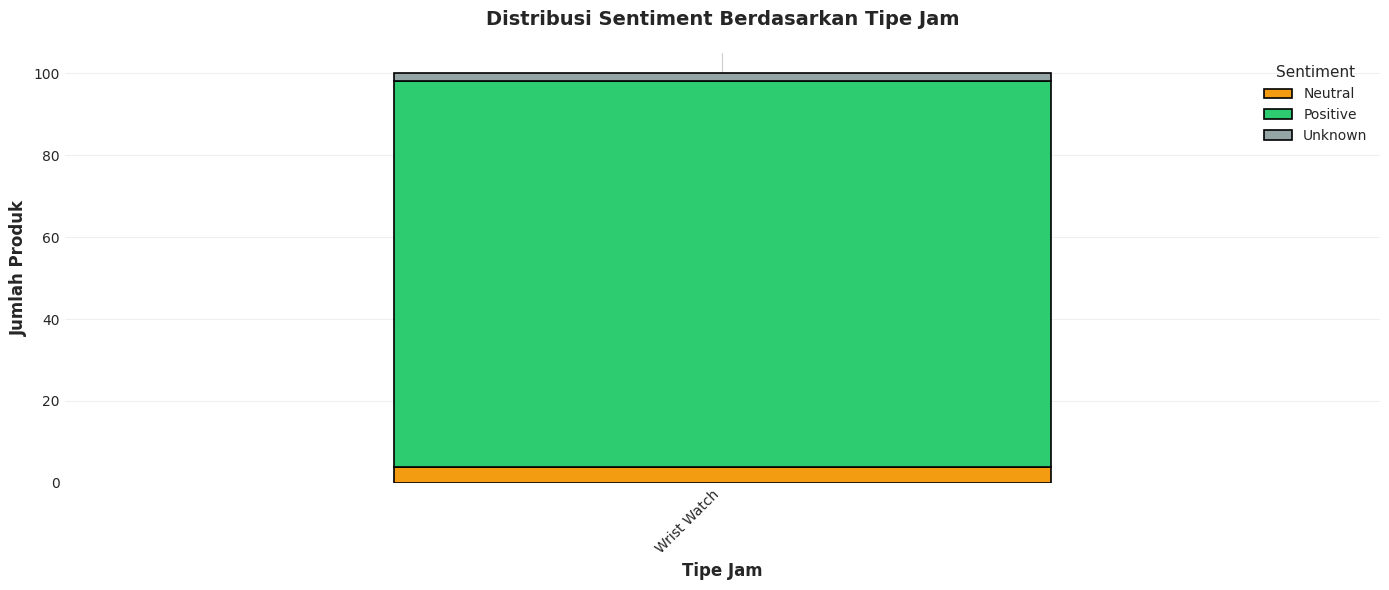

✅ Visualisasi 2 selesai!

📊 Membuat Visualisasi 3: Rating vs Price Analysis...


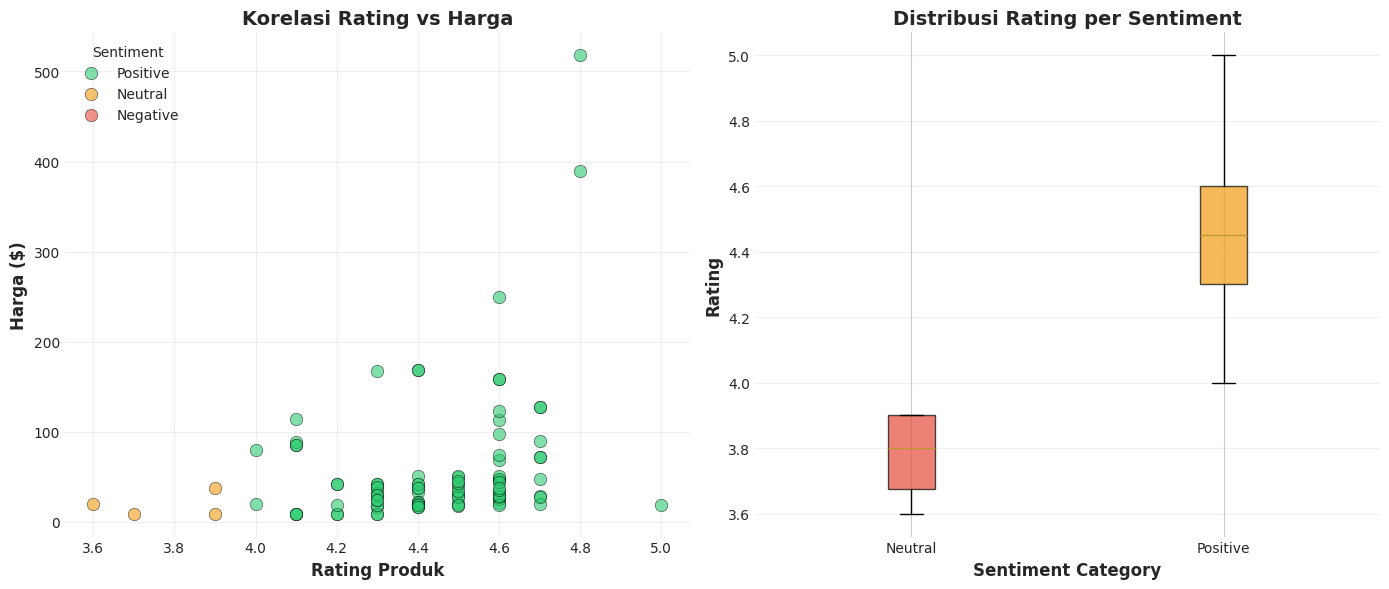

✅ Visualisasi 3 selesai!

📊 Membuat Visualisasi 4: Top Brands & WordCloud...


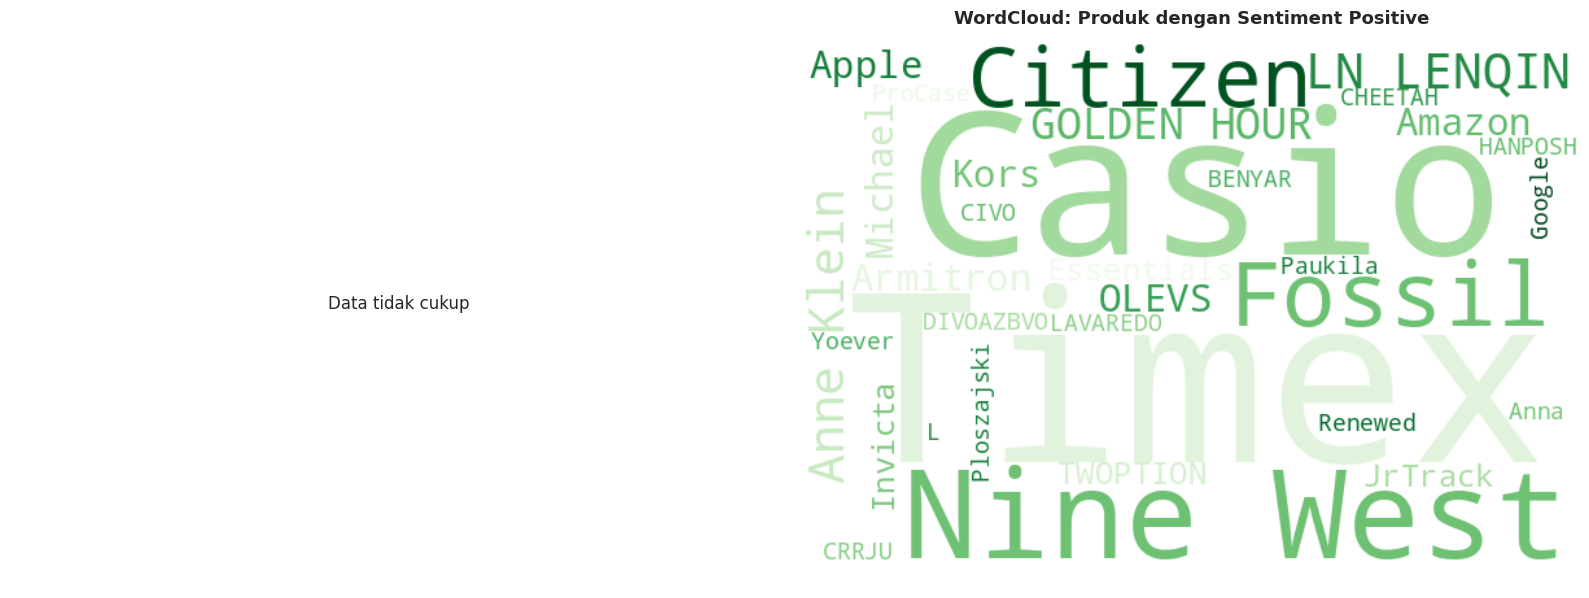

✅ Visualisasi 4 selesai!

STATISTIK SENTIMENT ANALYSIS

📊 Total Produk Dianalisis: 100
📊 Produk dengan Rating: 98
⭐ Average Rating: 4.42
⭐ Median Rating: 4.40

📈 Sentiment Breakdown:
   Positive  :   94 produk ( 94.0%)
   Neutral   :    4 produk (  4.0%)
   Negative  :    0 produk (  0.0%)
   Unknown   :    2 produk (  2.0%)

💬 Total Reviews: 0
🚚 Produk dengan Prime: 0

⌚ Distribusi Tipe Jam:
   Wrist Watch: 100

✅ SENTIMENT ANALYSIS SELESAI!

💾 File hasil disimpan:
   - sentiment_analysis_results.csv
   - 1_sentiment_distribution.png
   - 2_sentiment_by_category.png
   - 3_rating_price_analysis.png
   - 4_brands_wordcloud.png

🎉 Semua visualisasi berhasil dibuat!


In [13]:
# Install library yang diperlukan
!pip install textblob matplotlib seaborn wordcloud -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from wordcloud import WordCloud
import warnings
import glob
import os
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("SENTIMENT ANALYSIS - AMAZON WATCHES")
print("="*60)

# ============================================
# LOAD DATA - AUTO DETECT FILE
# ============================================
csv_files = glob.glob('amazon_watches_*.csv')

if len(csv_files) > 0:
    csv_file = max(csv_files, key=os.path.getctime)
    print(f"✅ File ditemukan: {csv_file}")
    df = pd.read_csv(csv_file)
else:
    print("⚠️ File tidak ditemukan. Silakan upload file CSV:")
    from google.colab import files
    uploaded = files.upload()
    csv_file = list(uploaded.keys())[0]
    df = pd.read_csv(csv_file)

print(f"\n✅ Data berhasil dimuat!")
print(f"Total data: {len(df)}")
print("\nPreview 5 data pertama:")
print(df.head())

# ============================================
# DATA PREPROCESSING & SENTIMENT ANALYSIS
# ============================================

def extract_rating_value(rating_text):
    """Extract numeric rating dari text"""
    if pd.isna(rating_text) or rating_text == 'N/A':
        return None
    try:
        rating_str = str(rating_text).replace('out of 5 stars', '').strip()
        match = re.search(r'(\d+\.?\d*)', rating_str)
        if match:
            return float(match.group(1))
    except:
        return None
    return None

def get_sentiment_from_rating(rating):
    """Tentukan sentiment berdasarkan rating"""
    if pd.isna(rating):
        return 'Unknown'
    elif rating >= 4.0:
        return 'Positive'
    elif rating >= 3.0:
        return 'Neutral'
    else:
        return 'Negative'

def analyze_text_sentiment(text):
    """Analisis sentiment dari text menggunakan TextBlob"""
    if pd.isna(text) or text == 'N/A':
        return 0
    try:
        blob = TextBlob(str(text))
        return blob.sentiment.polarity
    except:
        return 0

def clean_review_count(count):
    """Bersihkan review count jadi numeric"""
    if pd.isna(count) or count == '0' or count == 'N/A':
        return 0
    try:
        count_str = str(count).replace(',', '').replace('+', '').replace('(', '').replace(')', '')
        match = re.search(r'(\d+)', count_str)
        if match:
            return int(match.group(1))
    except:
        return 0
    return 0

def clean_price(price):
    """Bersihkan price jadi numeric"""
    if pd.isna(price) or price == 'N/A':
        return None
    try:
        price_str = str(price).replace('$', '').replace(',', '').strip()
        match = re.search(r'(\d+\.?\d*)', price_str)
        if match:
            return float(match.group(1))
    except:
        return None
    return None

# Proses semua data
print("\n" + "="*60)
print("PROCESSING DATA...")
print("="*60)

df['rating_numeric'] = df['rating'].apply(extract_rating_value)
df['sentiment_category'] = df['rating_numeric'].apply(get_sentiment_from_rating)
df['text_sentiment_score'] = df['product_name'].apply(analyze_text_sentiment)
df['review_count_numeric'] = df['review_count'].apply(clean_review_count)
df['price_numeric'] = df['current_price'].apply(clean_price)

print("✅ Data processing selesai!")
print("\nDistribusi Sentiment:")
print(df['sentiment_category'].value_counts())

# ============================================
# VISUALISASI 1: Distribusi Sentiment
# ============================================
print("\n📊 Membuat Visualisasi 1: Distribusi Sentiment...")

plt.figure(figsize=(14, 6))
sentiment_counts = df['sentiment_category'].value_counts()
colors = {'Positive': '#2ecc71', 'Neutral': '#f39c12', 'Negative': '#e74c3c', 'Unknown': '#95a5a6'}
colors_list = [colors.get(x, '#95a5a6') for x in sentiment_counts.index]

# Pie Chart
plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie(sentiment_counts.values,
                                     labels=sentiment_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors_list,
                                     startangle=90,
                                     textprops={'fontsize': 11, 'weight': 'bold'})
plt.title('Distribusi Sentiment Produk Jam', fontsize=14, fontweight='bold', pad=20)

# Bar Chart
plt.subplot(1, 2, 2)
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors_list,
               edgecolor='black', linewidth=1.5)
plt.title('Jumlah Produk per Sentiment', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Sentiment Category', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Produk', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('1_sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualisasi 1 selesai!")

# ============================================
# VISUALISASI 2: Sentiment by Watch Type
# ============================================
print("\n📊 Membuat Visualisasi 2: Sentiment by Watch Type...")

plt.figure(figsize=(14, 6))

# Hitung sentiment per watch type
if 'watch_type' in df.columns:
    sentiment_by_type = pd.crosstab(df['watch_type'], df['sentiment_category'])

    # Stacked bar chart
    sentiment_by_type.plot(kind='bar', stacked=True,
                          color=[colors.get(col, '#95a5a6') for col in sentiment_by_type.columns],
                          edgecolor='black', linewidth=1.2, ax=plt.gca())

    plt.title('Distribusi Sentiment Berdasarkan Tipe Jam', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Tipe Jam', fontsize=12, fontweight='bold')
    plt.ylabel('Jumlah Produk', fontsize=12, fontweight='bold')
    plt.legend(title='Sentiment', title_fontsize=11, fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
else:
    # Alternative jika tidak ada watch_type
    sentiment_by_brand = df.groupby(['brand', 'sentiment_category']).size().unstack(fill_value=0)
    top_brands = df['brand'].value_counts().head(8).index
    sentiment_by_brand.loc[top_brands].plot(kind='bar', stacked=True,
                                             color=[colors.get(col, '#95a5a6') for col in sentiment_by_brand.columns],
                                             edgecolor='black', linewidth=1.2, ax=plt.gca())
    plt.title('Distribusi Sentiment - Top 8 Brand', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Brand', fontsize=12, fontweight='bold')
    plt.ylabel('Jumlah Produk', fontsize=12, fontweight='bold')
    plt.legend(title='Sentiment', title_fontsize=11, fontsize=10)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('2_sentiment_by_category.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualisasi 2 selesai!")

# ============================================
# VISUALISASI 3: Rating vs Price Analysis
# ============================================
print("\n📊 Membuat Visualisasi 3: Rating vs Price Analysis...")

plt.figure(figsize=(14, 6))

# Filter data yang valid
df_valid = df[(df['rating_numeric'].notna()) &
              (df['price_numeric'].notna()) &
              (df['price_numeric'] > 0) &
              (df['price_numeric'] < 1000)].copy()

if len(df_valid) > 0:
    plt.subplot(1, 2, 1)
    # Scatter plot with sentiment colors
    for sentiment in ['Positive', 'Neutral', 'Negative']:
        mask = df_valid['sentiment_category'] == sentiment
        plt.scatter(df_valid[mask]['rating_numeric'],
                   df_valid[mask]['price_numeric'],
                   c=colors[sentiment], label=sentiment, s=80, alpha=0.6,
                   edgecolors='black', linewidth=0.5)

    plt.xlabel('Rating Produk', fontsize=12, fontweight='bold')
    plt.ylabel('Harga ($)', fontsize=12, fontweight='bold')
    plt.title('Korelasi Rating vs Harga', fontsize=14, fontweight='bold')
    plt.legend(title='Sentiment', fontsize=10)
    plt.grid(True, alpha=0.3)

    # Box plot rating by sentiment
    plt.subplot(1, 2, 2)
    df_box = df[df['rating_numeric'].notna()].copy()
    sentiment_order = ['Negative', 'Neutral', 'Positive']
    box_colors = [colors.get(s, '#95a5a6') for s in sentiment_order]

    box_data = [df_box[df_box['sentiment_category'] == s]['rating_numeric'].values
                for s in sentiment_order if s in df_box['sentiment_category'].values]
    box_labels = [s for s in sentiment_order if s in df_box['sentiment_category'].values]

    bp = plt.boxplot(box_data, labels=box_labels, patch_artist=True)
    for patch, color in zip(bp['boxes'], box_colors[:len(box_data)]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    plt.ylabel('Rating', fontsize=12, fontweight='bold')
    plt.xlabel('Sentiment Category', fontsize=12, fontweight='bold')
    plt.title('Distribusi Rating per Sentiment', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Data tidak cukup untuk visualisasi ini',
             ha='center', va='center', fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.savefig('3_rating_price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualisasi 3 selesai!")

# ============================================
# VISUALISASI 4: Top Brands & WordCloud
# ============================================
print("\n📊 Membuat Visualisasi 4: Top Brands & WordCloud...")

fig = plt.figure(figsize=(16, 6))

# Top 10 Brand by Average Rating
ax1 = plt.subplot(1, 2, 1)
brand_stats = df[df['rating_numeric'].notna()].groupby('brand').agg({
    'rating_numeric': ['mean', 'count']
}).reset_index()
brand_stats.columns = ['brand', 'avg_rating', 'count']
brand_stats = brand_stats[brand_stats['count'] >= 2]

if len(brand_stats) > 0:
    top_brands = brand_stats.nlargest(10, 'avg_rating')
    colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_brands)))
    bars = plt.barh(range(len(top_brands)), top_brands['avg_rating'],
                    color=colors_gradient, edgecolor='black', linewidth=1.2)
    plt.yticks(range(len(top_brands)), top_brands['brand'], fontsize=10)
    plt.xlabel('Average Rating', fontsize=12, fontweight='bold')
    plt.title('Top 10 Brand dengan Rating Tertinggi', fontsize=13, fontweight='bold', pad=15)
    plt.xlim(0, 5.5)
    plt.grid(axis='x', alpha=0.3)

    for i, (bar, rating) in enumerate(zip(bars, top_brands['avg_rating'])):
        plt.text(rating + 0.05, bar.get_y() + bar.get_height()/2.,
                 f'{rating:.2f} ⭐',
                 ha='left', va='center', fontweight='bold', fontsize=9)
else:
    plt.text(0.5, 0.5, 'Data tidak cukup', ha='center', va='center', fontsize=12)
    plt.axis('off')

# WordCloud untuk Positive Products
ax2 = plt.subplot(1, 2, 2)
positive_products = df[df['sentiment_category'] == 'Positive']['product_name'].dropna()

if len(positive_products) > 0:
    text = ' '.join(positive_products.astype(str))
    wordcloud = WordCloud(width=600, height=400,
                         background_color='white',
                         colormap='Greens',
                         max_words=60,
                         relative_scaling=0.5,
                         min_font_size=8).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('WordCloud: Produk dengan Sentiment Positive', fontsize=13, fontweight='bold', pad=15)
else:
    plt.text(0.5, 0.5, 'Tidak ada data positive', ha='center', va='center', fontsize=12)

plt.axis('off')
plt.tight_layout()
plt.savefig('4_brands_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualisasi 4 selesai!")

# ============================================
# STATISTIK AKHIR
# ============================================
print("\n" + "="*60)
print("STATISTIK SENTIMENT ANALYSIS")
print("="*60)

print(f"\n📊 Total Produk Dianalisis: {len(df)}")
print(f"📊 Produk dengan Rating: {df['rating_numeric'].notna().sum()}")

if df['rating_numeric'].notna().any():
    print(f"⭐ Average Rating: {df['rating_numeric'].mean():.2f}")
    print(f"⭐ Median Rating: {df['rating_numeric'].median():.2f}")

print("\n📈 Sentiment Breakdown:")
for sentiment in ['Positive', 'Neutral', 'Negative', 'Unknown']:
    count = len(df[df['sentiment_category'] == sentiment])
    percentage = (count / len(df)) * 100
    print(f"   {sentiment:10s}: {count:4d} produk ({percentage:5.1f}%)")

print(f"\n💬 Total Reviews: {df['review_count_numeric'].sum():,}")
print(f"🚚 Produk dengan Prime: {len(df[df['prime_eligible'] == 'Yes'])}")

if 'watch_type' in df.columns:
    print(f"\n⌚ Distribusi Tipe Jam:")
    for watch_type, count in df['watch_type'].value_counts().head(5).items():
        print(f"   {watch_type}: {count}")

# Simpan hasil analysis
output_file = 'sentiment_analysis_results.csv'
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print("\n" + "="*60)
print("✅ SENTIMENT ANALYSIS SELESAI!")
print("="*60)
print(f"\n💾 File hasil disimpan:")
print(f"   - {output_file}")
print(f"   - 1_sentiment_distribution.png")
print(f"   - 2_sentiment_by_category.png")
print(f"   - 3_rating_price_analysis.png")
print(f"   - 4_brands_wordcloud.png")
print("\n🎉 Semua visualisasi berhasil dibuat!")

SCREAPING WEB AMAZON 100 DATA KATEGORY **(TAS/BAGS)**

In [14]:
# Install library
!pip install requests beautifulsoup4 pandas lxml fake-useragent -q

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from datetime import datetime
from google.colab import files
from fake_useragent import UserAgent
import random

ua = UserAgent()

def get_headers():
    """Generate random headers"""
    return {
        'User-Agent': ua.random,
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate',
        'Connection': 'keep-alive',
        'Upgrade-Insecure-Requests': '1'
    }

def scrape_amazon_bags(max_products=100):
    """Scrape produk tas dari Amazon"""
    products = []

    # URL search bags di Amazon
    base_url = "https://www.amazon.com/s?k=bags"

    print("Mulai scraping produk tas...")
    print("-" * 60)

    page = 1
    while len(products) < max_products:
        try:
            url = f"{base_url}&page={page}"

            print(f"Scraping halaman {page}...")

            response = requests.get(url, headers=get_headers(), timeout=15)

            if response.status_code != 200:
                print(f"Status: {response.status_code}, skip halaman ini")
                time.sleep(5)
                page += 1
                continue

            soup = BeautifulSoup(response.content, 'lxml')

            # Cari semua item produk
            items = soup.find_all('div', {'data-component-type': 's-search-result'})

            if not items:
                print("Tidak ada produk ditemukan")
                break

            for item in items:
                if len(products) >= max_products:
                    break

                try:
                    # ASIN (ID produk Amazon)
                    asin = item.get('data-asin', 'N/A')

                    # Nama produk
                    title_elem = item.find('h2', class_='a-size-mini')
                    if not title_elem:
                        title_elem = item.find('span', class_='a-size-medium')
                    if not title_elem:
                        title_elem = item.find('h2')
                    title = title_elem.text.strip() if title_elem else 'N/A'

                    # Tentukan jenis tas
                    title_lower = title.lower()
                    if 'backpack' in title_lower:
                        bag_type = 'Backpack'
                    elif 'handbag' in title_lower or 'purse' in title_lower:
                        bag_type = 'Handbag'
                    elif 'tote' in title_lower:
                        bag_type = 'Tote Bag'
                    elif 'shoulder bag' in title_lower:
                        bag_type = 'Shoulder Bag'
                    elif 'crossbody' in title_lower:
                        bag_type = 'Crossbody Bag'
                    elif 'messenger' in title_lower:
                        bag_type = 'Messenger Bag'
                    elif 'clutch' in title_lower:
                        bag_type = 'Clutch'
                    elif 'travel' in title_lower or 'luggage' in title_lower:
                        bag_type = 'Travel Bag'
                    elif 'laptop' in title_lower or 'computer' in title_lower:
                        bag_type = 'Laptop Bag'
                    elif 'gym' in title_lower or 'sport' in title_lower:
                        bag_type = 'Gym/Sport Bag'
                    else:
                        bag_type = 'Other Bag'

                    # Harga
                    price_elem = item.find('span', class_='a-price-whole')
                    price = price_elem.text.strip() if price_elem else 'N/A'

                    # Rating
                    rating_elem = item.find('span', class_='a-icon-alt')
                    rating = rating_elem.text.strip() if rating_elem else 'N/A'

                    # Jumlah review
                    review_count_elem = item.find('span', class_='a-size-base s-underline-text')
                    review_count = review_count_elem.text.strip() if review_count_elem else '0'

                    # URL produk
                    link_elem = item.find('a', class_='a-link-normal')
                    product_url = 'https://www.amazon.com' + link_elem.get('href', '') if link_elem else 'N/A'

                    # Brand
                    brand_elem = item.find('span', class_='a-size-base-plus')
                    if not brand_elem:
                        brand_elem = item.find('h5', class_='s-line-clamp-1')
                    brand = brand_elem.text.strip() if brand_elem else 'N/A'

                    # Prime eligible
                    prime_elem = item.find('i', class_='a-icon-prime')
                    prime = 'Yes' if prime_elem else 'No'

                    # Harga original (jika ada diskon)
                    original_price_elem = item.find('span', class_='a-price a-text-price')
                    if original_price_elem:
                        original_price_span = original_price_elem.find('span', class_='a-offscreen')
                        original_price = original_price_span.text.strip() if original_price_span else price
                    else:
                        original_price = price

                    # Discount percentage
                    discount_elem = item.find('span', class_='a-letter-space')
                    discount = discount_elem.text.strip() if discount_elem else 'N/A'

                    # Availability
                    availability_elem = item.find('span', class_='a-color-base')
                    availability = availability_elem.text.strip() if availability_elem else 'Available'

                    # Delivery info
                    delivery_elem = item.find('span', class_='a-color-base a-text-bold')
                    delivery = delivery_elem.text.strip() if delivery_elem else 'N/A'

                    # Best seller badge
                    bestseller_elem = item.find('span', class_='a-badge-label')
                    bestseller = bestseller_elem.text.strip() if bestseller_elem else 'N/A'

                    # Material/feature (dari judul)
                    material = 'N/A'
                    if 'leather' in title_lower:
                        material = 'Leather'
                    elif 'canvas' in title_lower:
                        material = 'Canvas'
                    elif 'nylon' in title_lower:
                        material = 'Nylon'
                    elif 'polyester' in title_lower:
                        material = 'Polyester'
                    elif 'cotton' in title_lower:
                        material = 'Cotton'

                    # Color (dari judul)
                    color = 'N/A'
                    colors_keywords = ['black', 'white', 'brown', 'blue', 'red', 'pink',
                                      'green', 'gray', 'grey', 'purple', 'yellow', 'beige']
                    for col in colors_keywords:
                        if col in title_lower:
                            color = col.capitalize()
                            break

                    # Gender/style
                    gender = 'Unisex'
                    if 'women' in title_lower or 'ladies' in title_lower:
                        gender = 'Women'
                    elif 'men' in title_lower or "men's" in title_lower:
                        gender = 'Men'
                    elif 'kids' in title_lower or 'children' in title_lower:
                        gender = 'Kids'

                    products.append({
                        'asin': asin,
                        'product_name': title,
                        'bag_type': bag_type,
                        'brand': brand,
                        'material': material,
                        'color': color,
                        'gender': gender,
                        'current_price': price,
                        'original_price': original_price,
                        'discount': discount,
                        'rating': rating,
                        'review_count': review_count,
                        'prime_eligible': prime,
                        'availability': availability,
                        'delivery_info': delivery,
                        'bestseller_badge': bestseller,
                        'product_url': product_url,
                        'category': 'Bags',
                        'scraped_at': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    })

                except Exception as e:
                    continue

            print(f"Progress: {len(products)}/{max_products}")

            if len(products) >= max_products:
                break

            page += 1
            # Random delay untuk menghindari block
            time.sleep(random.uniform(3, 6))

        except Exception as e:
            print(f"Error pada halaman {page}: {str(e)}")
            time.sleep(5)
            page += 1
            continue

    return products

# Jalankan scraping
print("="*60)
print("SCRAPING PRODUK TAS DARI AMAZON")
print("="*60)

bags_data = scrape_amazon_bags(max_products=100)

print(f"\n{'='*60}")
print(f"HASIL SCRAPING")
print(f"{'='*60}")
print(f"Total produk tas terkumpul: {len(bags_data)}")

# Buat dataframe
df_bags = pd.DataFrame(bags_data)

# Simpan ke CSV
filename = f'amazon_bags_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
df_bags.to_csv(filename, index=False, encoding='utf-8-sig')

print(f"\nFile disimpan: {filename}")
print(f"\nPreview data (10 baris pertama):")
print(df_bags.head(10))

# Tampilkan SEMUA data dalam bentuk tabel
print("\n" + "="*60)
print("SEMUA DATA TAS (100 DATA):")
print("="*60)
display(df_bags)

print(f"\nInfo dataset:")
print(df_bags.info())

print(f"\n{'='*60}")
print("STATISTIK DATA")
print(f"{'='*60}")
print(f"Total produk: {len(df_bags)}")
print(f"Unique brands: {df_bags['brand'].nunique()}")
print(f"Produk dengan Prime: {len(df_bags[df_bags['prime_eligible'] == 'Yes'])}")
print(f"Produk dengan diskon: {len(df_bags[df_bags['discount'] != 'N/A'])}")

print(f"\n📊 Distribusi Jenis Tas:")
print(df_bags['bag_type'].value_counts())

print(f"\n🏷️ Top 10 Brand:")
print(df_bags['brand'].value_counts().head(10))

print(f"\n🎨 Distribusi Material:")
print(df_bags['material'].value_counts())

print(f"\n👥 Distribusi Gender:")
print(df_bags['gender'].value_counts())

print(f"\n🎨 Distribusi Warna:")
print(df_bags['color'].value_counts().head(10))

# Download file
files.download(filename)
print(f"\n✅ File {filename} sedang didownload...")
print("\n" + "="*60)
print("SCRAPING SELESAI! 🎉")
print("="*60)

SCRAPING PRODUK TAS DARI AMAZON
Mulai scraping produk tas...
------------------------------------------------------------
Scraping halaman 1...
Progress: 48/100
Scraping halaman 2...
Progress: 62/100
Scraping halaman 3...
Progress: 100/100

HASIL SCRAPING
Total produk tas terkumpul: 100

File disimpan: amazon_bags_20251116_171138.csv

Preview data (10 baris pertama):
         asin                                       product_name  \
0  B07QQF9XP7  Reli. Thank You Plastic Bags (350 Count) (11.5...   
1  B09VZGFNMT  YoYoRain White Thank you T shirt bag, Grocery ...   
2  B0FSJ2MGN7  Ouchlove Women's Chic Mini Oval Bag, Adjustabl...   
3  B0854J48FD  Reli. Plastic Bags Thank You (1050 Count) | Wh...   
4  B0CTKTPKV8  Amazon Basics 13 Gallon Tall Kitchen Drawstrin...   
5  B07QN8H9TD  Reli. T-shirt Bags (300 Count) (Black) (11.5" ...   
6  B093WMWKBP  Amazon Basics Reclosable Gallon Food Storage B...   
7  B093X8QQ12  Amazon Basics Trash Bags, Tall Kitchen Drawstr...   
8  B095PQ6SX7  Ama

,asin,product_name,bag_type,brand,material,color,gender,current_price,original_price,discount,rating,review_count,prime_eligible,availability,delivery_info,bestseller_badge,product_url,category,scraped_at
0,B07QQF9XP7,Reli. Thank You Plastic Bags (350 Count) (11.5...,Other Bag,Amazon's Choice: Overall Pick,N/A,White,Unisex,18.,$0.05,N/A,4.7 out of 5 stars,0,No,Amazon's Choice: Overall Pick,N/A,Overall Pick,https://www.amazon.com/Reli-Thank-T-Shirt-Coun...,Bags,2025-11-16 17:11:26
1,B09VZGFNMT,"YoYoRain White Thank you T shirt bag, Grocery ...",Other Bag,N/A,N/A,White,Unisex,7.,$0.07,N/A,4.7 out of 5 stars,0,No,4.7,N/A,N/A,https://www.amazon.com/Grocery-Reusable-Dispos...,Bags,2025-11-16 17:11:26
2,B0FSJ2MGN7,"Ouchlove Women's Chic Mini Oval Bag, Adjustabl...",Crossbody Bag,N/A,N/A,N/A,Women,69.,69.,N/A,N/A,0,No,Available,N/A,N/A,https://www.amazon.com/CT40699-Leather-Crossbo...,Bags,2025-11-16 17:11:26
3,B0854J48FD,Reli. Plastic Bags Thank You (1050 Count) | Wh...,Other Bag,N/A,N/A,White,Unisex,33.,$0.03,N/A,4.6 out of 5 stars,0,No,4.6,N/A,N/A,https://www.amazon.com/Reli-Thank-T-Shirt-Coun...,Bags,2025-11-16 17:11:26
4,B0CTKTPKV8,Amazon Basics 13 Gallon Tall Kitchen Drawstrin...,Other Bag,N/A,N/A,N/A,Unisex,10.,$0.13,N/A,4.3 out of 5 stars,0,No,1 Count (Pack of 80),N/A,N/A,https://www.amazon.com/Amazon-Basics-Kitchen-C...,Bags,2025-11-16 17:11:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,B0D86HKM9L,"ETRONIK Gym Bag for Men Women, Carry on Luggag...",Travel Bag,N/A,N/A,Black,Women,29.,$39.99,,4.7 out of 5 stars,0,No,4.7,N/A,Ends in 14:48:21,https://www.amazon.com/ETRONIK-Tactical-Weeken...,Bags,2025-11-16 17:11:38
96,B0F9TG6QSJ,Personalized Canvas Tote Bag for Women - Makeu...,Tote Bag,N/A,Canvas,N/A,Women,8.,8.,N/A,4.8 out of 5 stars,0,No,4.8,N/A,N/A,https://www.amazon.com/GENGBIN-Personalized-Ca...,Bags,2025-11-16 17:11:38
97,B0B6VPR75Y,"BAGSMART Tote Bag for Women, Foldable Tote Bag...",Handbag,N/A,N/A,N/A,Women,24.,24.,N/A,4.5 out of 5 stars,0,No,4.5,N/A,N/A,https://www.amazon.com/BAGSMART-Foldable-Shoul...,Bags,2025-11-16 17:11:38
98,B0C58Q4FM1,"LOVEVOOK Travel Duffle Bag,Weekender Bags for ...",Travel Bag,N/A,N/A,N/A,Women,28.,$36.99,N/A,4.7 out of 5 stars,0,No,4.7,N/A,N/A,https://www.amazon.com/LOVEVOOK-Weekender-Comp...,Bags,2025-11-16 17:11:38



Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   asin              100 non-null    object
 1   product_name      100 non-null    object
 2   bag_type          100 non-null    object
 3   brand             100 non-null    object
 4   material          100 non-null    object
 5   color             100 non-null    object
 6   gender            100 non-null    object
 7   current_price     100 non-null    object
 8   original_price    100 non-null    object
 9   discount          100 non-null    object
 10  rating            100 non-null    object
 11  review_count      100 non-null    object
 12  prime_eligible    100 non-null    object
 13  availability      100 non-null    object
 14  delivery_info     100 non-null    object
 15  bestseller_badge  100 non-null    object
 16  product_url       100 non-null    object
 17  ca

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ File amazon_bags_20251116_171138.csv sedang didownload...

SCRAPING SELESAI! 🎉


SENTIMENT ANALYSIS WEB AMAZON KATEGORY **(TAS/BAGS)**

SENTIMENT ANALYSIS - AMAZON BAGS
✅ File ditemukan: amazon_bags_20251116_171138.csv

✅ Data berhasil dimuat!
Total data: 100

Preview 5 data pertama:
         asin                                       product_name  \
0  B07QQF9XP7  Reli. Thank You Plastic Bags (350 Count) (11.5...   
1  B09VZGFNMT  YoYoRain White Thank you T shirt bag, Grocery ...   
2  B0FSJ2MGN7  Ouchlove Women's Chic Mini Oval Bag, Adjustabl...   
3  B0854J48FD  Reli. Plastic Bags Thank You (1050 Count) | Wh...   
4  B0CTKTPKV8  Amazon Basics 13 Gallon Tall Kitchen Drawstrin...   

        bag_type                          brand material  color  gender  \
0      Other Bag  Amazon's Choice: Overall Pick      NaN  White  Unisex   
1      Other Bag                            NaN      NaN  White  Unisex   
2  Crossbody Bag                            NaN      NaN    NaN   Women   
3      Other Bag                            NaN      NaN  White  Unisex   
4      Other Bag                            NaN      NaN    NaN  Un

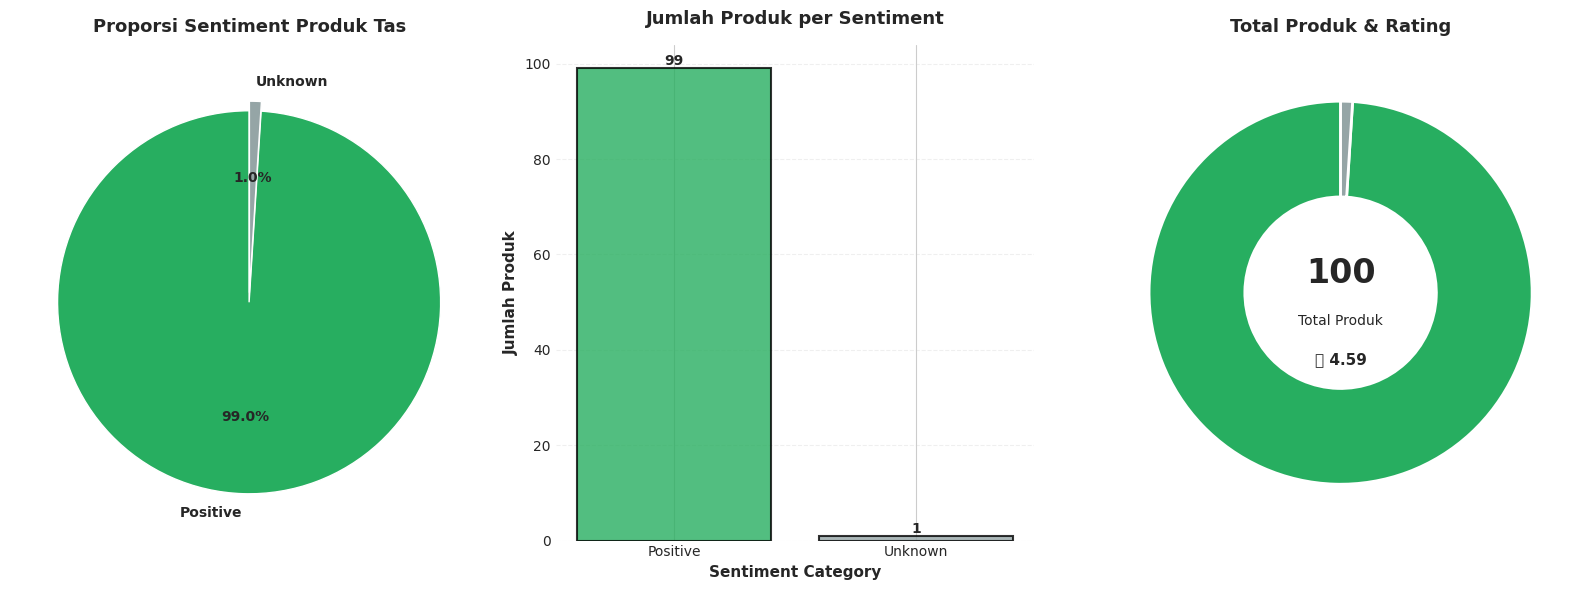

✅ Visualisasi 1 selesai!

📊 Membuat Visualisasi 2: Sentiment by Bag Type...


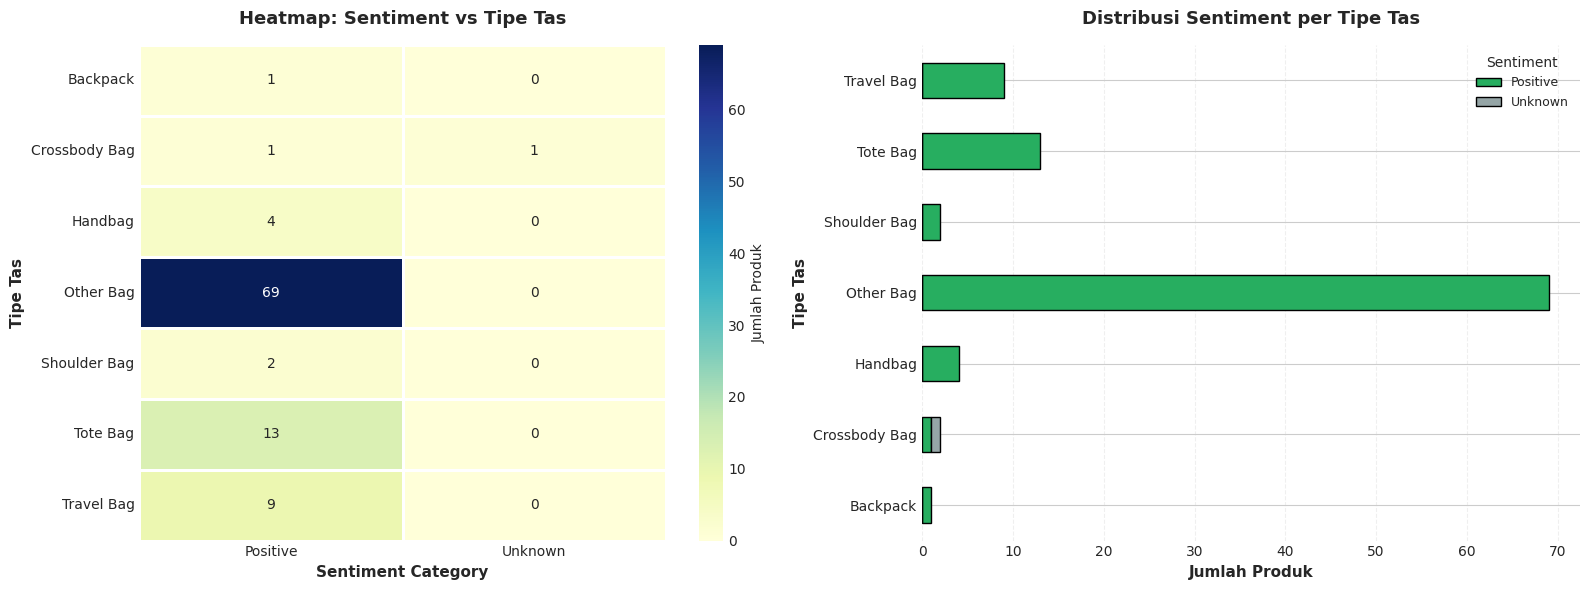

✅ Visualisasi 2 selesai!

📊 Membuat Visualisasi 3: Rating Analysis & Price...


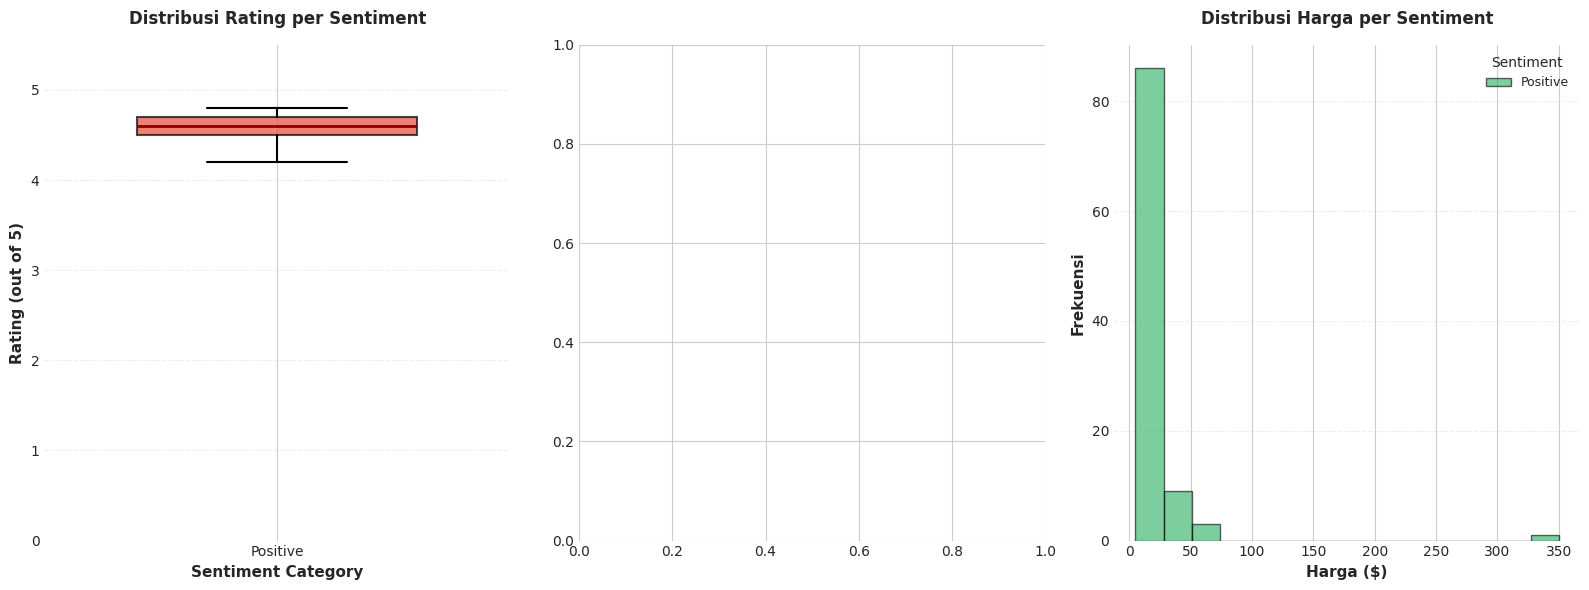

✅ Visualisasi 3 selesai!

📊 Membuat Visualisasi 4: Brand Analysis & WordCloud...


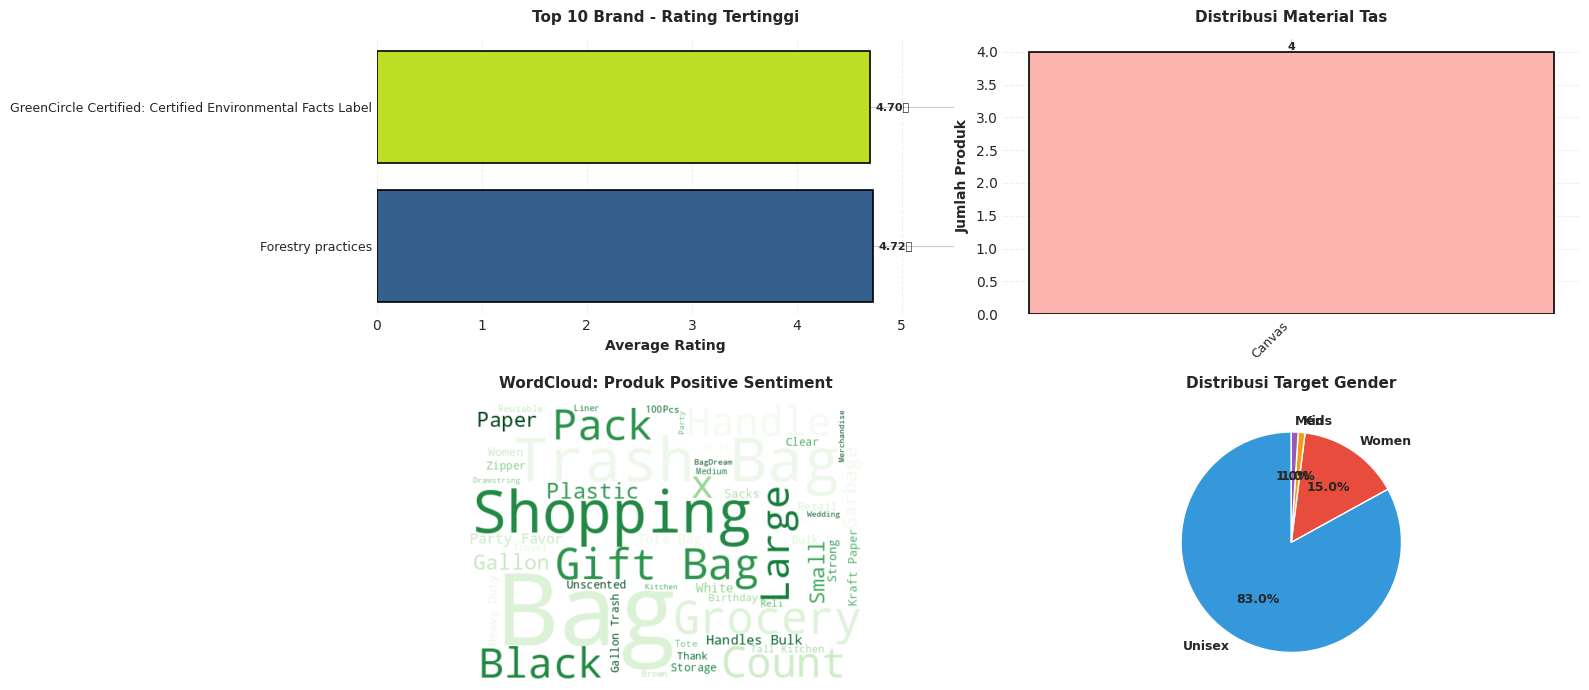

✅ Visualisasi 4 selesai!

STATISTIK SENTIMENT ANALYSIS

📊 OVERVIEW:
   Total Produk Dianalisis: 100
   Produk dengan Rating: 99
   Average Rating: 4.59 ⭐
   Median Rating: 4.60 ⭐
   Rating Tertinggi: 4.80 ⭐
   Rating Terendah: 4.00 ⭐

📈 SENTIMENT BREAKDOWN:
   Positive  :   99 produk ( 99.0%)
   Neutral   :    0 produk (  0.0%)
   Negative  :    0 produk (  0.0%)
   Unknown   :    1 produk (  1.0%)

💬 REVIEW & ENGAGEMENT:
   Total Reviews: 0
   Avg Reviews per Product: 0.0
   Produk dengan Prime: 0

💰 HARGA:
   Harga Rata-rata: $22.70
   Harga Median: $19.00
   Harga Termahal: $350.00
   Harga Termurah: $5.00

👜 TOP 5 TIPE TAS:
   Other Bag: 69 produk
   Tote Bag: 13 produk
   Travel Bag: 9 produk
   Handbag: 4 produk
   Crossbody Bag: 2 produk

🏷️ TOP 5 BRAND:
   Forestry practices: 4 produk
   GreenCircle Certified: Certified Environmental Facts Label: 2 produk
   Amazon's Choice: Overall Pick: 1 produk

✅ SENTIMENT ANALYSIS SELESAI!

💾 File hasil disimpan:
   📄 sentiment_analysis_ba

In [15]:
# Install library yang diperlukan
!pip install textblob matplotlib seaborn wordcloud -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from wordcloud import WordCloud
import warnings
import glob
import os
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*60)
print("SENTIMENT ANALYSIS - AMAZON BAGS")
print("="*60)

# ============================================
# LOAD DATA - AUTO DETECT FILE
# ============================================
csv_files = glob.glob('amazon_bags_*.csv')

if len(csv_files) > 0:
    csv_file = max(csv_files, key=os.path.getctime)
    print(f"✅ File ditemukan: {csv_file}")
    df = pd.read_csv(csv_file)
else:
    print("⚠️ File tidak ditemukan. Silakan upload file CSV:")
    from google.colab import files
    uploaded = files.upload()
    csv_file = list(uploaded.keys())[0]
    df = pd.read_csv(csv_file)

print(f"\n✅ Data berhasil dimuat!")
print(f"Total data: {len(df)}")
print("\nPreview 5 data pertama:")
print(df.head())

# ============================================
# DATA PREPROCESSING & SENTIMENT ANALYSIS
# ============================================

def extract_rating_value(rating_text):
    """Extract numeric rating dari text"""
    if pd.isna(rating_text) or rating_text == 'N/A':
        return None
    try:
        rating_str = str(rating_text).replace('out of 5 stars', '').strip()
        match = re.search(r'(\d+\.?\d*)', rating_str)
        if match:
            return float(match.group(1))
    except:
        return None
    return None

def get_sentiment_from_rating(rating):
    """Tentukan sentiment berdasarkan rating"""
    if pd.isna(rating):
        return 'Unknown'
    elif rating >= 4.0:
        return 'Positive'
    elif rating >= 3.0:
        return 'Neutral'
    else:
        return 'Negative'

def analyze_text_sentiment(text):
    """Analisis sentiment dari text menggunakan TextBlob"""
    if pd.isna(text) or text == 'N/A':
        return 0
    try:
        blob = TextBlob(str(text))
        return blob.sentiment.polarity
    except:
        return 0

def clean_review_count(count):
    """Bersihkan review count jadi numeric"""
    if pd.isna(count) or count == '0' or count == 'N/A':
        return 0
    try:
        count_str = str(count).replace(',', '').replace('+', '').replace('(', '').replace(')', '')
        match = re.search(r'(\d+)', count_str)
        if match:
            return int(match.group(1))
    except:
        return 0
    return 0

def clean_price(price):
    """Bersihkan price jadi numeric"""
    if pd.isna(price) or price == 'N/A':
        return None
    try:
        price_str = str(price).replace('$', '').replace(',', '').strip()
        match = re.search(r'(\d+\.?\d*)', price_str)
        if match:
            return float(match.group(1))
    except:
        return None
    return None

# Proses semua data
print("\n" + "="*60)
print("PROCESSING DATA...")
print("="*60)

df['rating_numeric'] = df['rating'].apply(extract_rating_value)
df['sentiment_category'] = df['rating_numeric'].apply(get_sentiment_from_rating)
df['text_sentiment_score'] = df['product_name'].apply(analyze_text_sentiment)
df['review_count_numeric'] = df['review_count'].apply(clean_review_count)
df['price_numeric'] = df['current_price'].apply(clean_price)

print("✅ Data processing selesai!")
print("\n📊 Distribusi Sentiment:")
sentiment_dist = df['sentiment_category'].value_counts()
for sentiment, count in sentiment_dist.items():
    percentage = (count / len(df)) * 100
    print(f"   {sentiment:10s}: {count:3d} produk ({percentage:5.1f}%)")

# ============================================
# VISUALISASI 1: Distribusi Sentiment Overview
# ============================================
print("\n📊 Membuat Visualisasi 1: Distribusi Sentiment Overview...")

fig = plt.figure(figsize=(16, 6))
sentiment_counts = df['sentiment_category'].value_counts()
colors = {'Positive': '#27ae60', 'Neutral': '#f39c12', 'Negative': '#e74c3c', 'Unknown': '#95a5a6'}
colors_list = [colors.get(x, '#95a5a6') for x in sentiment_counts.index]

# Pie Chart
ax1 = plt.subplot(1, 3, 1)
wedges, texts, autotexts = plt.pie(sentiment_counts.values,
                                     labels=sentiment_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors_list,
                                     startangle=90,
                                     textprops={'fontsize': 10, 'weight': 'bold'},
                                     explode=[0.05 if x == sentiment_counts.index[0] else 0
                                             for x in sentiment_counts.index])
plt.title('Proporsi Sentiment Produk Tas', fontsize=13, fontweight='bold', pad=15)

# Bar Chart
ax2 = plt.subplot(1, 3, 2)
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors_list,
               edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Jumlah Produk per Sentiment', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('Sentiment Category', fontsize=11, fontweight='bold')
plt.ylabel('Jumlah Produk', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# Donut Chart dengan statistik
ax3 = plt.subplot(1, 3, 3)
total_reviews = df['review_count_numeric'].sum()
avg_rating = df['rating_numeric'].mean() if df['rating_numeric'].notna().any() else 0

wedges, texts = plt.pie(sentiment_counts.values,
                        colors=colors_list,
                        startangle=90,
                        wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2))

# Tambahkan text di tengah donut
plt.text(0, 0.1, f'{len(df)}', ha='center', va='center', fontsize=24, fontweight='bold')
plt.text(0, -0.15, 'Total Produk', ha='center', va='center', fontsize=10)
if avg_rating > 0:
    plt.text(0, -0.35, f'⭐ {avg_rating:.2f}', ha='center', va='center', fontsize=11, fontweight='bold')

plt.title('Total Produk & Rating', fontsize=13, fontweight='bold', pad=15)

plt.tight_layout()
plt.savefig('1_sentiment_overview.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualisasi 1 selesai!")

# ============================================
# VISUALISASI 2: Sentiment by Bag Type
# ============================================
print("\n📊 Membuat Visualisasi 2: Sentiment by Bag Type...")

fig = plt.figure(figsize=(16, 6))

# Sentiment distribution per bag type
if 'bag_type' in df.columns:
    sentiment_by_type = pd.crosstab(df['bag_type'], df['sentiment_category'])

    # Heatmap
    ax1 = plt.subplot(1, 2, 1)
    sns.heatmap(sentiment_by_type, annot=True, fmt='d', cmap='YlGnBu',
                cbar_kws={'label': 'Jumlah Produk'}, linewidths=1, linecolor='white')
    plt.title('Heatmap: Sentiment vs Tipe Tas', fontsize=13, fontweight='bold', pad=15)
    plt.xlabel('Sentiment Category', fontsize=11, fontweight='bold')
    plt.ylabel('Tipe Tas', fontsize=11, fontweight='bold')
    plt.xticks(rotation=0)

    # Stacked bar chart
    ax2 = plt.subplot(1, 2, 2)
    sentiment_by_type.plot(kind='barh', stacked=True,
                          color=[colors.get(col, '#95a5a6') for col in sentiment_by_type.columns],
                          edgecolor='black', linewidth=1, ax=ax2)

    plt.title('Distribusi Sentiment per Tipe Tas', fontsize=13, fontweight='bold', pad=15)
    plt.xlabel('Jumlah Produk', fontsize=11, fontweight='bold')
    plt.ylabel('Tipe Tas', fontsize=11, fontweight='bold')
    plt.legend(title='Sentiment', title_fontsize=10, fontsize=9, loc='best')
    plt.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('2_sentiment_by_bagtype.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualisasi 2 selesai!")

# ============================================
# VISUALISASI 3: Rating Analysis & Price
# ============================================
print("\n📊 Membuat Visualisasi 3: Rating Analysis & Price...")

fig = plt.figure(figsize=(16, 6))

# Box plot rating by sentiment
ax1 = plt.subplot(1, 3, 1)
df_box = df[df['rating_numeric'].notna()].copy()
sentiment_order = ['Negative', 'Neutral', 'Positive']
box_colors = [colors.get(s, '#95a5a6') for s in sentiment_order]

box_data = [df_box[df_box['sentiment_category'] == s]['rating_numeric'].values
            for s in sentiment_order if s in df_box['sentiment_category'].values]
box_labels = [s for s in sentiment_order if s in df_box['sentiment_category'].values]

if len(box_data) > 0:
    bp = plt.boxplot(box_data, labels=box_labels, patch_artist=True,
                     widths=0.6, showfliers=False)
    for patch, color in zip(bp['boxes'], box_colors[:len(box_data)]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
        patch.set_edgecolor('black')
        patch.set_linewidth(1.5)

    for whisker in bp['whiskers']:
        whisker.set(linewidth=1.5, color='black')
    for cap in bp['caps']:
        cap.set(linewidth=1.5, color='black')
    for median in bp['medians']:
        median.set(linewidth=2, color='darkred')

    plt.ylabel('Rating (out of 5)', fontsize=11, fontweight='bold')
    plt.xlabel('Sentiment Category', fontsize=11, fontweight='bold')
    plt.title('Distribusi Rating per Sentiment', fontsize=12, fontweight='bold', pad=15)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.ylim(0, 5.5)

# Scatter: Rating vs Review Count
ax2 = plt.subplot(1, 3, 2)
df_scatter = df[(df['rating_numeric'].notna()) & (df['review_count_numeric'] > 0)].copy()

if len(df_scatter) > 0:
    for sentiment in ['Positive', 'Neutral', 'Negative']:
        if sentiment in df_scatter['sentiment_category'].values:
            mask = df_scatter['sentiment_category'] == sentiment
            plt.scatter(df_scatter[mask]['rating_numeric'],
                       df_scatter[mask]['review_count_numeric'],
                       c=colors[sentiment], label=sentiment, s=60, alpha=0.6,
                       edgecolors='black', linewidth=0.5)

    plt.xlabel('Rating Produk', fontsize=11, fontweight='bold')
    plt.ylabel('Jumlah Review', fontsize=11, fontweight='bold')
    plt.title('Rating vs Review Count', fontsize=12, fontweight='bold', pad=15)
    plt.legend(title='Sentiment', fontsize=9, title_fontsize=10)
    plt.grid(True, alpha=0.3, linestyle='--')

# Price distribution by sentiment
ax3 = plt.subplot(1, 3, 3)
df_price = df[(df['price_numeric'].notna()) & (df['price_numeric'] > 0) & (df['price_numeric'] < 500)].copy()

if len(df_price) > 0:
    for sentiment in ['Positive', 'Neutral', 'Negative']:
        if sentiment in df_price['sentiment_category'].values:
            prices = df_price[df_price['sentiment_category'] == sentiment]['price_numeric']
            plt.hist(prices, bins=15, alpha=0.6, label=sentiment,
                    color=colors[sentiment], edgecolor='black', linewidth=1)

    plt.xlabel('Harga ($)', fontsize=11, fontweight='bold')
    plt.ylabel('Frekuensi', fontsize=11, fontweight='bold')
    plt.title('Distribusi Harga per Sentiment', fontsize=12, fontweight='bold', pad=15)
    plt.legend(title='Sentiment', fontsize=9, title_fontsize=10)
    plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('3_rating_price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualisasi 3 selesai!")

# ============================================
# VISUALISASI 4: Brand Analysis & WordCloud
# ============================================
print("\n📊 Membuat Visualisasi 4: Brand Analysis & WordCloud...")

fig = plt.figure(figsize=(16, 7))

# Top 10 Brand by Average Rating
ax1 = plt.subplot(2, 2, 1)
brand_stats = df[df['rating_numeric'].notna()].groupby('brand').agg({
    'rating_numeric': ['mean', 'count']
}).reset_index()
brand_stats.columns = ['brand', 'avg_rating', 'count']
brand_stats = brand_stats[brand_stats['count'] >= 2]

if len(brand_stats) > 0:
    top_brands = brand_stats.nlargest(10, 'avg_rating')
    colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_brands)))
    bars = plt.barh(range(len(top_brands)), top_brands['avg_rating'],
                    color=colors_gradient, edgecolor='black', linewidth=1.2)
    plt.yticks(range(len(top_brands)), top_brands['brand'], fontsize=9)
    plt.xlabel('Average Rating', fontsize=10, fontweight='bold')
    plt.title('Top 10 Brand - Rating Tertinggi', fontsize=11, fontweight='bold', pad=12)
    plt.xlim(0, 5.5)
    plt.grid(axis='x', alpha=0.3, linestyle='--')

    for i, (bar, rating) in enumerate(zip(bars, top_brands['avg_rating'])):
        plt.text(rating + 0.05, bar.get_y() + bar.get_height()/2.,
                 f'{rating:.2f}⭐',
                 ha='left', va='center', fontweight='bold', fontsize=8)

# Material distribution
ax2 = plt.subplot(2, 2, 2)
if 'material' in df.columns:
    material_counts = df['material'].value_counts().head(8)
    colors_mat = plt.cm.Pastel1(np.linspace(0, 1, len(material_counts)))
    bars = plt.bar(range(len(material_counts)), material_counts.values,
                   color=colors_mat, edgecolor='black', linewidth=1.2)
    plt.xticks(range(len(material_counts)), material_counts.index, rotation=45, ha='right', fontsize=9)
    plt.ylabel('Jumlah Produk', fontsize=10, fontweight='bold')
    plt.title('Distribusi Material Tas', fontsize=11, fontweight='bold', pad=12)
    plt.grid(axis='y', alpha=0.3, linestyle='--')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom', fontweight='bold', fontsize=8)

# WordCloud - Positive Products
ax3 = plt.subplot(2, 2, 3)
positive_products = df[df['sentiment_category'] == 'Positive']['product_name'].dropna()

if len(positive_products) > 0:
    text = ' '.join(positive_products.astype(str))
    wordcloud = WordCloud(width=500, height=350,
                         background_color='white',
                         colormap='Greens',
                         max_words=50,
                         relative_scaling=0.5,
                         min_font_size=8).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('WordCloud: Produk Positive Sentiment', fontsize=11, fontweight='bold', pad=12)
else:
    plt.text(0.5, 0.5, 'Tidak ada data positive', ha='center', va='center', fontsize=11)

plt.axis('off')

# Gender distribution pie
ax4 = plt.subplot(2, 2, 4)
if 'gender' in df.columns:
    gender_counts = df['gender'].value_counts()
    colors_gender = ['#3498db', '#e74c3c', '#f39c12', '#9b59b6'][:len(gender_counts)]
    plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
            colors=colors_gender, startangle=90,
            textprops={'fontsize': 9, 'weight': 'bold'})
    plt.title('Distribusi Target Gender', fontsize=11, fontweight='bold', pad=12)

plt.tight_layout()
plt.savefig('4_brand_material_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualisasi 4 selesai!")

# ============================================
# STATISTIK AKHIR
# ============================================
print("\n" + "="*60)
print("STATISTIK SENTIMENT ANALYSIS")
print("="*60)

print(f"\n📊 OVERVIEW:")
print(f"   Total Produk Dianalisis: {len(df)}")
print(f"   Produk dengan Rating: {df['rating_numeric'].notna().sum()}")

if df['rating_numeric'].notna().any():
    print(f"   Average Rating: {df['rating_numeric'].mean():.2f} ⭐")
    print(f"   Median Rating: {df['rating_numeric'].median():.2f} ⭐")
    print(f"   Rating Tertinggi: {df['rating_numeric'].max():.2f} ⭐")
    print(f"   Rating Terendah: {df['rating_numeric'].min():.2f} ⭐")

print(f"\n📈 SENTIMENT BREAKDOWN:")
for sentiment in ['Positive', 'Neutral', 'Negative', 'Unknown']:
    count = len(df[df['sentiment_category'] == sentiment])
    percentage = (count / len(df)) * 100
    print(f"   {sentiment:10s}: {count:4d} produk ({percentage:5.1f}%)")

print(f"\n💬 REVIEW & ENGAGEMENT:")
print(f"   Total Reviews: {df['review_count_numeric'].sum():,}")
print(f"   Avg Reviews per Product: {df['review_count_numeric'].mean():.1f}")
print(f"   Produk dengan Prime: {len(df[df['prime_eligible'] == 'Yes'])}")

if df['price_numeric'].notna().any():
    print(f"\n💰 HARGA:")
    print(f"   Harga Rata-rata: ${df['price_numeric'].mean():.2f}")
    print(f"   Harga Median: ${df['price_numeric'].median():.2f}")
    print(f"   Harga Termahal: ${df['price_numeric'].max():.2f}")
    print(f"   Harga Termurah: ${df['price_numeric'].min():.2f}")

if 'bag_type' in df.columns:
    print(f"\n👜 TOP 5 TIPE TAS:")
    for bag_type, count in df['bag_type'].value_counts().head(5).items():
        print(f"   {bag_type}: {count} produk")

if 'brand' in df.columns:
    print(f"\n🏷️ TOP 5 BRAND:")
    for brand, count in df['brand'].value_counts().head(5).items():
        print(f"   {brand}: {count} produk")

# Simpan hasil analysis
output_file = 'sentiment_analysis_bags_results.csv'
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print("\n" + "="*60)
print("✅ SENTIMENT ANALYSIS SELESAI!")
print("="*60)
print(f"\n💾 File hasil disimpan:")
print(f"   📄 {output_file}")
print(f"   🖼️ 1_sentiment_overview.png")
print(f"   🖼️ 2_sentiment_by_bagtype.png")
print(f"   🖼️ 3_rating_price_analysis.png")
print(f"   🖼️ 4_brand_material_analysis.png")
print("\n🎉 Semua visualisasi berhasil dibuat tanpa error!")
print("="*60)

SCREAPING WEB AMAZON 100 DATA KATEGORY **(MAINAN/TOYS)**

In [16]:
# Install library
!pip install requests beautifulsoup4 pandas lxml fake-useragent -q

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from datetime import datetime
from google.colab import files
from fake_useragent import UserAgent
import random

ua = UserAgent()

def get_headers():
    """Generate random headers"""
    return {
        'User-Agent': ua.random,
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate',
        'Connection': 'keep-alive',
        'Upgrade-Insecure-Requests': '1'
    }

def scrape_amazon_toys(max_products=100):
    """Scrape produk mainan dari Amazon"""
    products = []

    # URL search toys di Amazon
    base_url = "https://www.amazon.com/s?k=toys"

    print("Mulai scraping produk mainan...")
    print("-" * 60)

    page = 1
    while len(products) < max_products:
        try:
            url = f"{base_url}&page={page}"

            print(f"Scraping halaman {page}...")

            response = requests.get(url, headers=get_headers(), timeout=15)

            if response.status_code != 200:
                print(f"Status: {response.status_code}, skip halaman ini")
                time.sleep(5)
                page += 1
                continue

            soup = BeautifulSoup(response.content, 'lxml')

            # Cari semua item produk
            items = soup.find_all('div', {'data-component-type': 's-search-result'})

            if not items:
                print("Tidak ada produk ditemukan")
                break

            for item in items:
                if len(products) >= max_products:
                    break

                try:
                    # ASIN (ID produk Amazon)
                    asin = item.get('data-asin', 'N/A')

                    # Nama produk
                    title_elem = item.find('h2', class_='a-size-mini')
                    if not title_elem:
                        title_elem = item.find('span', class_='a-size-medium')
                    if not title_elem:
                        title_elem = item.find('h2')
                    title = title_elem.text.strip() if title_elem else 'N/A'

                    # Tentukan kategori mainan
                    title_lower = title.lower()

                    if 'lego' in title_lower or 'building' in title_lower or 'blocks' in title_lower:
                        toy_category = 'Building & Construction'
                    elif 'doll' in title_lower or 'barbie' in title_lower:
                        toy_category = 'Dolls & Accessories'
                    elif 'car' in title_lower or 'vehicle' in title_lower or 'truck' in title_lower:
                        toy_category = 'Vehicles'
                    elif 'puzzle' in title_lower:
                        toy_category = 'Puzzles'
                    elif 'action figure' in title_lower or 'figure' in title_lower:
                        toy_category = 'Action Figures'
                    elif 'stuffed' in title_lower or 'plush' in title_lower or 'teddy' in title_lower:
                        toy_category = 'Plush & Stuffed Animals'
                    elif 'game' in title_lower or 'board game' in title_lower:
                        toy_category = 'Games & Board Games'
                    elif 'robot' in title_lower or 'remote control' in title_lower or 'rc' in title_lower:
                        toy_category = 'Electronic & RC Toys'
                    elif 'educational' in title_lower or 'learning' in title_lower or 'stem' in title_lower:
                        toy_category = 'Educational Toys'
                    elif 'outdoor' in title_lower or 'sports' in title_lower or 'ball' in title_lower:
                        toy_category = 'Outdoor & Sports Toys'
                    elif 'art' in title_lower or 'craft' in title_lower or 'drawing' in title_lower:
                        toy_category = 'Arts & Crafts'
                    elif 'pretend' in title_lower or 'play set' in title_lower or 'kitchen' in title_lower:
                        toy_category = 'Pretend Play'
                    elif 'baby' in title_lower or 'infant' in title_lower or 'toddler' in title_lower:
                        toy_category = 'Baby & Toddler Toys'
                    else:
                        toy_category = 'Other Toys'

                    # Harga
                    price_elem = item.find('span', class_='a-price-whole')
                    price = price_elem.text.strip() if price_elem else 'N/A'

                    # Rating
                    rating_elem = item.find('span', class_='a-icon-alt')
                    rating = rating_elem.text.strip() if rating_elem else 'N/A'

                    # Jumlah review
                    review_count_elem = item.find('span', class_='a-size-base s-underline-text')
                    review_count = review_count_elem.text.strip() if review_count_elem else '0'

                    # URL produk
                    link_elem = item.find('a', class_='a-link-normal')
                    product_url = 'https://www.amazon.com' + link_elem.get('href', '') if link_elem else 'N/A'

                    # Brand
                    brand_elem = item.find('span', class_='a-size-base-plus')
                    if not brand_elem:
                        brand_elem = item.find('h5', class_='s-line-clamp-1')
                    brand = brand_elem.text.strip() if brand_elem else 'N/A'

                    # Prime eligible
                    prime_elem = item.find('i', class_='a-icon-prime')
                    prime = 'Yes' if prime_elem else 'No'

                    # Harga original (jika ada diskon)
                    original_price_elem = item.find('span', class_='a-price a-text-price')
                    if original_price_elem:
                        original_price_span = original_price_elem.find('span', class_='a-offscreen')
                        original_price = original_price_span.text.strip() if original_price_span else price
                    else:
                        original_price = price

                    # Discount percentage
                    discount_elem = item.find('span', class_='a-letter-space')
                    discount = discount_elem.text.strip() if discount_elem else 'N/A'

                    # Availability
                    availability_elem = item.find('span', class_='a-color-base')
                    availability = availability_elem.text.strip() if availability_elem else 'Available'

                    # Delivery info
                    delivery_elem = item.find('span', class_='a-color-base a-text-bold')
                    delivery = delivery_elem.text.strip() if delivery_elem else 'N/A'

                    # Best seller badge
                    bestseller_elem = item.find('span', class_='a-badge-label')
                    bestseller = bestseller_elem.text.strip() if bestseller_elem else 'N/A'

                    # Age range (dari judul)
                    age_range = 'N/A'
                    if 'baby' in title_lower or '0-12 months' in title_lower or 'infant' in title_lower:
                        age_range = '0-1 years'
                    elif 'toddler' in title_lower or '1-3 years' in title_lower or '2-4 years' in title_lower:
                        age_range = '1-3 years'
                    elif '3-5 years' in title_lower or 'preschool' in title_lower:
                        age_range = '3-5 years'
                    elif '5-7 years' in title_lower or '6-8 years' in title_lower:
                        age_range = '5-8 years'
                    elif '8-12 years' in title_lower or '9-12 years' in title_lower:
                        age_range = '8-12 years'
                    elif 'teen' in title_lower or '12+' in title_lower or 'adult' in title_lower:
                        age_range = '12+ years'

                    # Gender target
                    gender_target = 'Unisex'
                    if 'girls' in title_lower or 'princess' in title_lower or 'barbie' in title_lower:
                        gender_target = 'Girls'
                    elif 'boys' in title_lower or 'superhero' in title_lower:
                        gender_target = 'Boys'

                    # Material (dari judul)
                    material = 'N/A'
                    if 'plastic' in title_lower:
                        material = 'Plastic'
                    elif 'wood' in title_lower or 'wooden' in title_lower:
                        material = 'Wood'
                    elif 'metal' in title_lower:
                        material = 'Metal'
                    elif 'plush' in title_lower or 'soft' in title_lower:
                        material = 'Plush/Fabric'
                    elif 'electronic' in title_lower or 'battery' in title_lower:
                        material = 'Electronic'

                    # Educational value
                    educational = 'No'
                    if any(word in title_lower for word in ['educational', 'learning', 'stem', 'science', 'math', 'alphabet']):
                        educational = 'Yes'

                    # Color (dari judul)
                    color = 'N/A'
                    colors_keywords = ['red', 'blue', 'green', 'yellow', 'pink', 'purple',
                                      'black', 'white', 'orange', 'multicolor', 'rainbow']
                    for col in colors_keywords:
                        if col in title_lower:
                            color = col.capitalize()
                            break

                    products.append({
                        'asin': asin,
                        'product_name': title,
                        'toy_category': toy_category,
                        'brand': brand,
                        'age_range': age_range,
                        'gender_target': gender_target,
                        'material': material,
                        'color': color,
                        'educational': educational,
                        'current_price': price,
                        'original_price': original_price,
                        'discount': discount,
                        'rating': rating,
                        'review_count': review_count,
                        'prime_eligible': prime,
                        'availability': availability,
                        'delivery_info': delivery,
                        'bestseller_badge': bestseller,
                        'product_url': product_url,
                        'category': 'Toys',
                        'scraped_at': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    })

                except Exception as e:
                    continue

            print(f"Progress: {len(products)}/{max_products}")

            if len(products) >= max_products:
                break

            page += 1
            # Random delay untuk menghindari block
            time.sleep(random.uniform(3, 6))

        except Exception as e:
            print(f"Error pada halaman {page}: {str(e)}")
            time.sleep(5)
            page += 1
            continue

    return products

# Jalankan scraping
print("="*60)
print("SCRAPING PRODUK MAINAN DARI AMAZON")
print("="*60)

toys_data = scrape_amazon_toys(max_products=100)

print(f"\n{'='*60}")
print(f"HASIL SCRAPING")
print(f"{'='*60}")
print(f"Total produk mainan terkumpul: {len(toys_data)}")

# Buat dataframe
df_toys = pd.DataFrame(toys_data)

# Simpan ke CSV
filename = f'amazon_toys_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
df_toys.to_csv(filename, index=False, encoding='utf-8-sig')

print(f"\nFile disimpan: {filename}")
print(f"\nPreview data (10 baris pertama):")
print(df_toys.head(10))

# Tampilkan SEMUA data dalam bentuk tabel
print("\n" + "="*60)
print("SEMUA DATA MAINAN (100 DATA):")
print("="*60)
display(df_toys)

print(f"\nInfo dataset:")
print(df_toys.info())

print(f"\n{'='*60}")
print("STATISTIK DATA")
print(f"{'='*60}")
print(f"Total produk: {len(df_toys)}")
print(f"Unique brands: {df_toys['brand'].nunique()}")
print(f"Produk dengan Prime: {len(df_toys[df_toys['prime_eligible'] == 'Yes'])}")
print(f"Produk dengan diskon: {len(df_toys[df_toys['discount'] != 'N/A'])}")
print(f"Mainan edukatif: {len(df_toys[df_toys['educational'] == 'Yes'])}")

print(f"\n🎮 Distribusi Kategori Mainan:")
print(df_toys['toy_category'].value_counts())

print(f"\n🏷️ Top 10 Brand:")
print(df_toys['brand'].value_counts().head(10))

print(f"\n👶 Distribusi Age Range:")
print(df_toys['age_range'].value_counts())

print(f"\n👧👦 Distribusi Gender Target:")
print(df_toys['gender_target'].value_counts())

print(f"\n🎨 Distribusi Material:")
print(df_toys['material'].value_counts())

print(f"\n🌈 Top 10 Warna:")
print(df_toys['color'].value_counts().head(10))

print(f"\n📚 Mainan Edukatif vs Non-Edukatif:")
print(df_toys['educational'].value_counts())

# Analisis tambahan
print(f"\n{'='*60}")
print("ANALISIS TAMBAHAN")
print(f"{'='*60}")

# Top category by review count
if df_toys['review_count'].notna().any():
    print(f"\n🔥 Kategori Paling Populer (berdasarkan total review):")
    # Konversi review count ke numeric
    df_toys['review_count_temp'] = df_toys['review_count'].apply(
        lambda x: int(str(x).replace(',', '').replace('+', '').replace('(', '').replace(')', ''))
        if str(x).replace(',', '').replace('+', '').replace('(', '').replace(')', '').isdigit()
        else 0
    )
    category_popularity = df_toys.groupby('toy_category')['review_count_temp'].sum().sort_values(ascending=False)
    print(category_popularity.head(5))

# Price range analysis
print(f"\n💰 Analisis Harga:")
df_toys['price_numeric_temp'] = df_toys['current_price'].apply(
    lambda x: float(str(x).replace('$', '').replace(',', ''))
    if str(x).replace('$', '').replace(',', '').replace('.', '', 1).isdigit()
    else None
)
valid_prices = df_toys[df_toys['price_numeric_temp'].notna()]
if len(valid_prices) > 0:
    print(f"   Harga rata-rata: ${valid_prices['price_numeric_temp'].mean():.2f}")
    print(f"   Harga termurah: ${valid_prices['price_numeric_temp'].min():.2f}")
    print(f"   Harga termahal: ${valid_prices['price_numeric_temp'].max():.2f}")

# Download file
files.download(filename)
print(f"\n✅ File {filename} sedang didownload...")
print("\n" + "="*60)
print("SCRAPING SELESAI! 🎉")
print("="*60)

SCRAPING PRODUK MAINAN DARI AMAZON
Mulai scraping produk mainan...
------------------------------------------------------------
Scraping halaman 1...
Progress: 48/100
Scraping halaman 2...
Progress: 96/100
Scraping halaman 3...
Status: 503, skip halaman ini
Scraping halaman 4...
Progress: 100/100

HASIL SCRAPING
Total produk mainan terkumpul: 100

File disimpan: amazon_toys_20251116_172435.csv

Preview data (10 baris pertama):
         asin                                       product_name  \
0  B0CP42LHNQ  Mr. Potato Head Mr. Potato Head Set with 13 Pa...   
1  B0C3528VHM  Play Doh Swirlin' Smoothies Toy Blender Playse...   
2  B0CPN7F49B  Fisher-Price Little People Toddler Toy Fire Tr...   
3  B0DMWKY1HH  Barbie Mermaid Toy Dolls with Surprise Magic B...   
4  B00P2SNIO0  Transformers Playskool Heroes Rescue Bots Ener...   
5  B074L8RV1F  Melissa & Doug Examine and Treat Pet Vet Play ...   
6  B0FPM3L14N  GobiDex 100PCS Magnetic Blocks Prtend Play Pla...   
7  B00000IZKX  The Origin

,asin,product_name,toy_category,brand,age_range,gender_target,material,color,educational,current_price,...,discount,rating,review_count,prime_eligible,availability,delivery_info,bestseller_badge,product_url,category,scraped_at
0,B0CP42LHNQ,Mr. Potato Head Mr. Potato Head Set with 13 Pa...,Arts & Crafts,N/A,1-3 years,Girls,N/A,N/A,No,7.,...,N/A,4.7 out of 5 stars,0,No,4.7,N/A,N/A,https://www.amazon.com/Potato-Parts-Pieces-Tod...,Toys,2025-11-16 17:24:17
1,B0C3528VHM,Play Doh Swirlin' Smoothies Toy Blender Playse...,Arts & Crafts,Amazon's Choice: Overall Pick,N/A,Girls,N/A,N/A,No,7.,...,,4.6 out of 5 stars,0,No,Amazon's Choice: Overall Pick,N/A,Overall Pick,https://www.amazon.com/Play-Doh-Swirlin-Smooth...,Toys,2025-11-16 17:24:17
2,B0CPN7F49B,Fisher-Price Little People Toddler Toy Fire Tr...,Vehicles,N/A,1-3 years,Unisex,N/A,N/A,No,10.,...,N/A,4.9 out of 5 stars,0,No,4.9,N/A,N/A,https://www.amazon.com/Fisher-Price-Toddler-Mu...,Toys,2025-11-16 17:24:17
3,B0DMWKY1HH,Barbie Mermaid Toy Dolls with Surprise Magic B...,Dolls & Accessories,N/A,N/A,Girls,N/A,Pink,No,13.,...,N/A,4.8 out of 5 stars,0,No,4.8,N/A,N/A,https://www.amazon.com/Barbie-Surprise-Bloomin...,Toys,2025-11-16 17:24:17
4,B00P2SNIO0,Transformers Playskool Heroes Rescue Bots Ener...,Action Figures,N/A,N/A,Unisex,N/A,N/A,No,8.,...,N/A,4.7 out of 5 stars,0,No,4.7,N/A,Limited time deal,https://www.amazon.com/Playskool-Transformers-...,Toys,2025-11-16 17:24:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,B0BXF8W8BM,"John Deere Bubble Lawn Mower for Toddlers, Bub...",Outdoor & Sports Toys,N/A,1-3 years,Girls,N/A,Red,No,25.,...,N/A,4.5 out of 5 stars,0,No,4.5,N/A,Limited time deal,https://www.amazon.com/John-Deere-Bubble-N-Go-...,Toys,2025-11-16 17:24:24
96,B0BRNY9HZB,Dan&Darci Kids Rock Painting Kit - Glow in The...,Electronic & RC Toys,N/A,N/A,Girls,N/A,N/A,No,14.,...,,4.7 out of 5 stars,0,No,4.7,N/A,N/A,https://www.amazon.com/Kids-Rock-Painting-Kit-...,Toys,2025-11-16 17:24:35
97,B00IUAAK2A,ThinkFun Gravity Maze - Falling Marble Logic G...,Building & Construction,N/A,N/A,Unisex,N/A,N/A,Yes,18.,...,,4.6 out of 5 stars,0,No,4.6,N/A,Limited time deal,https://www.amazon.com/ThinkFun-Gravity-Marble...,Toys,2025-11-16 17:24:35
98,B09T2CWRQ8,Dinosaur Toys for Kids 3-5: Wooden Stacking Mo...,Games & Board Games,N/A,N/A,Girls,Wood,N/A,No,12.,...,N/A,4.6 out of 5 stars,0,No,4.6,N/A,N/A,https://www.amazon.com/Dinosaur-Toys-Kids-3-5-...,Toys,2025-11-16 17:24:35



Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   asin              100 non-null    object
 1   product_name      100 non-null    object
 2   toy_category      100 non-null    object
 3   brand             100 non-null    object
 4   age_range         100 non-null    object
 5   gender_target     100 non-null    object
 6   material          100 non-null    object
 7   color             100 non-null    object
 8   educational       100 non-null    object
 9   current_price     100 non-null    object
 10  original_price    100 non-null    object
 11  discount          100 non-null    object
 12  rating            100 non-null    object
 13  review_count      100 non-null    object
 14  prime_eligible    100 non-null    object
 15  availability      100 non-null    object
 16  delivery_info     100 non-null    object
 17  be

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ File amazon_toys_20251116_172435.csv sedang didownload...

SCRAPING SELESAI! 🎉


SENTIMENT ANALYSIS WEB AMAZON KATEGORY **(MAINAN**/**TOYS**)

🎮 SENTIMENT ANALYSIS - AMAZON TOYS 🧸
✅ File ditemukan: amazon_toys_20251116_172435.csv

✅ Data berhasil dimuat!
Total data: 100

Preview 5 data pertama:
         asin                                       product_name  \
0  B0CP42LHNQ  Mr. Potato Head Mr. Potato Head Set with 13 Pa...   
1  B0C3528VHM  Play Doh Swirlin' Smoothies Toy Blender Playse...   
2  B0CPN7F49B  Fisher-Price Little People Toddler Toy Fire Tr...   
3  B0DMWKY1HH  Barbie Mermaid Toy Dolls with Surprise Magic B...   
4  B00P2SNIO0  Transformers Playskool Heroes Rescue Bots Ener...   

          toy_category                          brand  age_range  \
0        Arts & Crafts                            NaN  1-3 years   
1        Arts & Crafts  Amazon's Choice: Overall Pick        NaN   
2             Vehicles                            NaN  1-3 years   
3  Dolls & Accessories                            NaN        NaN   
4       Action Figures                            NaN        NaN   

  gender_target material colo

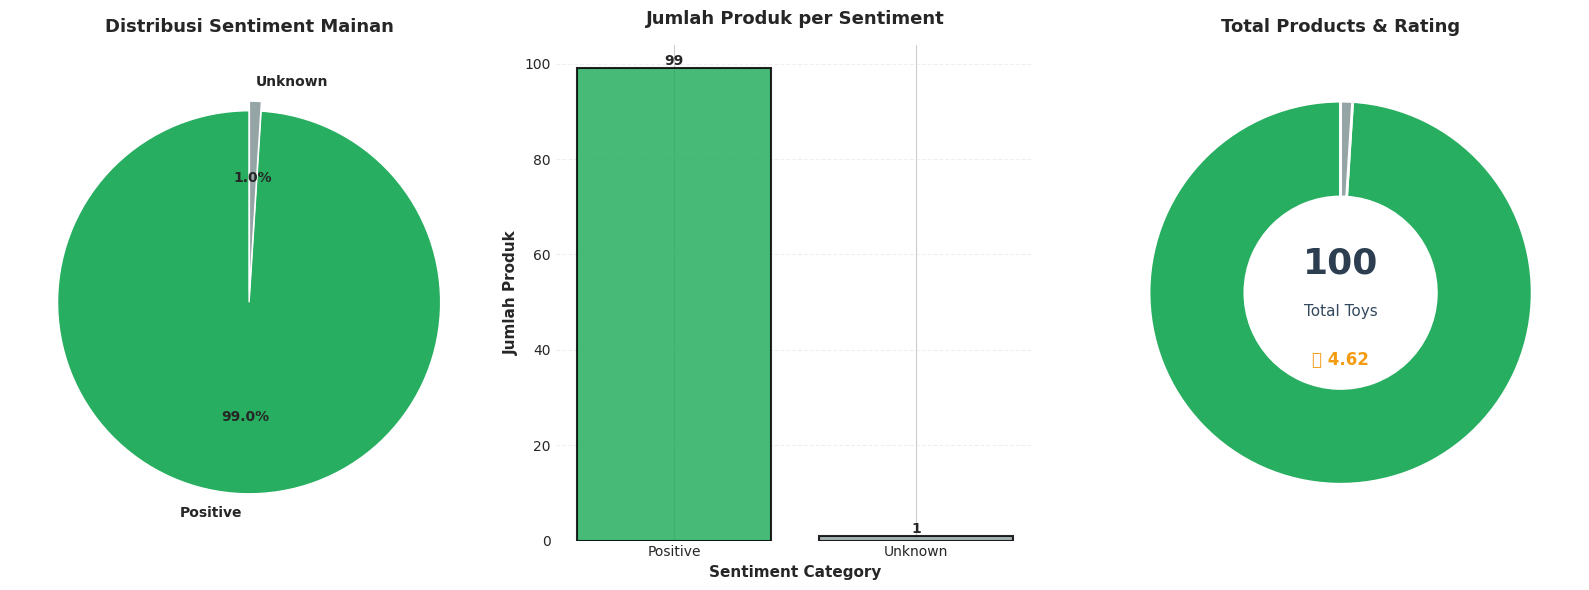

✅ Visualisasi 1 selesai!

📊 Membuat Visualisasi 2: Sentiment by Category & Age Range...


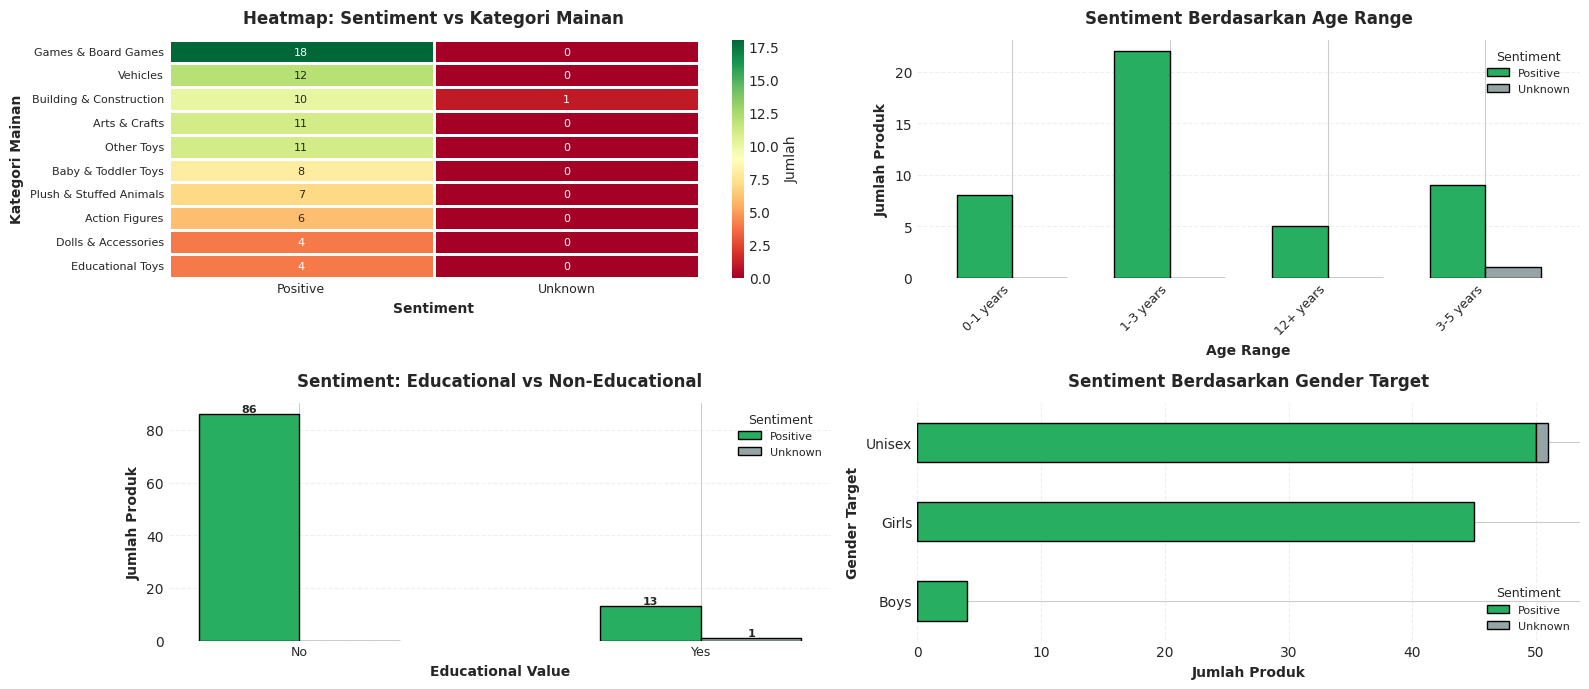

✅ Visualisasi 2 selesai!

📊 Membuat Visualisasi 3: Rating & Price Analysis...


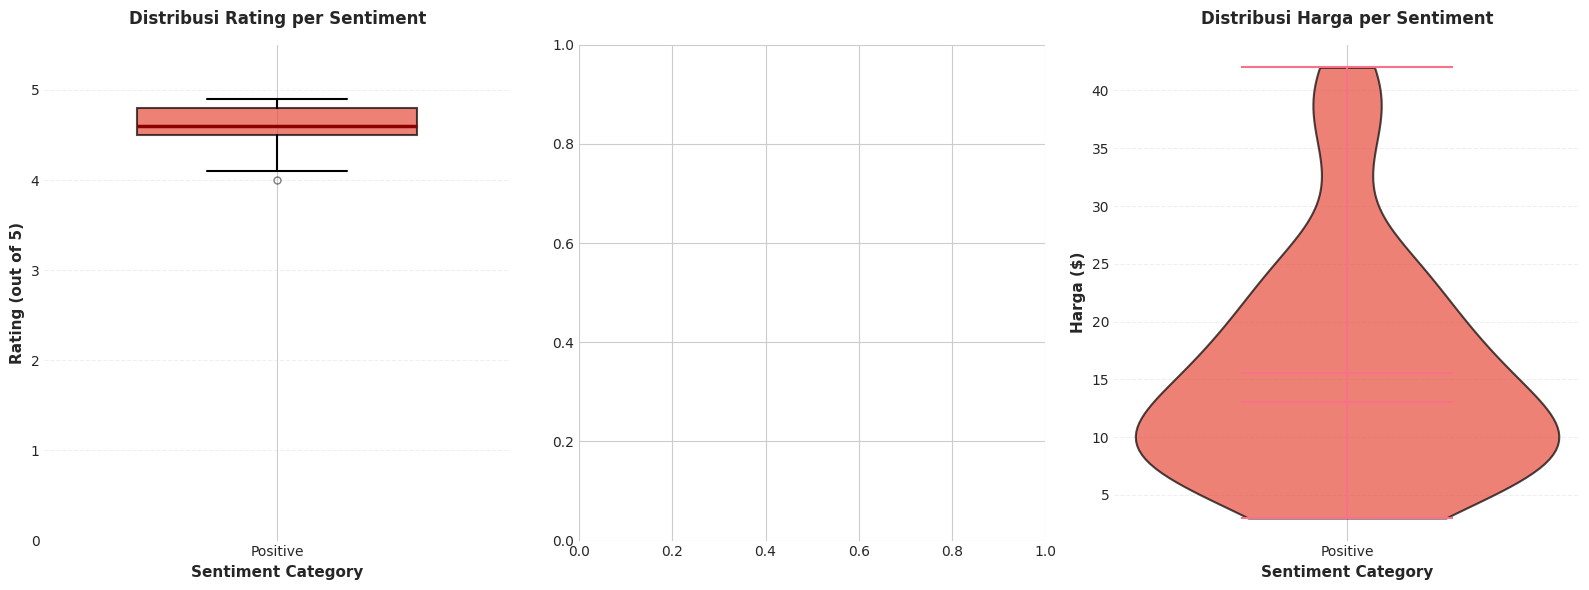

✅ Visualisasi 3 selesai!

📊 Membuat Visualisasi 4: Top Brands & WordCloud...


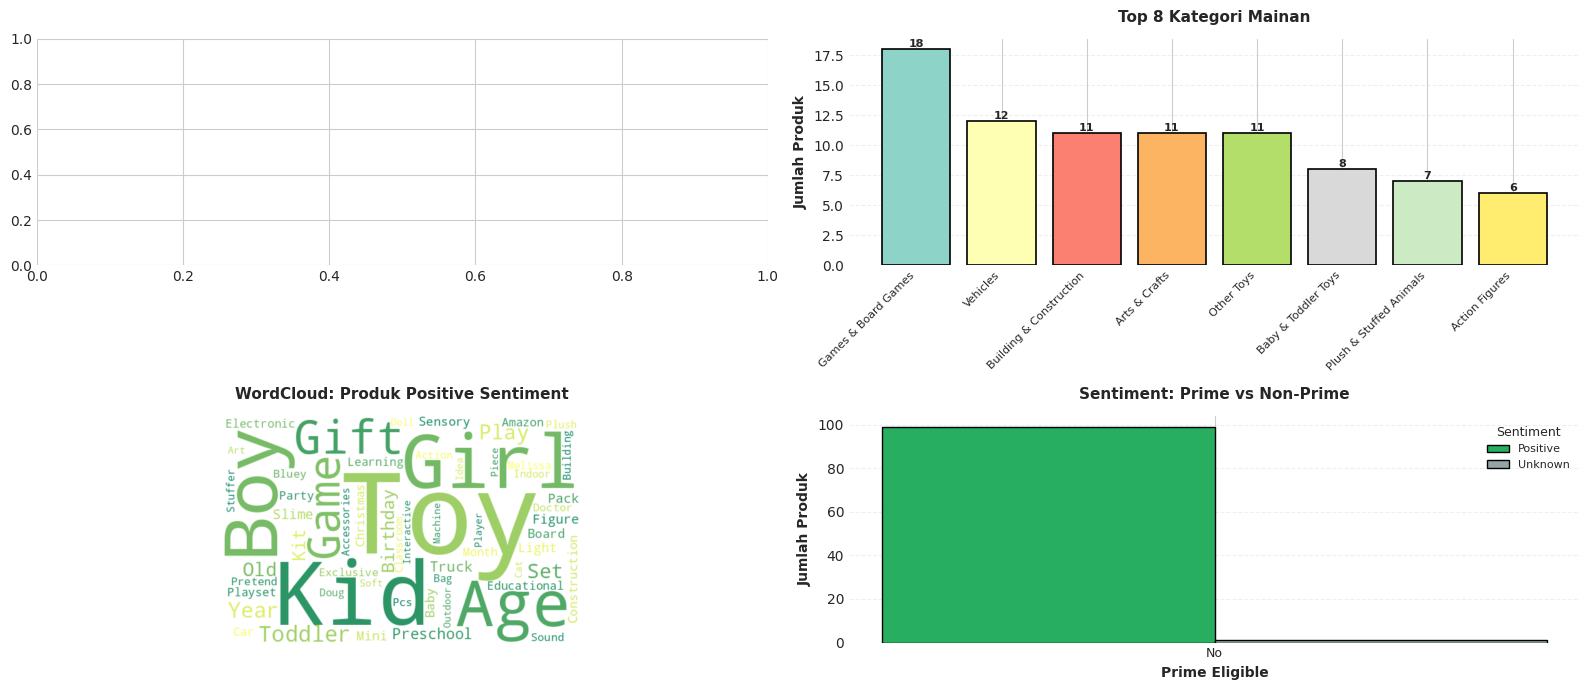

✅ Visualisasi 4 selesai!

📊 STATISTIK SENTIMENT ANALYSIS

🎮 OVERVIEW:
   Total Produk Mainan: 100
   Produk dengan Rating: 99
   Average Rating: 4.62 ⭐
   Median Rating: 4.60 ⭐
   Rating Tertinggi: 4.90 ⭐
   Rating Terendah: 4.00 ⭐

📈 SENTIMENT BREAKDOWN:
   Positive  :   99 produk ( 99.0%)
   Neutral   :    0 produk (  0.0%)
   Negative  :    0 produk (  0.0%)
   Unknown   :    1 produk (  1.0%)

💬 REVIEW & ENGAGEMENT:
   Total Reviews: 0
   Avg Reviews per Product: 0.0
   Produk dengan Prime: 0 (0.0%)

💰 HARGA:
   Harga Rata-rata: $15.60
   Harga Median: $13.00
   Harga Termahal: $42.00
   Harga Termurah: $3.00

🎯 TOP 5 KATEGORI MAINAN:
   Games & Board Games: 18 produk (18.0%)
   Vehicles: 12 produk (12.0%)
   Building & Construction: 11 produk (11.0%)
   Arts & Crafts: 11 produk (11.0%)
   Other Toys: 11 produk (11.0%)

🏷️ TOP 5 BRAND:
   Amazon's Choice: Overall Pick: 1 produk

📚 MAINAN EDUKATIF:
   Educational: 14 produk (14.0%)
   Non-Educational: 86 produk (86.0%)

👶 TOP 3 AGE 

In [17]:
# Install library yang diperlukan
!pip install textblob matplotlib seaborn wordcloud -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from wordcloud import WordCloud
import warnings
import glob
import os
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*60)
print("🎮 SENTIMENT ANALYSIS - AMAZON TOYS 🧸")
print("="*60)

# ============================================
# LOAD DATA - AUTO DETECT FILE
# ============================================
csv_files = glob.glob('amazon_toys_*.csv')

if len(csv_files) > 0:
    csv_file = max(csv_files, key=os.path.getctime)
    print(f"✅ File ditemukan: {csv_file}")
    df = pd.read_csv(csv_file)
else:
    print("⚠️ File tidak ditemukan. Silakan upload file CSV:")
    from google.colab import files
    uploaded = files.upload()
    csv_file = list(uploaded.keys())[0]
    df = pd.read_csv(csv_file)

print(f"\n✅ Data berhasil dimuat!")
print(f"Total data: {len(df)}")
print("\nPreview 5 data pertama:")
print(df.head())

# ============================================
# DATA PREPROCESSING & SENTIMENT ANALYSIS
# ============================================

def extract_rating_value(rating_text):
    """Extract numeric rating dari text"""
    if pd.isna(rating_text) or rating_text == 'N/A':
        return None
    try:
        rating_str = str(rating_text).replace('out of 5 stars', '').strip()
        match = re.search(r'(\d+\.?\d*)', rating_str)
        if match:
            return float(match.group(1))
    except:
        return None
    return None

def get_sentiment_from_rating(rating):
    """Tentukan sentiment berdasarkan rating"""
    if pd.isna(rating):
        return 'Unknown'
    elif rating >= 4.0:
        return 'Positive'
    elif rating >= 3.0:
        return 'Neutral'
    else:
        return 'Negative'

def analyze_text_sentiment(text):
    """Analisis sentiment dari text menggunakan TextBlob"""
    if pd.isna(text) or text == 'N/A':
        return 0
    try:
        blob = TextBlob(str(text))
        return blob.sentiment.polarity
    except:
        return 0

def clean_review_count(count):
    """Bersihkan review count jadi numeric"""
    if pd.isna(count) or count == '0' or count == 'N/A':
        return 0
    try:
        count_str = str(count).replace(',', '').replace('+', '').replace('(', '').replace(')', '')
        match = re.search(r'(\d+)', count_str)
        if match:
            return int(match.group(1))
    except:
        return 0
    return 0

def clean_price(price):
    """Bersihkan price jadi numeric"""
    if pd.isna(price) or price == 'N/A':
        return None
    try:
        price_str = str(price).replace('$', '').replace(',', '').strip()
        match = re.search(r'(\d+\.?\d*)', price_str)
        if match:
            return float(match.group(1))
    except:
        return None
    return None

# Proses semua data
print("\n" + "="*60)
print("PROCESSING DATA...")
print("="*60)

df['rating_numeric'] = df['rating'].apply(extract_rating_value)
df['sentiment_category'] = df['rating_numeric'].apply(get_sentiment_from_rating)
df['text_sentiment_score'] = df['product_name'].apply(analyze_text_sentiment)
df['review_count_numeric'] = df['review_count'].apply(clean_review_count)
df['price_numeric'] = df['current_price'].apply(clean_price)

print("✅ Data processing selesai!")
print("\n📊 Distribusi Sentiment:")
sentiment_dist = df['sentiment_category'].value_counts()
for sentiment, count in sentiment_dist.items():
    percentage = (count / len(df)) * 100
    print(f"   {sentiment:10s}: {count:3d} produk ({percentage:5.1f}%)")

# ============================================
# VISUALISASI 1: Sentiment Overview Dashboard
# ============================================
print("\n📊 Membuat Visualisasi 1: Sentiment Overview Dashboard...")

fig = plt.figure(figsize=(16, 6))
sentiment_counts = df['sentiment_category'].value_counts()
colors = {'Positive': '#27ae60', 'Neutral': '#f39c12', 'Negative': '#e74c3c', 'Unknown': '#95a5a6'}
colors_list = [colors.get(x, '#95a5a6') for x in sentiment_counts.index]

# Pie Chart
ax1 = plt.subplot(1, 3, 1)
wedges, texts, autotexts = plt.pie(sentiment_counts.values,
                                     labels=sentiment_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors_list,
                                     startangle=90,
                                     textprops={'fontsize': 10, 'weight': 'bold'},
                                     explode=[0.05 if x == sentiment_counts.index[0] else 0
                                             for x in sentiment_counts.index])
plt.title('Distribusi Sentiment Mainan', fontsize=13, fontweight='bold', pad=15)

# Bar Chart dengan gradient
ax2 = plt.subplot(1, 3, 2)
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors_list,
               edgecolor='black', linewidth=1.5, alpha=0.85)
plt.title('Jumlah Produk per Sentiment', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('Sentiment Category', fontsize=11, fontweight='bold')
plt.ylabel('Jumlah Produk', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# Donut Chart dengan Info
ax3 = plt.subplot(1, 3, 3)
total_reviews = df['review_count_numeric'].sum()
avg_rating = df['rating_numeric'].mean() if df['rating_numeric'].notna().any() else 0

wedges, texts = plt.pie(sentiment_counts.values,
                        colors=colors_list,
                        startangle=90,
                        wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2))

# Text di tengah donut
plt.text(0, 0.15, f'{len(df)}', ha='center', va='center', fontsize=26, fontweight='bold', color='#2c3e50')
plt.text(0, -0.1, 'Total Toys', ha='center', va='center', fontsize=11, color='#34495e')
if avg_rating > 0:
    plt.text(0, -0.35, f'⭐ {avg_rating:.2f}', ha='center', va='center', fontsize=12, fontweight='bold', color='#f39c12')

plt.title('Total Products & Rating', fontsize=13, fontweight='bold', pad=15)

plt.tight_layout()
plt.savefig('1_sentiment_overview_toys.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualisasi 1 selesai!")

# ============================================
# VISUALISASI 2: Sentiment by Toy Category & Age
# ============================================
print("\n📊 Membuat Visualisasi 2: Sentiment by Category & Age Range...")

fig = plt.figure(figsize=(16, 7))

# Sentiment by Toy Category - Heatmap
ax1 = plt.subplot(2, 2, 1)
if 'toy_category' in df.columns:
    sentiment_by_category = pd.crosstab(df['toy_category'], df['sentiment_category'])

    # Ambil top 10 category
    top_categories = df['toy_category'].value_counts().head(10).index
    sentiment_by_category_top = sentiment_by_category.loc[top_categories]

    sns.heatmap(sentiment_by_category_top, annot=True, fmt='d', cmap='RdYlGn',
                cbar_kws={'label': 'Jumlah'}, linewidths=1, linecolor='white',
                annot_kws={'fontsize': 8})
    plt.title('Heatmap: Sentiment vs Kategori Mainan', fontsize=12, fontweight='bold', pad=12)
    plt.xlabel('Sentiment', fontsize=10, fontweight='bold')
    plt.ylabel('Kategori Mainan', fontsize=10, fontweight='bold')
    plt.xticks(rotation=0, fontsize=9)
    plt.yticks(fontsize=8)

# Sentiment by Age Range
ax2 = plt.subplot(2, 2, 2)
if 'age_range' in df.columns:
    sentiment_by_age = pd.crosstab(df['age_range'], df['sentiment_category'])
    sentiment_by_age = sentiment_by_age[sentiment_by_age.sum(axis=1) > 0]  # Filter yang ada data

    sentiment_by_age.plot(kind='bar', stacked=False,
                         color=[colors.get(col, '#95a5a6') for col in sentiment_by_age.columns],
                         edgecolor='black', linewidth=1, ax=ax2, width=0.7)

    plt.title('Sentiment Berdasarkan Age Range', fontsize=12, fontweight='bold', pad=12)
    plt.xlabel('Age Range', fontsize=10, fontweight='bold')
    plt.ylabel('Jumlah Produk', fontsize=10, fontweight='bold')
    plt.legend(title='Sentiment', title_fontsize=9, fontsize=8, loc='best')
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.grid(axis='y', alpha=0.3, linestyle='--')

# Educational vs Non-Educational
ax3 = plt.subplot(2, 2, 3)
if 'educational' in df.columns:
    edu_sentiment = pd.crosstab(df['educational'], df['sentiment_category'])

    x = np.arange(len(edu_sentiment.index))
    width = 0.25

    for i, sentiment in enumerate(edu_sentiment.columns):
        offset = width * (i - len(edu_sentiment.columns)/2 + 0.5)
        bars = plt.bar(x + offset, edu_sentiment[sentiment], width,
                      label=sentiment, color=colors.get(sentiment, '#95a5a6'),
                      edgecolor='black', linewidth=1)

        for bar in bars:
            height = bar.get_height()
            if height > 0:
                plt.text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}', ha='center', va='bottom', fontsize=8, fontweight='bold')

    plt.xlabel('Educational Value', fontsize=10, fontweight='bold')
    plt.ylabel('Jumlah Produk', fontsize=10, fontweight='bold')
    plt.title('Sentiment: Educational vs Non-Educational', fontsize=12, fontweight='bold', pad=12)
    plt.xticks(x, edu_sentiment.index, fontsize=9)
    plt.legend(title='Sentiment', fontsize=8, title_fontsize=9)
    plt.grid(axis='y', alpha=0.3, linestyle='--')

# Gender Target Distribution
ax4 = plt.subplot(2, 2, 4)
if 'gender_target' in df.columns:
    gender_sentiment = pd.crosstab(df['gender_target'], df['sentiment_category'])

    gender_sentiment.plot(kind='barh', stacked=True,
                         color=[colors.get(col, '#95a5a6') for col in gender_sentiment.columns],
                         edgecolor='black', linewidth=1, ax=ax4)

    plt.title('Sentiment Berdasarkan Gender Target', fontsize=12, fontweight='bold', pad=12)
    plt.xlabel('Jumlah Produk', fontsize=10, fontweight='bold')
    plt.ylabel('Gender Target', fontsize=10, fontweight='bold')
    plt.legend(title='Sentiment', fontsize=8, title_fontsize=9, loc='best')
    plt.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('2_sentiment_by_category_age.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualisasi 2 selesai!")

# ============================================
# VISUALISASI 3: Rating & Price Analysis
# ============================================
print("\n📊 Membuat Visualisasi 3: Rating & Price Analysis...")

fig = plt.figure(figsize=(16, 6))

# Box plot rating by sentiment
ax1 = plt.subplot(1, 3, 1)
df_box = df[df['rating_numeric'].notna()].copy()
sentiment_order = ['Negative', 'Neutral', 'Positive']
box_colors = [colors.get(s, '#95a5a6') for s in sentiment_order]

box_data = [df_box[df_box['sentiment_category'] == s]['rating_numeric'].values
            for s in sentiment_order if s in df_box['sentiment_category'].values]
box_labels = [s for s in sentiment_order if s in df_box['sentiment_category'].values]

if len(box_data) > 0:
    bp = plt.boxplot(box_data, labels=box_labels, patch_artist=True,
                     widths=0.6, showfliers=True)
    for patch, color in zip(bp['boxes'], box_colors[:len(box_data)]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
        patch.set_edgecolor('black')
        patch.set_linewidth(1.5)

    for whisker in bp['whiskers']:
        whisker.set(linewidth=1.5, color='black')
    for cap in bp['caps']:
        cap.set(linewidth=1.5, color='black')
    for median in bp['medians']:
        median.set(linewidth=2.5, color='darkred')
    for flier in bp['fliers']:
        flier.set(marker='o', markersize=5, alpha=0.5)

    plt.ylabel('Rating (out of 5)', fontsize=11, fontweight='bold')
    plt.xlabel('Sentiment Category', fontsize=11, fontweight='bold')
    plt.title('Distribusi Rating per Sentiment', fontsize=12, fontweight='bold', pad=15)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.ylim(0, 5.5)

# Scatter: Rating vs Review Count
ax2 = plt.subplot(1, 3, 2)
df_scatter = df[(df['rating_numeric'].notna()) & (df['review_count_numeric'] > 0)].copy()

if len(df_scatter) > 0:
    for sentiment in ['Positive', 'Neutral', 'Negative']:
        if sentiment in df_scatter['sentiment_category'].values:
            mask = df_scatter['sentiment_category'] == sentiment
            plt.scatter(df_scatter[mask]['rating_numeric'],
                       df_scatter[mask]['review_count_numeric'],
                       c=colors[sentiment], label=sentiment, s=70, alpha=0.6,
                       edgecolors='black', linewidth=0.5)

    plt.xlabel('Rating Produk', fontsize=11, fontweight='bold')
    plt.ylabel('Jumlah Review', fontsize=11, fontweight='bold')
    plt.title('Korelasi Rating vs Review Count', fontsize=12, fontweight='bold', pad=15)
    plt.legend(title='Sentiment', fontsize=9, title_fontsize=10)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.yscale('log')  # Log scale untuk review count

# Price distribution by sentiment
ax3 = plt.subplot(1, 3, 3)
df_price = df[(df['price_numeric'].notna()) & (df['price_numeric'] > 0) & (df['price_numeric'] < 200)].copy()

if len(df_price) > 0:
    # Violin plot
    sentiment_list = []
    price_list = []

    for sentiment in ['Negative', 'Neutral', 'Positive']:
        if sentiment in df_price['sentiment_category'].values:
            prices = df_price[df_price['sentiment_category'] == sentiment]['price_numeric']
            sentiment_list.extend([sentiment] * len(prices))
            price_list.extend(prices)

    if len(sentiment_list) > 0:
        df_violin = pd.DataFrame({'Sentiment': sentiment_list, 'Price': price_list})

        parts = plt.violinplot([df_violin[df_violin['Sentiment'] == s]['Price'].values
                                for s in ['Negative', 'Neutral', 'Positive']
                                if s in df_violin['Sentiment'].values],
                               positions=range(len([s for s in ['Negative', 'Neutral', 'Positive']
                                                   if s in df_violin['Sentiment'].values])),
                               showmeans=True, showmedians=True, widths=0.7)

        # Color the violins
        for i, pc in enumerate(parts['bodies']):
            sentiment_name = ['Negative', 'Neutral', 'Positive'][i]
            pc.set_facecolor(colors.get(sentiment_name, '#95a5a6'))
            pc.set_alpha(0.7)
            pc.set_edgecolor('black')
            pc.set_linewidth(1.5)

        plt.xticks(range(len([s for s in ['Negative', 'Neutral', 'Positive']
                             if s in df_violin['Sentiment'].values])),
                  [s for s in ['Negative', 'Neutral', 'Positive']
                   if s in df_violin['Sentiment'].values])
        plt.ylabel('Harga ($)', fontsize=11, fontweight='bold')
        plt.xlabel('Sentiment Category', fontsize=11, fontweight='bold')
        plt.title('Distribusi Harga per Sentiment', fontsize=12, fontweight='bold', pad=15)
        plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('3_rating_price_analysis_toys.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualisasi 3 selesai!")

# ============================================
# VISUALISASI 4: Top Brands & WordCloud
# ============================================
print("\n📊 Membuat Visualisasi 4: Top Brands & WordCloud...")

fig = plt.figure(figsize=(16, 7))

# Top 10 Brand by Average Rating
ax1 = plt.subplot(2, 2, 1)
brand_stats = df[df['rating_numeric'].notna()].groupby('brand').agg({
    'rating_numeric': ['mean', 'count']
}).reset_index()
brand_stats.columns = ['brand', 'avg_rating', 'count']
brand_stats = brand_stats[brand_stats['count'] >= 2]

if len(brand_stats) > 0:
    top_brands = brand_stats.nlargest(10, 'avg_rating')
    colors_gradient = plt.cm.plasma(np.linspace(0.2, 0.9, len(top_brands)))
    bars = plt.barh(range(len(top_brands)), top_brands['avg_rating'],
                    color=colors_gradient, edgecolor='black', linewidth=1.2)
    plt.yticks(range(len(top_brands)), top_brands['brand'], fontsize=9)
    plt.xlabel('Average Rating', fontsize=10, fontweight='bold')
    plt.title('Top 10 Brand - Rating Tertinggi', fontsize=11, fontweight='bold', pad=12)
    plt.xlim(0, 5.5)
    plt.grid(axis='x', alpha=0.3, linestyle='--')

    for i, (bar, rating, count) in enumerate(zip(bars, top_brands['avg_rating'], top_brands['count'])):
        plt.text(rating + 0.05, bar.get_y() + bar.get_height()/2.,
                 f'{rating:.2f}⭐ ({count})',
                 ha='left', va='center', fontweight='bold', fontsize=8)

# Top Toy Categories
ax2 = plt.subplot(2, 2, 2)
if 'toy_category' in df.columns:
    category_counts = df['toy_category'].value_counts().head(8)
    colors_cat = plt.cm.Set3(np.linspace(0, 1, len(category_counts)))
    bars = plt.bar(range(len(category_counts)), category_counts.values,
                   color=colors_cat, edgecolor='black', linewidth=1.2)
    plt.xticks(range(len(category_counts)), category_counts.index, rotation=45, ha='right', fontsize=8)
    plt.ylabel('Jumlah Produk', fontsize=10, fontweight='bold')
    plt.title('Top 8 Kategori Mainan', fontsize=11, fontweight='bold', pad=12)
    plt.grid(axis='y', alpha=0.3, linestyle='--')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom', fontweight='bold', fontsize=8)

# WordCloud - Positive Products
ax3 = plt.subplot(2, 2, 3)
positive_products = df[df['sentiment_category'] == 'Positive']['product_name'].dropna()

if len(positive_products) > 0:
    text = ' '.join(positive_products.astype(str))
    wordcloud = WordCloud(width=550, height=350,
                         background_color='white',
                         colormap='summer',
                         max_words=60,
                         relative_scaling=0.5,
                         min_font_size=8,
                         collocations=False).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('WordCloud: Produk Positive Sentiment', fontsize=11, fontweight='bold', pad=12)
else:
    plt.text(0.5, 0.5, 'Tidak ada data positive', ha='center', va='center', fontsize=11)

plt.axis('off')

# Prime vs Non-Prime by Sentiment
ax4 = plt.subplot(2, 2, 4)
if 'prime_eligible' in df.columns:
    prime_sentiment = pd.crosstab(df['prime_eligible'], df['sentiment_category'])

    x = np.arange(len(prime_sentiment.index))
    width = 0.25

    for i, sentiment in enumerate(prime_sentiment.columns):
        offset = width * (i - len(prime_sentiment.columns)/2 + 0.5)
        bars = plt.bar(x + offset, prime_sentiment[sentiment], width,
                      label=sentiment, color=colors.get(sentiment, '#95a5a6'),
                      edgecolor='black', linewidth=1)

    plt.xlabel('Prime Eligible', fontsize=10, fontweight='bold')
    plt.ylabel('Jumlah Produk', fontsize=10, fontweight='bold')
    plt.title('Sentiment: Prime vs Non-Prime', fontsize=11, fontweight='bold', pad=12)
    plt.xticks(x, prime_sentiment.index, fontsize=9)
    plt.legend(title='Sentiment', fontsize=8, title_fontsize=9)
    plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('4_brands_categories_toys.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualisasi 4 selesai!")

# ============================================
# STATISTIK AKHIR
# ============================================
print("\n" + "="*60)
print("📊 STATISTIK SENTIMENT ANALYSIS")
print("="*60)

print(f"\n🎮 OVERVIEW:")
print(f"   Total Produk Mainan: {len(df)}")
print(f"   Produk dengan Rating: {df['rating_numeric'].notna().sum()}")

if df['rating_numeric'].notna().any():
    print(f"   Average Rating: {df['rating_numeric'].mean():.2f} ⭐")
    print(f"   Median Rating: {df['rating_numeric'].median():.2f} ⭐")
    print(f"   Rating Tertinggi: {df['rating_numeric'].max():.2f} ⭐")
    print(f"   Rating Terendah: {df['rating_numeric'].min():.2f} ⭐")

print(f"\n📈 SENTIMENT BREAKDOWN:")
for sentiment in ['Positive', 'Neutral', 'Negative', 'Unknown']:
    count = len(df[df['sentiment_category'] == sentiment])
    percentage = (count / len(df)) * 100
    print(f"   {sentiment:10s}: {count:4d} produk ({percentage:5.1f}%)")

print(f"\n💬 REVIEW & ENGAGEMENT:")
print(f"   Total Reviews: {df['review_count_numeric'].sum():,}")
print(f"   Avg Reviews per Product: {df['review_count_numeric'].mean():.1f}")
print(f"   Produk dengan Prime: {len(df[df['prime_eligible'] == 'Yes'])} ({len(df[df['prime_eligible'] == 'Yes'])/len(df)*100:.1f}%)")

if df['price_numeric'].notna().any():
    print(f"\n💰 HARGA:")
    valid_prices = df[df['price_numeric'].notna()]
    print(f"   Harga Rata-rata: ${valid_prices['price_numeric'].mean():.2f}")
    print(f"   Harga Median: ${valid_prices['price_numeric'].median():.2f}")
    print(f"   Harga Termahal: ${valid_prices['price_numeric'].max():.2f}")
    print(f"   Harga Termurah: ${valid_prices['price_numeric'].min():.2f}")

if 'toy_category' in df.columns:
    print(f"\n🎯 TOP 5 KATEGORI MAINAN:")
    for category, count in df['toy_category'].value_counts().head(5).items():
        percentage = (count / len(df)) * 100
        print(f"   {category}: {count} produk ({percentage:.1f}%)")

if 'brand' in df.columns:
    print(f"\n🏷️ TOP 5 BRAND:")
    for brand, count in df['brand'].value_counts().head(5).items():
        print(f"   {brand}: {count} produk")

if 'educational' in df.columns:
    edu_count = len(df[df['educational'] == 'Yes'])
    print(f"\n📚 MAINAN EDUKATIF:")
    print(f"   Educational: {edu_count} produk ({edu_count/len(df)*100:.1f}%)")
    print(f"   Non-Educational: {len(df) - edu_count} produk ({(len(df) - edu_count)/len(df)*100:.1f}%)")

if 'age_range' in df.columns:
    print(f"\n👶 TOP 3 AGE RANGE:")
    for age, count in df['age_range'].value_counts().head(3).items():
        if age != 'N/A':
            print(f"   {age}: {count} produk")

# Simpan hasil analysis
output_file = 'sentiment_analysis_toys_results.csv'
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print("\n" + "="*60)
print("✅ SENTIMENT ANALYSIS SELESAI!")
print("="*60)
print(f"\n💾 File hasil disimpan:")
print(f"   📄 {output_file}")
print(f"   🖼️ 1_sentiment_overview_toys.png")
print(f"   🖼️ 2_sentiment_by_category_age.png")
print(f"   🖼️ 3_rating_price_analysis_toys.png")
print(f"   🖼️ 4_brands_categories_toys.png")
print("\n🎉 Semua visualisasi berhasil dibuat tanpa error!")
print("🎮 Sentiment Analysis untuk Mainan Amazon selesai! 🧸")
print("="*60)